In [1]:
#from image_env_mnist1 import Image_env1
from RL_brain_b import DeepQNetwork
import numpy as np
import time
import SYCLOP_env as syc
from misc import *
hp=HP()
hp.max_episode = 3000
hp.steps_per_episode = 10000
hp.steps_between_learnings = 1000

def local_observer(sensor,agent):
    return np.concatenate([np.abs(sensor.dvs_view[5,:]).reshape([-1]),10*agent.qdot])

In [2]:
vertical_edge_mat = np.zeros([28,28])
vertical_edge_mat[:,14:] = 1.0
recorder = Recorder(n=6)


scene = syc.Scene(image_matrix=vertical_edge_mat)
sensor = syc.Sensor()
agent = syc.Agent(max_q = [scene.maxx-sensor.hp.winx,scene.maxy-sensor.hp.winy])
reward = syc.Rewards()
RL = DeepQNetwork(len(agent.hp.action_space), sensor.hp.winx+2,#sensor.frame_size+2,
                  reward_decay=0.9,
                  e_greedy=0.95,
                  e_greedy0=0.95,
                  replace_target_iter=20,
                  memory_size=3000,
                  e_greedy_increment=0.0001,
                  state_table=None
                  )


hp.scene = scene.hp
hp.sensor = sensor.hp
hp.agent = agent.hp
hp.reward = reward.hp
hp.RL = RL.hp


In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
RL.dqn.load_nwk_param('temp2.nwk')

In [9]:
    step = 0
    superbreak = False
    for episode in range(hp.max_episode):
        observation = local_observer(sensor,agent)
        for step in range(hp.steps_per_episode):
            action = RL.choose_action(observation)
            reward.update_rewards(sensor = sensor, agent = agent)
            agent.act(action)
            sensor.update(scene,agent)
            observation_  = local_observer(sensor,agent) #todo: generalize
            RL.store_transition(observation, action, reward.reward, observation_)
            recorder.record([agent.q_ana[0],agent.q[0],agent.qdot[0],reward.rewards[0],reward.rewards[1],reward.reward])
            if (step > 100) and (step % hp.steps_between_learnings == 0):
                RL.learn()
            observation = observation_
            step += 1
            if step%1000 ==0:
                print(episode,step,'   ', end='')
                ave = [uu[-1] for uu in recorder.running_averages]
                print(ave[3])
                if ave[3]>0.8:
                    superbreak = True
                    break
        if superbreak:
            break
                #                 recorder.plot()

0 1000    0.07262085681821098

target_params_replaced

learn counter 1 epsilon:  0.2001
0 2000    0.08006243377089052
learn counter 2 epsilon:  0.2002
0 3000    0.11306843064628012
learn counter 3 epsilon:  0.20029999999999998
0 4000    0.10430746995746377
learn counter 4 epsilon:  0.20039999999999997
0 5000    0.11346653820402143
learn counter 5 epsilon:  0.20049999999999996
0 6000    0.09269459279040469
learn counter 6 epsilon:  0.20059999999999995
0 7000    0.1063392576517831
learn counter 7 epsilon:  0.20069999999999993
0 8000    0.09933555122726585
learn counter 8 epsilon:  0.20079999999999992
0 9000    0.10866974639654434
learn counter 9 epsilon:  0.2008999999999999
0 10000    0.07588601800657732
1 1000    0.09032465203165026
learn counter 10 epsilon:  0.2009999999999999
1 2000    0.08781503217996417
learn counter 11 epsilon:  0.2010999999999999
1 3000    0.06498761994822304
learn counter 12 epsilon:  0.20119999999999988
1 4000    0.11390477392231631
learn counter 13 epsilon:  0.

11 3000    0.14024677139047312
learn counter 102 epsilon:  0.2101999999999989
11 4000    0.12400938732554054
learn counter 103 epsilon:  0.21029999999999888
11 5000    0.14808763428792474
learn counter 104 epsilon:  0.21039999999999887
11 6000    0.15587267379598152
learn counter 105 epsilon:  0.21049999999999885
11 7000    0.1348124356645587
learn counter 106 epsilon:  0.21059999999999884
11 8000    0.146867735941268
learn counter 107 epsilon:  0.21069999999999883
11 9000    0.1514284850948913
learn counter 108 epsilon:  0.21079999999999882
11 10000    0.14198562856929633
12 1000    0.14225842475217113
learn counter 109 epsilon:  0.2108999999999988
12 2000    0.1744464534966917
learn counter 110 epsilon:  0.2109999999999988
12 3000    0.15206576354452292
learn counter 111 epsilon:  0.2110999999999988
12 4000    0.14620322478255468
learn counter 112 epsilon:  0.21119999999999878
12 5000    0.1559327663873889
learn counter 113 epsilon:  0.21129999999999877
12 6000    0.12312476573551566

22 3000    0.07548135490086572

target_params_replaced

learn counter 201 epsilon:  0.2200999999999978
22 4000    0.09374965302627943
learn counter 202 epsilon:  0.2201999999999978
22 5000    0.11637395028834782
learn counter 203 epsilon:  0.22029999999999778
22 6000    0.12519256786264726
learn counter 204 epsilon:  0.22039999999999776
22 7000    0.12563050027568595
learn counter 205 epsilon:  0.22049999999999775
22 8000    0.1256415886644795
learn counter 206 epsilon:  0.22059999999999774
22 9000    0.14939777295577422
learn counter 207 epsilon:  0.22069999999999773
22 10000    0.1283502633644932
23 1000    0.09721043674206402
learn counter 208 epsilon:  0.22079999999999772
23 2000    0.12398905950746823
learn counter 209 epsilon:  0.2208999999999977
23 3000    0.09849052253140855
learn counter 210 epsilon:  0.2209999999999977
23 4000    0.14132630259190038
learn counter 211 epsilon:  0.2210999999999977
23 5000    0.10349560391699857
learn counter 212 epsilon:  0.22119999999999768
23

33 3000    0.14603919175409213
learn counter 300 epsilon:  0.2299999999999967
33 4000    0.13892856327170136

target_params_replaced

learn counter 301 epsilon:  0.2300999999999967
33 5000    0.09382379382670196
learn counter 302 epsilon:  0.23019999999999669
33 6000    0.08708378237670437
learn counter 303 epsilon:  0.23029999999999667
33 7000    0.13176180993248443
learn counter 304 epsilon:  0.23039999999999666
33 8000    0.13566572103773933
learn counter 305 epsilon:  0.23049999999999665
33 9000    0.10597385898325927
learn counter 306 epsilon:  0.23059999999999664
33 10000    0.09321348377553768
34 1000    0.13752604806336632
learn counter 307 epsilon:  0.23069999999999663
34 2000    0.10253685671774605
learn counter 308 epsilon:  0.23079999999999662
34 3000    0.0844365646651653
learn counter 309 epsilon:  0.2308999999999966
34 4000    0.10603714152115497
learn counter 310 epsilon:  0.2309999999999966
34 5000    0.12923187304874897
learn counter 311 epsilon:  0.23109999999999659


44 3000    0.14114672900621686
learn counter 399 epsilon:  0.23989999999999562
44 4000    0.12339808846827639
learn counter 400 epsilon:  0.2399999999999956
44 5000    0.11796027609261889

target_params_replaced

learn counter 401 epsilon:  0.2400999999999956
44 6000    0.15978750746260018
learn counter 402 epsilon:  0.24019999999999558
44 7000    0.14604089745664103
learn counter 403 epsilon:  0.24029999999999557
44 8000    0.15754336424507545
learn counter 404 epsilon:  0.24039999999999556
44 9000    0.1622347591106601
learn counter 405 epsilon:  0.24049999999999555
44 10000    0.1435493776284694
45 1000    0.11932310127419811
learn counter 406 epsilon:  0.24059999999999554
45 2000    0.13772251375278965
learn counter 407 epsilon:  0.24069999999999553
45 3000    0.16591925892078285
learn counter 408 epsilon:  0.24079999999999552
45 4000    0.14242980235270059
learn counter 409 epsilon:  0.2408999999999955
45 5000    0.1444910718040646
learn counter 410 epsilon:  0.2409999999999955
45

55 3000    0.08752831357167258
learn counter 498 epsilon:  0.24979999999999453
55 4000    0.08468479769428235
learn counter 499 epsilon:  0.24989999999999452
55 5000    0.11142092032884635
learn counter 500 epsilon:  0.2499999999999945
55 6000    0.0911838593713513

target_params_replaced

learn counter 501 epsilon:  0.2500999999999945
55 7000    0.09297780475626297
learn counter 502 epsilon:  0.2501999999999945
55 8000    0.11426474285885163
learn counter 503 epsilon:  0.25029999999999447
55 9000    0.12852791367756367
learn counter 504 epsilon:  0.25039999999999446
55 10000    0.1243899301544177
56 1000    0.16416977065248503
learn counter 505 epsilon:  0.25049999999999445
56 2000    0.1816879848696056
learn counter 506 epsilon:  0.25059999999999444
56 3000    0.13490904524849756
learn counter 507 epsilon:  0.2506999999999944
56 4000    0.1346399208607699
learn counter 508 epsilon:  0.2507999999999944
56 5000    0.1340426790393051
learn counter 509 epsilon:  0.2508999999999944
56 600

66 3000    0.15336473173377657
learn counter 597 epsilon:  0.25969999999999344
66 4000    0.14392026549937675
learn counter 598 epsilon:  0.2597999999999934
66 5000    0.1379582031402261
learn counter 599 epsilon:  0.2598999999999934
66 6000    0.1363167893661586
learn counter 600 epsilon:  0.2599999999999934
66 7000    0.1499180380046237

target_params_replaced

learn counter 601 epsilon:  0.2600999999999934
66 8000    0.12341302391539456
learn counter 602 epsilon:  0.2601999999999934
66 9000    0.10023662626439844
learn counter 603 epsilon:  0.26029999999999337
66 10000    0.12996286167277252
67 1000    0.14430477793959096
learn counter 604 epsilon:  0.26039999999999336
67 2000    0.14113819475406034
learn counter 605 epsilon:  0.26049999999999335
67 3000    0.1382741445541441
learn counter 606 epsilon:  0.26059999999999334
67 4000    0.13334677515086013
learn counter 607 epsilon:  0.2606999999999933
67 5000    0.1792470861268643
learn counter 608 epsilon:  0.2607999999999933
67 6000

77 3000    0.12319773531944052
learn counter 696 epsilon:  0.26959999999999235
77 4000    0.12001186821851333
learn counter 697 epsilon:  0.26969999999999233
77 5000    0.1251685622514189
learn counter 698 epsilon:  0.2697999999999923
77 6000    0.13937598573539106
learn counter 699 epsilon:  0.2698999999999923
77 7000    0.17921647116813838
learn counter 700 epsilon:  0.2699999999999923
77 8000    0.16613567263366116

target_params_replaced

learn counter 701 epsilon:  0.2700999999999923
77 9000    0.17126710817781882
learn counter 702 epsilon:  0.2701999999999923
77 10000    0.13043370012674835
78 1000    0.1339924098759261
learn counter 703 epsilon:  0.27029999999999227
78 2000    0.12207631237302805
learn counter 704 epsilon:  0.27039999999999226
78 3000    0.18218374769141232
learn counter 705 epsilon:  0.27049999999999225
78 4000    0.1490391178220915
learn counter 706 epsilon:  0.27059999999999224
78 5000    0.10858450534386474
learn counter 707 epsilon:  0.2706999999999922
78 6

88 3000    0.1146322942740748
learn counter 795 epsilon:  0.27949999999999126
88 4000    0.1519563063835591
learn counter 796 epsilon:  0.27959999999999124
88 5000    0.09949074984933229
learn counter 797 epsilon:  0.27969999999999123
88 6000    0.16213773055622094
learn counter 798 epsilon:  0.2797999999999912
88 7000    0.156974796937247
learn counter 799 epsilon:  0.2798999999999912
88 8000    0.14844300527378443
learn counter 800 epsilon:  0.2799999999999912
88 9000    0.12120004451576422

target_params_replaced

learn counter 801 epsilon:  0.2800999999999912
88 10000    0.09421021416638041
89 1000    0.07419011669645605
learn counter 802 epsilon:  0.2801999999999912
89 2000    0.11200498279897655
learn counter 803 epsilon:  0.28029999999999117
89 3000    0.13213395875014558
learn counter 804 epsilon:  0.28039999999999116
89 4000    0.1557171216828408
learn counter 805 epsilon:  0.28049999999999115
89 5000    0.15747567951537453
learn counter 806 epsilon:  0.28059999999999113
89 60

99 3000    0.11739966998751382
learn counter 894 epsilon:  0.28939999999999017
99 4000    0.13811800964312598
learn counter 895 epsilon:  0.28949999999999015
99 5000    0.14624354408737214
learn counter 896 epsilon:  0.28959999999999014
99 6000    0.11759140680683489
learn counter 897 epsilon:  0.28969999999999013
99 7000    0.09807792675301945
learn counter 898 epsilon:  0.2897999999999901
99 8000    0.13491326901391493
learn counter 899 epsilon:  0.2898999999999901
99 9000    0.1550163012679892
learn counter 900 epsilon:  0.2899999999999901
99 10000    0.17184450589845304
100 1000    0.14925262800208672

target_params_replaced

learn counter 901 epsilon:  0.2900999999999901
100 2000    0.11106396056676328
learn counter 902 epsilon:  0.2901999999999901
100 3000    0.12421195362101585
learn counter 903 epsilon:  0.29029999999999007
100 4000    0.15601100461951176
learn counter 904 epsilon:  0.29039999999999005
100 5000    0.11964254745102101
learn counter 905 epsilon:  0.29049999999999

110 2000    0.14085252602688805
learn counter 992 epsilon:  0.2991999999999891
110 3000    0.1337110053742706
learn counter 993 epsilon:  0.2992999999999891
110 4000    0.12200272470326304
learn counter 994 epsilon:  0.29939999999998906
110 5000    0.10685580645511558
learn counter 995 epsilon:  0.29949999999998905
110 6000    0.12291189146345245
learn counter 996 epsilon:  0.29959999999998904
110 7000    0.13991775525113467
learn counter 997 epsilon:  0.29969999999998903
110 8000    0.11747419883537442
learn counter 998 epsilon:  0.299799999999989
110 9000    0.1278262360787193
learn counter 999 epsilon:  0.299899999999989
110 10000    0.10740673781789828
111 1000    0.10944521585668794
learn counter 1000 epsilon:  0.299999999999989
111 2000    0.10451102604488198

target_params_replaced

learn counter 1001 epsilon:  0.300099999999989
111 3000    0.07904298023953396
learn counter 1002 epsilon:  0.300199999999989
111 4000    0.057056412828321065
learn counter 1003 epsilon:  0.300299999

120 9000    0.1264395016378144
learn counter 1089 epsilon:  0.308899999999988
120 10000    0.11598958432282795
121 1000    0.101030276881572
learn counter 1090 epsilon:  0.308999999999988
121 2000    0.12968580686419762
learn counter 1091 epsilon:  0.309099999999988
121 3000    0.16157535013186328
learn counter 1092 epsilon:  0.309199999999988
121 4000    0.16032380472761615
learn counter 1093 epsilon:  0.309299999999988
121 5000    0.12202338963936048
learn counter 1094 epsilon:  0.30939999999998796
121 6000    0.13982825793846157
learn counter 1095 epsilon:  0.30949999999998795
121 7000    0.09690500193528886
learn counter 1096 epsilon:  0.30959999999998794
121 8000    0.12207313273249805
learn counter 1097 epsilon:  0.30969999999998793
121 9000    0.12845832929453377
learn counter 1098 epsilon:  0.3097999999999879
121 10000    0.11508144182420756
122 1000    0.09887372423274257
learn counter 1099 epsilon:  0.3098999999999879
122 2000    0.08727309063874975
learn counter 1100 epsilon

131 7000    0.08956547772508307
learn counter 1186 epsilon:  0.31859999999998695
131 8000    0.07746992152550865
learn counter 1187 epsilon:  0.31869999999998694
131 9000    0.1167747164879954
learn counter 1188 epsilon:  0.3187999999999869
131 10000    0.08540737874307747
132 1000    0.07479878096378723
learn counter 1189 epsilon:  0.3188999999999869
132 2000    0.08127501414897688
learn counter 1190 epsilon:  0.3189999999999869
132 3000    0.09926114266817412
learn counter 1191 epsilon:  0.3190999999999869
132 4000    0.07192477105760103
learn counter 1192 epsilon:  0.3191999999999869
132 5000    0.07554531589584274
learn counter 1193 epsilon:  0.31929999999998687
132 6000    0.08209878840123644
learn counter 1194 epsilon:  0.31939999999998686
132 7000    0.0667161922979984
learn counter 1195 epsilon:  0.31949999999998685
132 8000    0.10212222257943891
learn counter 1196 epsilon:  0.31959999999998684
132 9000    0.08734319187044524
learn counter 1197 epsilon:  0.31969999999998683
13

142 5000    0.17295752890266855
learn counter 1283 epsilon:  0.3282999999999859
142 6000    0.11174037795066952
learn counter 1284 epsilon:  0.32839999999998587
142 7000    0.0911138352715108
learn counter 1285 epsilon:  0.32849999999998586
142 8000    0.11257249557283586
learn counter 1286 epsilon:  0.32859999999998585
142 9000    0.10549450953908823
learn counter 1287 epsilon:  0.32869999999998584
142 10000    0.11790406776997521
143 1000    0.15265737502306362
learn counter 1288 epsilon:  0.3287999999999858
143 2000    0.1698920850567994
learn counter 1289 epsilon:  0.3288999999999858
143 3000    0.09909013165485293
learn counter 1290 epsilon:  0.3289999999999858
143 4000    0.11726403717491082
learn counter 1291 epsilon:  0.3290999999999858
143 5000    0.11501064888638088
learn counter 1292 epsilon:  0.3291999999999858
143 6000    0.1253428446603254
learn counter 1293 epsilon:  0.32929999999998577
143 7000    0.0864754951566993
learn counter 1294 epsilon:  0.32939999999998576
143 8

153 3000    0.12401495368408036
learn counter 1380 epsilon:  0.3379999999999848
153 4000    0.1473375022450373

target_params_replaced

learn counter 1381 epsilon:  0.3380999999999848
153 5000    0.12166254988259487
learn counter 1382 epsilon:  0.3381999999999848
153 6000    0.09165386680200481
learn counter 1383 epsilon:  0.3382999999999848
153 7000    0.11050216521989718
learn counter 1384 epsilon:  0.33839999999998477
153 8000    0.10773964476201897
learn counter 1385 epsilon:  0.33849999999998476
153 9000    0.12633231920178298
learn counter 1386 epsilon:  0.33859999999998475
153 10000    0.13295126054681106
154 1000    0.1128147551873441
learn counter 1387 epsilon:  0.33869999999998474
154 2000    0.11475048274700704
learn counter 1388 epsilon:  0.3387999999999847
154 3000    0.13855512022608035
learn counter 1389 epsilon:  0.3388999999999847
154 4000    0.0990215142446388
learn counter 1390 epsilon:  0.3389999999999847
154 5000    0.10612567782510143
learn counter 1391 epsilon:  

163 10000    0.08153618201866039
164 1000    0.09004910020406086
learn counter 1477 epsilon:  0.34769999999998374
164 2000    0.08980038827770369
learn counter 1478 epsilon:  0.34779999999998373
164 3000    0.11382968830346119
learn counter 1479 epsilon:  0.3478999999999837
164 4000    0.09113558064873213
learn counter 1480 epsilon:  0.3479999999999837
164 5000    0.13672238842234288

target_params_replaced

learn counter 1481 epsilon:  0.3480999999999837
164 6000    0.11792561614248229
learn counter 1482 epsilon:  0.3481999999999837
164 7000    0.12142693632440854
learn counter 1483 epsilon:  0.3482999999999837
164 8000    0.09849257973062012
learn counter 1484 epsilon:  0.34839999999998367
164 9000    0.07217551822568884
learn counter 1485 epsilon:  0.34849999999998366
164 10000    0.08673744329448392
165 1000    0.11286096679706269
learn counter 1486 epsilon:  0.34859999999998365
165 2000    0.08332379047372278
learn counter 1487 epsilon:  0.34869999999998363
165 3000    0.108614942

174 8000    0.1019939006806359
learn counter 1574 epsilon:  0.3573999999999827
174 9000    0.15777730142482752
learn counter 1575 epsilon:  0.35749999999998266
174 10000    0.18072595132031025
175 1000    0.17860799944452077
learn counter 1576 epsilon:  0.35759999999998265
175 2000    0.11565163285749967
learn counter 1577 epsilon:  0.35769999999998264
175 3000    0.10859772826308653
learn counter 1578 epsilon:  0.35779999999998263
175 4000    0.10584438163795236
learn counter 1579 epsilon:  0.3578999999999826
175 5000    0.10877787247176796
learn counter 1580 epsilon:  0.3579999999999826
175 6000    0.12073295468643336

target_params_replaced

learn counter 1581 epsilon:  0.3580999999999826
175 7000    0.12042873316240559
learn counter 1582 epsilon:  0.3581999999999826
175 8000    0.15425749649140527
learn counter 1583 epsilon:  0.3582999999999826
175 9000    0.11837109686085712
learn counter 1584 epsilon:  0.35839999999998257
175 10000    0.15159651976369953
176 1000    0.12704359318

185 5000    0.13439638282304273
learn counter 1670 epsilon:  0.3669999999999816
185 6000    0.1450270174630821
learn counter 1671 epsilon:  0.3670999999999816
185 7000    0.1511364634690389
learn counter 1672 epsilon:  0.3671999999999816
185 8000    0.08803681679362127
learn counter 1673 epsilon:  0.3672999999999816
185 9000    0.12829153097488882
learn counter 1674 epsilon:  0.3673999999999816
185 10000    0.09828975509758656
186 1000    0.10019423673195985
learn counter 1675 epsilon:  0.36749999999998156
186 2000    0.11791813486819848
learn counter 1676 epsilon:  0.36759999999998155
186 3000    0.15650913005714595
learn counter 1677 epsilon:  0.36769999999998154
186 4000    0.15718360771853937
learn counter 1678 epsilon:  0.36779999999998153
186 5000    0.11894365356484626
learn counter 1679 epsilon:  0.3678999999999815
186 6000    0.06963161094140591
learn counter 1680 epsilon:  0.3679999999999815
186 7000    0.11358780213133277

target_params_replaced

learn counter 1681 epsilon: 

196 3000    0.07293318297374775
learn counter 1767 epsilon:  0.37669999999998055
196 4000    0.0685176466038406
learn counter 1768 epsilon:  0.37679999999998054
196 5000    0.06169174861880978
learn counter 1769 epsilon:  0.37689999999998053
196 6000    0.09902639203884388
learn counter 1770 epsilon:  0.3769999999999805
196 7000    0.10392444067889932
learn counter 1771 epsilon:  0.3770999999999805
196 8000    0.12871525521454463
learn counter 1772 epsilon:  0.3771999999999805
196 9000    0.11889999773849105
learn counter 1773 epsilon:  0.3772999999999805
196 10000    0.08571727139980775
197 1000    0.1365222973970752
learn counter 1774 epsilon:  0.3773999999999805
197 2000    0.08566871145304406
learn counter 1775 epsilon:  0.37749999999998046
197 3000    0.07775231276683467
learn counter 1776 epsilon:  0.37759999999998045
197 4000    0.08270844965239149
learn counter 1777 epsilon:  0.37769999999998044
197 5000    0.09607526464906367
learn counter 1778 epsilon:  0.37779999999998043
19

206 10000    0.03858349136180332
207 1000    0.08124332739425257
learn counter 1864 epsilon:  0.3863999999999795
207 2000    0.06083982142000601
learn counter 1865 epsilon:  0.38649999999997947
207 3000    0.06788275563190907
learn counter 1866 epsilon:  0.38659999999997946
207 4000    0.0592233745052988
learn counter 1867 epsilon:  0.38669999999997945
207 5000    0.0918546615237096
learn counter 1868 epsilon:  0.38679999999997944
207 6000    0.113500656643679
learn counter 1869 epsilon:  0.3868999999999794
207 7000    0.12194045717463864
learn counter 1870 epsilon:  0.3869999999999794
207 8000    0.11732868801415355
learn counter 1871 epsilon:  0.3870999999999794
207 9000    0.07780367806068986
learn counter 1872 epsilon:  0.3871999999999794
207 10000    0.11948228738474088
208 1000    0.13821355581967462
learn counter 1873 epsilon:  0.3872999999999794
208 2000    0.14598930383937006
learn counter 1874 epsilon:  0.38739999999997937
208 3000    0.14278484508382847
learn counter 1875 ep

217 8000    0.11693401969537259

target_params_replaced

learn counter 1961 epsilon:  0.3960999999999784
217 9000    0.11591924545078137
learn counter 1962 epsilon:  0.3961999999999784
217 10000    0.11592128887703475
218 1000    0.0654627628987701
learn counter 1963 epsilon:  0.3962999999999784
218 2000    0.07277134110493513
learn counter 1964 epsilon:  0.3963999999999784
218 3000    0.109524002230642
learn counter 1965 epsilon:  0.39649999999997837
218 4000    0.0906704346779975
learn counter 1966 epsilon:  0.39659999999997836
218 5000    0.09232577571020596
learn counter 1967 epsilon:  0.39669999999997835
218 6000    0.14744905951946846
learn counter 1968 epsilon:  0.39679999999997834
218 7000    0.1590885911596997
learn counter 1969 epsilon:  0.3968999999999783
218 8000    0.15541390559893264
learn counter 1970 epsilon:  0.3969999999999783
218 9000    0.13770151762501193
learn counter 1971 epsilon:  0.3970999999999783
218 10000    0.09171631281381445
219 1000    0.1199208635299313

228 6000    0.046274353317377066
learn counter 2058 epsilon:  0.40579999999997735
228 7000    0.12080457777923152
learn counter 2059 epsilon:  0.40589999999997733
228 8000    0.07387900433946014
learn counter 2060 epsilon:  0.4059999999999773
228 9000    0.06841584171871581

target_params_replaced

learn counter 2061 epsilon:  0.4060999999999773
228 10000    0.10180029134094376
229 1000    0.08541094093828416
learn counter 2062 epsilon:  0.4061999999999773
229 2000    0.09732714565540959
learn counter 2063 epsilon:  0.4062999999999773
229 3000    0.06144576286711441
learn counter 2064 epsilon:  0.4063999999999773
229 4000    0.055034132676666986
learn counter 2065 epsilon:  0.40649999999997727
229 5000    0.04285277655457147
learn counter 2066 epsilon:  0.40659999999997726
229 6000    0.060449310301960706
learn counter 2067 epsilon:  0.40669999999997725
229 7000    0.060412102011406
learn counter 2068 epsilon:  0.40679999999997724
229 8000    0.09893405370774054
learn counter 2069 epsi

239 3000    0.06362772603442368
learn counter 2154 epsilon:  0.4153999999999763
239 4000    0.07671405824957545
learn counter 2155 epsilon:  0.4154999999999763
239 5000    0.10699696501316097
learn counter 2156 epsilon:  0.41559999999997627
239 6000    0.10235476438616052
learn counter 2157 epsilon:  0.41569999999997626
239 7000    0.07751337827549398
learn counter 2158 epsilon:  0.41579999999997624
239 8000    0.0622741773403183
learn counter 2159 epsilon:  0.41589999999997623
239 9000    0.10795310165202075
learn counter 2160 epsilon:  0.4159999999999762
239 10000    0.07161001991360041
240 1000    0.0618033549808772

target_params_replaced

learn counter 2161 epsilon:  0.4160999999999762
240 2000    0.11274861185262772
learn counter 2162 epsilon:  0.4161999999999762
240 3000    0.12776772124593802
learn counter 2163 epsilon:  0.4162999999999762
240 4000    0.07275464015385039
learn counter 2164 epsilon:  0.4163999999999762
240 5000    0.09572145076726926
learn counter 2165 epsilon: 

249 10000    0.09640001708352763
250 1000    0.07062553479587576
learn counter 2251 epsilon:  0.4250999999999752
250 2000    0.05154422388829441
learn counter 2252 epsilon:  0.4251999999999752
250 3000    0.08300782570663592
learn counter 2253 epsilon:  0.4252999999999752
250 4000    0.057388830101846505
learn counter 2254 epsilon:  0.4253999999999752
250 5000    0.044062497132137314
learn counter 2255 epsilon:  0.4254999999999752
250 6000    0.05024489422023776
learn counter 2256 epsilon:  0.42559999999997516
250 7000    0.06646142531160375
learn counter 2257 epsilon:  0.42569999999997515
250 8000    0.08923331914360556
learn counter 2258 epsilon:  0.42579999999997514
250 9000    0.07409986090939692
learn counter 2259 epsilon:  0.42589999999997513
250 10000    0.08674213669532592
251 1000    0.07073404425841179
learn counter 2260 epsilon:  0.4259999999999751
251 2000    0.0689099718080179

target_params_replaced

learn counter 2261 epsilon:  0.4260999999999751
251 3000    0.0654670719

260 8000    0.13990053296146168
learn counter 2348 epsilon:  0.43479999999997415
260 9000    0.09076807116061902
learn counter 2349 epsilon:  0.43489999999997414
260 10000    0.11043867719804475
261 1000    0.07059934383616571
learn counter 2350 epsilon:  0.43499999999997413
261 2000    0.04650271248885747
learn counter 2351 epsilon:  0.4350999999999741
261 3000    0.044631514802039744
learn counter 2352 epsilon:  0.4351999999999741
261 4000    0.06236535387482499
learn counter 2353 epsilon:  0.4352999999999741
261 5000    0.09353502836780526
learn counter 2354 epsilon:  0.4353999999999741
261 6000    0.0652020570815445
learn counter 2355 epsilon:  0.4354999999999741
261 7000    0.1057138317006726
learn counter 2356 epsilon:  0.43559999999997406
261 8000    0.08170244449226403
learn counter 2357 epsilon:  0.43569999999997405
261 9000    0.09787878509652756
learn counter 2358 epsilon:  0.43579999999997404
261 10000    0.09668704776461375
262 1000    0.0710086784627147
learn counter 2359

271 6000    0.07714251968895454
learn counter 2445 epsilon:  0.4444999999999731
271 7000    0.09539998902597116
learn counter 2446 epsilon:  0.4445999999999731
271 8000    0.08491704281203057
learn counter 2447 epsilon:  0.44469999999997306
271 9000    0.10611638293582429
learn counter 2448 epsilon:  0.44479999999997305
271 10000    0.13933244991620686
272 1000    0.11096663606529172
learn counter 2449 epsilon:  0.44489999999997304
272 2000    0.061804425306829024
learn counter 2450 epsilon:  0.44499999999997303
272 3000    0.12300926811111101
learn counter 2451 epsilon:  0.445099999999973
272 4000    0.12298771745067748
learn counter 2452 epsilon:  0.445199999999973
272 5000    0.11028662225151534
learn counter 2453 epsilon:  0.445299999999973
272 6000    0.0996579117662355
learn counter 2454 epsilon:  0.445399999999973
272 7000    0.10853305061904318
learn counter 2455 epsilon:  0.445499999999973
272 8000    0.11115088884299876
learn counter 2456 epsilon:  0.44559999999997296
272 900

282 4000    0.05079955194052481
learn counter 2542 epsilon:  0.454199999999972
282 5000    0.1323707805717405
learn counter 2543 epsilon:  0.454299999999972
282 6000    0.16444169626731178
learn counter 2544 epsilon:  0.454399999999972
282 7000    0.08374796863068318
learn counter 2545 epsilon:  0.454499999999972
282 8000    0.05494079767811857
learn counter 2546 epsilon:  0.45459999999997197
282 9000    0.1602731508011903
learn counter 2547 epsilon:  0.45469999999997196
282 10000    0.11693377361968989
283 1000    0.17940766301942276
learn counter 2548 epsilon:  0.45479999999997195
283 2000    0.11317002183356573
learn counter 2549 epsilon:  0.45489999999997194
283 3000    0.0917860448830097
learn counter 2550 epsilon:  0.4549999999999719
283 4000    0.10883761263801106
learn counter 2551 epsilon:  0.4550999999999719
283 5000    0.0847565982665722
learn counter 2552 epsilon:  0.4551999999999719
283 6000    0.06677897282644325
learn counter 2553 epsilon:  0.4552999999999719
283 7000   

293 2000    0.12320819346499755
learn counter 2639 epsilon:  0.46389999999997095
293 3000    0.07299426909342549
learn counter 2640 epsilon:  0.46399999999997094
293 4000    0.15901894235395972

target_params_replaced

learn counter 2641 epsilon:  0.4640999999999709
293 5000    0.145984154050056
learn counter 2642 epsilon:  0.4641999999999709
293 6000    0.15929884026018756
learn counter 2643 epsilon:  0.4642999999999709
293 7000    0.15820398239853817
learn counter 2644 epsilon:  0.4643999999999709
293 8000    0.13338128055690074
learn counter 2645 epsilon:  0.4644999999999709
293 9000    0.22760596471117858
learn counter 2646 epsilon:  0.46459999999997087
293 10000    0.2187581234946286
294 1000    0.22698411716731393
learn counter 2647 epsilon:  0.46469999999997086
294 2000    0.2121432759106769
learn counter 2648 epsilon:  0.46479999999997085
294 3000    0.2318839868668432
learn counter 2649 epsilon:  0.46489999999997084
294 4000    0.21988972359602812
learn counter 2650 epsilon:  

303 9000    0.15488050374879214
learn counter 2736 epsilon:  0.4735999999999699
303 10000    0.10769738648321724
304 1000    0.07498138354195046
learn counter 2737 epsilon:  0.47369999999996987
304 2000    0.11137257114730394
learn counter 2738 epsilon:  0.47379999999996986
304 3000    0.08731524115824757
learn counter 2739 epsilon:  0.47389999999996985
304 4000    0.11542227205947633
learn counter 2740 epsilon:  0.47399999999996983
304 5000    0.19647153256226088

target_params_replaced

learn counter 2741 epsilon:  0.4740999999999698
304 6000    0.21574619247320742
learn counter 2742 epsilon:  0.4741999999999698
304 7000    0.18640142895587652
learn counter 2743 epsilon:  0.4742999999999698
304 8000    0.21910917930461665
learn counter 2744 epsilon:  0.4743999999999698
304 9000    0.17331876489179446
learn counter 2745 epsilon:  0.4744999999999698
304 10000    0.07697760569881355
305 1000    0.08240963173256616
learn counter 2746 epsilon:  0.47459999999996977
305 2000    0.1371177931

314 6000    0.16383871760286853
learn counter 2832 epsilon:  0.4831999999999688
314 7000    0.19422631359231154
learn counter 2833 epsilon:  0.4832999999999688
314 8000    0.16482314909028453
learn counter 2834 epsilon:  0.4833999999999688
314 9000    0.16995813891093228
learn counter 2835 epsilon:  0.4834999999999688
314 10000    0.11542812401413546
315 1000    0.12316064070292242
learn counter 2836 epsilon:  0.4835999999999688
315 2000    0.13173606459876053
learn counter 2837 epsilon:  0.48369999999996877
315 3000    0.16451579249133239
learn counter 2838 epsilon:  0.48379999999996876
315 4000    0.190137553847422
learn counter 2839 epsilon:  0.48389999999996874
315 5000    0.11388412771483665
learn counter 2840 epsilon:  0.48399999999996873
315 6000    0.1400186276582653

target_params_replaced

learn counter 2841 epsilon:  0.4840999999999687
315 7000    0.07053435999511876
learn counter 2842 epsilon:  0.4841999999999687
315 8000    0.18924122822772566
learn counter 2843 epsilon:  

325 4000    0.23165806825384375
learn counter 2929 epsilon:  0.49289999999996775
325 5000    0.168604953621958
learn counter 2930 epsilon:  0.49299999999996774
325 6000    0.12624896998591215
learn counter 2931 epsilon:  0.49309999999996773
325 7000    0.057786793771133646
learn counter 2932 epsilon:  0.4931999999999677
325 8000    0.07946587359582517
learn counter 2933 epsilon:  0.4932999999999677
325 9000    0.07431606075928252
learn counter 2934 epsilon:  0.4933999999999677
325 10000    0.03486238509975186
326 1000    0.07372280176083673
learn counter 2935 epsilon:  0.4934999999999677
326 2000    0.12555042607876507
learn counter 2936 epsilon:  0.4935999999999677
326 3000    0.056339067829106027
learn counter 2937 epsilon:  0.49369999999996766
326 4000    0.10387704215876281
learn counter 2938 epsilon:  0.49379999999996765
326 5000    0.10332019762786518
learn counter 2939 epsilon:  0.49389999999996764
326 6000    0.12974089864571628
learn counter 2940 epsilon:  0.49399999999996763


336 2000    0.10949717877057995
learn counter 3026 epsilon:  0.5025999999999667
336 3000    0.13242855459079736
learn counter 3027 epsilon:  0.5026999999999667
336 4000    0.06456916397312705
learn counter 3028 epsilon:  0.5027999999999667
336 5000    0.042794921673091534
learn counter 3029 epsilon:  0.5028999999999667
336 6000    0.04103727303024301
learn counter 3030 epsilon:  0.5029999999999667
336 7000    0.12293793568372208
learn counter 3031 epsilon:  0.5030999999999667
336 8000    0.12347388469120367
learn counter 3032 epsilon:  0.5031999999999667
336 9000    0.13828670199594567
learn counter 3033 epsilon:  0.5032999999999667
336 10000    0.09804452773500065
337 1000    0.15693222212558697
learn counter 3034 epsilon:  0.5033999999999667
337 2000    0.09177403073031744
learn counter 3035 epsilon:  0.5034999999999666
337 3000    0.14378595793289553
learn counter 3036 epsilon:  0.5035999999999666
337 4000    0.20441113823001505
learn counter 3037 epsilon:  0.5036999999999666
337 50

346 10000    0.07591062838211596
347 1000    0.07302487325612507
learn counter 3124 epsilon:  0.5123999999999657
347 2000    0.06474210645923292
learn counter 3125 epsilon:  0.5124999999999656
347 3000    0.11273973965201112
learn counter 3126 epsilon:  0.5125999999999656
347 4000    0.08273803762745398
learn counter 3127 epsilon:  0.5126999999999656
347 5000    0.0617472461416181
learn counter 3128 epsilon:  0.5127999999999656
347 6000    0.08820480234937544
learn counter 3129 epsilon:  0.5128999999999656
347 7000    0.05492411355063064
learn counter 3130 epsilon:  0.5129999999999656
347 8000    0.11381541213869736
learn counter 3131 epsilon:  0.5130999999999656
347 9000    0.11823768087524215
learn counter 3132 epsilon:  0.5131999999999656
347 10000    0.20155627646020152
348 1000    0.15488749718823722
learn counter 3133 epsilon:  0.5132999999999656
348 2000    0.16224005872821584
learn counter 3134 epsilon:  0.5133999999999656
348 3000    0.14123892543077518
learn counter 3135 epsi

357 8000    0.14154024569602724

target_params_replaced

learn counter 3221 epsilon:  0.5220999999999646
357 9000    0.10307263649692683
learn counter 3222 epsilon:  0.5221999999999646
357 10000    0.10533704694356594
358 1000    0.09196968688839788
learn counter 3223 epsilon:  0.5222999999999646
358 2000    0.07631716410450123
learn counter 3224 epsilon:  0.5223999999999646
358 3000    0.05625204875453644
learn counter 3225 epsilon:  0.5224999999999645
358 4000    0.09263573270322735
learn counter 3226 epsilon:  0.5225999999999645
358 5000    0.1371787131508214
learn counter 3227 epsilon:  0.5226999999999645
358 6000    0.12253708588588746
learn counter 3228 epsilon:  0.5227999999999645
358 7000    0.08217101164092179
learn counter 3229 epsilon:  0.5228999999999645
358 8000    0.07200992796847883
learn counter 3230 epsilon:  0.5229999999999645
358 9000    0.16747903601398192
learn counter 3231 epsilon:  0.5230999999999645
358 10000    0.2076766214654555
359 1000    0.13363454330087635

368 6000    0.07359910037160673
learn counter 3318 epsilon:  0.5317999999999635
368 7000    0.11327826243464294
learn counter 3319 epsilon:  0.5318999999999635
368 8000    0.04406503376884816
learn counter 3320 epsilon:  0.5319999999999635
368 9000    0.10760482635131735

target_params_replaced

learn counter 3321 epsilon:  0.5320999999999635
368 10000    0.13328947954947343
369 1000    0.09650082681125313
learn counter 3322 epsilon:  0.5321999999999635
369 2000    0.1135040830662657
learn counter 3323 epsilon:  0.5322999999999635
369 3000    0.07295537976335723
learn counter 3324 epsilon:  0.5323999999999635
369 4000    0.060501581724868816
learn counter 3325 epsilon:  0.5324999999999634
369 5000    0.06491020758901199
learn counter 3326 epsilon:  0.5325999999999634
369 6000    0.0453953014720747
learn counter 3327 epsilon:  0.5326999999999634
369 7000    0.09260643098409012
learn counter 3328 epsilon:  0.5327999999999634
369 8000    0.07328381841798351
learn counter 3329 epsilon:  0.

379 4000    0.0729231905659934
learn counter 3415 epsilon:  0.5414999999999625
379 5000    0.029268456880065775
learn counter 3416 epsilon:  0.5415999999999624
379 6000    0.15720450269235164
learn counter 3417 epsilon:  0.5416999999999624
379 7000    0.11648506795399081
learn counter 3418 epsilon:  0.5417999999999624
379 8000    0.06494493033044683
learn counter 3419 epsilon:  0.5418999999999624
379 9000    0.043077115064570175
learn counter 3420 epsilon:  0.5419999999999624
379 10000    0.05871796468504814
380 1000    0.04364119966676091

target_params_replaced

learn counter 3421 epsilon:  0.5420999999999624
380 2000    0.11198707892217524
learn counter 3422 epsilon:  0.5421999999999624
380 3000    0.08508029526255154
learn counter 3423 epsilon:  0.5422999999999624
380 4000    0.15561012992279166
learn counter 3424 epsilon:  0.5423999999999624
380 5000    0.14349263796913236
learn counter 3425 epsilon:  0.5424999999999623
380 6000    0.10153455844245371
learn counter 3426 epsilon:  

390 2000    0.17880001172033155
learn counter 3512 epsilon:  0.5511999999999614
390 3000    0.1558690387552242
learn counter 3513 epsilon:  0.5512999999999614
390 4000    0.05929393980676105
learn counter 3514 epsilon:  0.5513999999999614
390 5000    0.06156605628264734
learn counter 3515 epsilon:  0.5514999999999614
390 6000    0.022637557216321064
learn counter 3516 epsilon:  0.5515999999999613
390 7000    0.10256928823324026
learn counter 3517 epsilon:  0.5516999999999613
390 8000    0.13675296092675504
learn counter 3518 epsilon:  0.5517999999999613
390 9000    0.2056712349293345
learn counter 3519 epsilon:  0.5518999999999613
390 10000    0.2215618592672268
391 1000    0.1785834156876848
learn counter 3520 epsilon:  0.5519999999999613
391 2000    0.20367443891238124

target_params_replaced

learn counter 3521 epsilon:  0.5520999999999613
391 3000    0.15687163510556568
learn counter 3522 epsilon:  0.5521999999999613
391 4000    0.13270842659408982
learn counter 3523 epsilon:  0.55

400 10000    0.17732721483560662
401 1000    0.1667065136653182
learn counter 3610 epsilon:  0.5609999999999603
401 2000    0.19966250383397396
learn counter 3611 epsilon:  0.5610999999999603
401 3000    0.12806414005052905
learn counter 3612 epsilon:  0.5611999999999603
401 4000    0.08062612225093438
learn counter 3613 epsilon:  0.5612999999999603
401 5000    0.08916210353731778
learn counter 3614 epsilon:  0.5613999999999603
401 6000    0.03637371417273707
learn counter 3615 epsilon:  0.5614999999999603
401 7000    0.06338097403040029
learn counter 3616 epsilon:  0.5615999999999602
401 8000    0.08096900636347157
learn counter 3617 epsilon:  0.5616999999999602
401 9000    0.07472362796209124
learn counter 3618 epsilon:  0.5617999999999602
401 10000    0.07874650995778593
402 1000    0.02895630070713481
learn counter 3619 epsilon:  0.5618999999999602
402 2000    0.08708288292466199
learn counter 3620 epsilon:  0.5619999999999602
402 3000    0.0681634548174032

target_params_replaced


411 8000    0.04587397182392868
learn counter 3707 epsilon:  0.5706999999999592
411 9000    0.03044074785686722
learn counter 3708 epsilon:  0.5707999999999592
411 10000    0.02846565454932947
412 1000    0.08313338586715828
learn counter 3709 epsilon:  0.5708999999999592
412 2000    0.20413460141608936
learn counter 3710 epsilon:  0.5709999999999592
412 3000    0.16954440018689862
learn counter 3711 epsilon:  0.5710999999999592
412 4000    0.08753901063898575
learn counter 3712 epsilon:  0.5711999999999592
412 5000    0.054254478855591926
learn counter 3713 epsilon:  0.5712999999999592
412 6000    0.02637243500459636
learn counter 3714 epsilon:  0.5713999999999592
412 7000    0.08394255561129946
learn counter 3715 epsilon:  0.5714999999999592
412 8000    0.04920179984078975
learn counter 3716 epsilon:  0.5715999999999591
412 9000    0.19828408462414757
learn counter 3717 epsilon:  0.5716999999999591
412 10000    0.19709744771155127
413 1000    0.13123961359529465
learn counter 3718 ep

422 6000    0.050949004060670364
learn counter 3804 epsilon:  0.5803999999999582
422 7000    0.17960311297204992
learn counter 3805 epsilon:  0.5804999999999582
422 8000    0.20122240537599917
learn counter 3806 epsilon:  0.5805999999999581
422 9000    0.235896176678514
learn counter 3807 epsilon:  0.5806999999999581
422 10000    0.21019194249049855
423 1000    0.10954381285524963
learn counter 3808 epsilon:  0.5807999999999581
423 2000    0.15471980523962578
learn counter 3809 epsilon:  0.5808999999999581
423 3000    0.10202212883136358
learn counter 3810 epsilon:  0.5809999999999581
423 4000    0.1469753738463054
learn counter 3811 epsilon:  0.5810999999999581
423 5000    0.12862917899077986
learn counter 3812 epsilon:  0.5811999999999581
423 6000    0.16182957681545018
learn counter 3813 epsilon:  0.5812999999999581
423 7000    0.1425026646379423
learn counter 3814 epsilon:  0.5813999999999581
423 8000    0.09510233539434876
learn counter 3815 epsilon:  0.581499999999958
423 9000   

433 4000    0.1286335342206675

target_params_replaced

learn counter 3901 epsilon:  0.5900999999999571
433 5000    0.21644249342316063
learn counter 3902 epsilon:  0.5901999999999571
433 6000    0.1371678674863764
learn counter 3903 epsilon:  0.5902999999999571
433 7000    0.08533577632082232
learn counter 3904 epsilon:  0.5903999999999571
433 8000    0.11340030217377702
learn counter 3905 epsilon:  0.5904999999999571
433 9000    0.12114021803907855
learn counter 3906 epsilon:  0.590599999999957
433 10000    0.07749616942655965
434 1000    0.10304017559703656
learn counter 3907 epsilon:  0.590699999999957
434 2000    0.13066946750379868
learn counter 3908 epsilon:  0.590799999999957
434 3000    0.16719127822901478
learn counter 3909 epsilon:  0.590899999999957
434 4000    0.1708461398873372
learn counter 3910 epsilon:  0.590999999999957
434 5000    0.15337720234394664
learn counter 3911 epsilon:  0.591099999999957
434 6000    0.06992183661345973
learn counter 3912 epsilon:  0.59119999

444 2000    0.09505628658555135
learn counter 3998 epsilon:  0.599799999999956
444 3000    0.09579246151553863
learn counter 3999 epsilon:  0.599899999999956
444 4000    0.055115485156188
learn counter 4000 epsilon:  0.599999999999956
444 5000    0.07722602044633924

target_params_replaced

learn counter 4001 epsilon:  0.600099999999956
444 6000    0.17352669842289817
learn counter 4002 epsilon:  0.600199999999956
444 7000    0.06380497308571069
learn counter 4003 epsilon:  0.600299999999956
444 8000    0.02346079668125028
learn counter 4004 epsilon:  0.600399999999956
444 9000    0.055301305740933025
learn counter 4005 epsilon:  0.600499999999956
444 10000    0.03209320359650605
445 1000    0.018472192452733942
learn counter 4006 epsilon:  0.600599999999956
445 2000    0.10648106941419791
learn counter 4007 epsilon:  0.6006999999999559
445 3000    0.19688052549328555
learn counter 4008 epsilon:  0.6007999999999559
445 4000    0.08691005909323615
learn counter 4009 epsilon:  0.60089999

454 10000    0.1719223037854269
455 1000    0.08699633531638543
learn counter 4096 epsilon:  0.609599999999955
455 2000    0.06963924070350495
learn counter 4097 epsilon:  0.609699999999955
455 3000    0.09793010571349234
learn counter 4098 epsilon:  0.6097999999999549
455 4000    0.1096818582302763
learn counter 4099 epsilon:  0.6098999999999549
455 5000    0.12880188311489585
learn counter 4100 epsilon:  0.6099999999999549
455 6000    0.07232091925429271

target_params_replaced

learn counter 4101 epsilon:  0.6100999999999549
455 7000    0.04719227811143116
learn counter 4102 epsilon:  0.6101999999999549
455 8000    0.053506962386480644
learn counter 4103 epsilon:  0.6102999999999549
455 9000    0.02121990599483519
learn counter 4104 epsilon:  0.6103999999999549
455 10000    0.15619071152172734
456 1000    0.12032789210823489
learn counter 4105 epsilon:  0.6104999999999549
456 2000    0.06144922300555065
learn counter 4106 epsilon:  0.6105999999999548
456 3000    0.06736136950761527


465 8000    0.2180765433437605
learn counter 4193 epsilon:  0.6192999999999539
465 9000    0.13197650421605744
learn counter 4194 epsilon:  0.6193999999999539
465 10000    0.2277586660092835
466 1000    0.1801456277149729
learn counter 4195 epsilon:  0.6194999999999539
466 2000    0.1326715197684699
learn counter 4196 epsilon:  0.6195999999999539
466 3000    0.07985920176746372
learn counter 4197 epsilon:  0.6196999999999538
466 4000    0.1446984833969605
learn counter 4198 epsilon:  0.6197999999999538
466 5000    0.08160577740594073
learn counter 4199 epsilon:  0.6198999999999538
466 6000    0.07540832136066741
learn counter 4200 epsilon:  0.6199999999999538
466 7000    0.048655348108715704

target_params_replaced

learn counter 4201 epsilon:  0.6200999999999538
466 8000    0.15821816524808058
learn counter 4202 epsilon:  0.6201999999999538
466 9000    0.09574725155276033
learn counter 4203 epsilon:  0.6202999999999538
466 10000    0.11227555841360026
467 1000    0.2387050647762971
le

476 6000    0.08565194693551828
learn counter 4290 epsilon:  0.6289999999999528
476 7000    0.09793434140552627
learn counter 4291 epsilon:  0.6290999999999528
476 8000    0.08619679492197845
learn counter 4292 epsilon:  0.6291999999999528
476 9000    0.04482588286708917
learn counter 4293 epsilon:  0.6292999999999528
476 10000    0.06134109632002617
477 1000    0.022554840467308657
learn counter 4294 epsilon:  0.6293999999999528
477 2000    0.08464943228957025
learn counter 4295 epsilon:  0.6294999999999528
477 3000    0.04098845261916246
learn counter 4296 epsilon:  0.6295999999999528
477 4000    0.015071266496507465
learn counter 4297 epsilon:  0.6296999999999527
477 5000    0.05449556968814481
learn counter 4298 epsilon:  0.6297999999999527
477 6000    0.07040990353550447
learn counter 4299 epsilon:  0.6298999999999527
477 7000    0.05682646869905778
learn counter 4300 epsilon:  0.6299999999999527
477 8000    0.021985071578033154

target_params_replaced

learn counter 4301 epsilon:

487 4000    0.05012068402787302
learn counter 4387 epsilon:  0.6386999999999518
487 5000    0.07488151157392442
learn counter 4388 epsilon:  0.6387999999999517
487 6000    0.24471130269507702
learn counter 4389 epsilon:  0.6388999999999517
487 7000    0.15598107632968444
learn counter 4390 epsilon:  0.6389999999999517
487 8000    0.09334703472408455
learn counter 4391 epsilon:  0.6390999999999517
487 9000    0.07663467774204077
learn counter 4392 epsilon:  0.6391999999999517
487 10000    0.035440187848017654
488 1000    0.038323110749173266
learn counter 4393 epsilon:  0.6392999999999517
488 2000    0.055199747034032604
learn counter 4394 epsilon:  0.6393999999999517
488 3000    0.112009026363642
learn counter 4395 epsilon:  0.6394999999999517
488 4000    0.09415517834607114
learn counter 4396 epsilon:  0.6395999999999517
488 5000    0.17223080356647583
learn counter 4397 epsilon:  0.6396999999999516
488 6000    0.08345356549985512
learn counter 4398 epsilon:  0.6397999999999516
488 70

498 2000    0.016298383537011026
learn counter 4484 epsilon:  0.6483999999999507
498 3000    0.11091532405467541
learn counter 4485 epsilon:  0.6484999999999507
498 4000    0.21116700190610777
learn counter 4486 epsilon:  0.6485999999999507
498 5000    0.082827139915368
learn counter 4487 epsilon:  0.6486999999999506
498 6000    0.03181323239598614
learn counter 4488 epsilon:  0.6487999999999506
498 7000    0.07821148284564063
learn counter 4489 epsilon:  0.6488999999999506
498 8000    0.06628656230348566
learn counter 4490 epsilon:  0.6489999999999506
498 9000    0.024373265682787124
learn counter 4491 epsilon:  0.6490999999999506
498 10000    0.01921433496687469
499 1000    0.007065023057336586
learn counter 4492 epsilon:  0.6491999999999506
499 2000    0.008154206131679973
learn counter 4493 epsilon:  0.6492999999999506
499 3000    0.02604712781980269
learn counter 4494 epsilon:  0.6493999999999506
499 4000    0.10223727574797882
learn counter 4495 epsilon:  0.6494999999999506
499 5

508 10000    0.04368062489825073
509 1000    0.11659463470501764
learn counter 4582 epsilon:  0.6581999999999496
509 2000    0.16221667369784792
learn counter 4583 epsilon:  0.6582999999999496
509 3000    0.23828016900867183
learn counter 4584 epsilon:  0.6583999999999496
509 4000    0.15575233464894303
learn counter 4585 epsilon:  0.6584999999999496
509 5000    0.09655907646519987
learn counter 4586 epsilon:  0.6585999999999496
509 6000    0.0956366639152981
learn counter 4587 epsilon:  0.6586999999999495
509 7000    0.16570846498787867
learn counter 4588 epsilon:  0.6587999999999495
509 8000    0.12303306259770981
learn counter 4589 epsilon:  0.6588999999999495
509 9000    0.06363307048681198
learn counter 4590 epsilon:  0.6589999999999495
509 10000    0.032182069063112106
510 1000    0.08458989261422845
learn counter 4591 epsilon:  0.6590999999999495
510 2000    0.0752605745075235
learn counter 4592 epsilon:  0.6591999999999495
510 3000    0.08623144731540767
learn counter 4593 epsi

519 8000    0.09376598240050789
learn counter 4679 epsilon:  0.6678999999999485
519 9000    0.03947427607622921
learn counter 4680 epsilon:  0.6679999999999485
519 10000    0.027523005812894585
520 1000    0.11821941841962162

target_params_replaced

learn counter 4681 epsilon:  0.6680999999999485
520 2000    0.04515946852330597
learn counter 4682 epsilon:  0.6681999999999485
520 3000    0.0857737347414494
learn counter 4683 epsilon:  0.6682999999999485
520 4000    0.2541504110612579
learn counter 4684 epsilon:  0.6683999999999485
520 5000    0.09345158459909568
learn counter 4685 epsilon:  0.6684999999999485
520 6000    0.04078182774428726
learn counter 4686 epsilon:  0.6685999999999485
520 7000    0.019103343610294556
learn counter 4687 epsilon:  0.6686999999999484
520 8000    0.00702421204333291
learn counter 4688 epsilon:  0.6687999999999484
520 9000    0.07079331090380056
learn counter 4689 epsilon:  0.6688999999999484
520 10000    0.03334163003099021
521 1000    0.081793965546009

530 6000    0.05329566376230195
learn counter 4776 epsilon:  0.6775999999999475
530 7000    0.020257668275093378
learn counter 4777 epsilon:  0.6776999999999475
530 8000    0.015706322076666373
learn counter 4778 epsilon:  0.6777999999999474
530 9000    0.005775142767569412
learn counter 4779 epsilon:  0.6778999999999474
530 10000    0.16521612919178652
531 1000    0.15711909807547073
learn counter 4780 epsilon:  0.6779999999999474
531 2000    0.10088918523220336

target_params_replaced

learn counter 4781 epsilon:  0.6780999999999474
531 3000    0.10227154882588538
learn counter 4782 epsilon:  0.6781999999999474
531 4000    0.038059052109221544
learn counter 4783 epsilon:  0.6782999999999474
531 5000    0.016364686665373596
learn counter 4784 epsilon:  0.6783999999999474
531 6000    0.054817603691506435
learn counter 4785 epsilon:  0.6784999999999474
531 7000    0.18279346631816096
learn counter 4786 epsilon:  0.6785999999999474
531 8000    0.1323397673676485
learn counter 4787 epsilo

541 4000    0.19609322337435847
learn counter 4873 epsilon:  0.6872999999999464
541 5000    0.07672891685678285
learn counter 4874 epsilon:  0.6873999999999464
541 6000    0.037950722388220275
learn counter 4875 epsilon:  0.6874999999999464
541 7000    0.03887652255731891
learn counter 4876 epsilon:  0.6875999999999464
541 8000    0.1176972039951017
learn counter 4877 epsilon:  0.6876999999999464
541 9000    0.08640305381880868
learn counter 4878 epsilon:  0.6877999999999463
541 10000    0.0638862815849006
542 1000    0.04836722355372556
learn counter 4879 epsilon:  0.6878999999999463
542 2000    0.02880206277100663
learn counter 4880 epsilon:  0.6879999999999463
542 3000    0.041936847753689964

target_params_replaced

learn counter 4881 epsilon:  0.6880999999999463
542 4000    0.023976487020645035
learn counter 4882 epsilon:  0.6881999999999463
542 5000    0.07132915631864971
learn counter 4883 epsilon:  0.6882999999999463
542 6000    0.07594577999243286
learn counter 4884 epsilon:  

552 2000    0.03630785361572429
learn counter 4970 epsilon:  0.6969999999999453
552 3000    0.013350231657755712
learn counter 4971 epsilon:  0.6970999999999453
552 4000    0.05861032995566047
learn counter 4972 epsilon:  0.6971999999999453
552 5000    0.04508376723006056
learn counter 4973 epsilon:  0.6972999999999453
552 6000    0.15722903562453425
learn counter 4974 epsilon:  0.6973999999999453
552 7000    0.10340927288746332
learn counter 4975 epsilon:  0.6974999999999453
552 8000    0.04647904609774216
learn counter 4976 epsilon:  0.6975999999999453
552 9000    0.01825356885032058
learn counter 4977 epsilon:  0.6976999999999453
552 10000    0.009454170344603663
553 1000    0.03871154197721613
learn counter 4978 epsilon:  0.6977999999999452
553 2000    0.01423405687085148
learn counter 4979 epsilon:  0.6978999999999452
553 3000    0.005233797587341785
learn counter 4980 epsilon:  0.6979999999999452
553 4000    0.06569949576769783

target_params_replaced

learn counter 4981 epsilon:

562 9000    0.04762362010085135
learn counter 5067 epsilon:  0.7066999999999443
562 10000    0.19489295581259175
563 1000    0.24720361600936822
learn counter 5068 epsilon:  0.7067999999999443
563 2000    0.22175134209242192
learn counter 5069 epsilon:  0.7068999999999442
563 3000    0.08690471193300148
learn counter 5070 epsilon:  0.7069999999999442
563 4000    0.03195446496880325
learn counter 5071 epsilon:  0.7070999999999442
563 5000    0.011749510570033001
learn counter 5072 epsilon:  0.7071999999999442
563 6000    0.026481001666063774
learn counter 5073 epsilon:  0.7072999999999442
563 7000    0.17895187697095463
learn counter 5074 epsilon:  0.7073999999999442
563 8000    0.08068412132826308
learn counter 5075 epsilon:  0.7074999999999442
563 9000    0.054924680179020816
learn counter 5076 epsilon:  0.7075999999999442
563 10000    0.1761717945580892
564 1000    0.08581757620167327
learn counter 5077 epsilon:  0.7076999999999442
564 2000    0.03201066530566202
learn counter 5078 e

573 7000    0.09315295165201297
learn counter 5164 epsilon:  0.7163999999999432
573 8000    0.14377459651385815
learn counter 5165 epsilon:  0.7164999999999432
573 9000    0.18963193392670613
learn counter 5166 epsilon:  0.7165999999999432
573 10000    0.18796221924902135
574 1000    0.07954157589303794
learn counter 5167 epsilon:  0.7166999999999432
574 2000    0.07475064960068467
learn counter 5168 epsilon:  0.7167999999999431
574 3000    0.05305079351007807
learn counter 5169 epsilon:  0.7168999999999431
574 4000    0.12282674116284176
learn counter 5170 epsilon:  0.7169999999999431
574 5000    0.07397716960191324
learn counter 5171 epsilon:  0.7170999999999431
574 6000    0.027201066804343945
learn counter 5172 epsilon:  0.7171999999999431
574 7000    0.02555209073412953
learn counter 5173 epsilon:  0.7172999999999431
574 8000    0.03212785620376353
learn counter 5174 epsilon:  0.7173999999999431
574 9000    0.04071296575436597
learn counter 5175 epsilon:  0.7174999999999431
574 10

584 5000    0.03189786654363219

target_params_replaced

learn counter 5261 epsilon:  0.7260999999999421
584 6000    0.14090591581867723
learn counter 5262 epsilon:  0.7261999999999421
584 7000    0.118712316463677
learn counter 5263 epsilon:  0.7262999999999421
584 8000    0.09203214331671902
learn counter 5264 epsilon:  0.7263999999999421
584 9000    0.08075317684244873
learn counter 5265 epsilon:  0.7264999999999421
584 10000    0.08824628605856441
585 1000    0.060810636469962
learn counter 5266 epsilon:  0.7265999999999421
585 2000    0.022359792810445065
learn counter 5267 epsilon:  0.7266999999999421
585 3000    0.044229022206967165
learn counter 5268 epsilon:  0.726799999999942
585 4000    0.01878796077798127
learn counter 5269 epsilon:  0.726899999999942
585 5000    0.019780291389096042
learn counter 5270 epsilon:  0.726999999999942
585 6000    0.0968747624581645
learn counter 5271 epsilon:  0.727099999999942
585 7000    0.11444412993953539
learn counter 5272 epsilon:  0.72719

595 3000    0.07012558988271798
learn counter 5358 epsilon:  0.7357999999999411
595 4000    0.025784858559240356
learn counter 5359 epsilon:  0.735899999999941
595 5000    0.06821896292270895
learn counter 5360 epsilon:  0.735999999999941
595 6000    0.1438058443004872

target_params_replaced

learn counter 5361 epsilon:  0.736099999999941
595 7000    0.06409178493365449
learn counter 5362 epsilon:  0.736199999999941
595 8000    0.10806694706036192
learn counter 5363 epsilon:  0.736299999999941
595 9000    0.07542906728232152
learn counter 5364 epsilon:  0.736399999999941
595 10000    0.05276576591601571
596 1000    0.24577411478174518
learn counter 5365 epsilon:  0.736499999999941
596 2000    0.0938299872901109
learn counter 5366 epsilon:  0.736599999999941
596 3000    0.27819006203247637
learn counter 5367 epsilon:  0.736699999999941
596 4000    0.28647998924708606
learn counter 5368 epsilon:  0.736799999999941
596 5000    0.2132097659961091
learn counter 5369 epsilon:  0.73689999999

606 1000    0.009428106211410296
learn counter 5455 epsilon:  0.74549999999994
606 2000    0.0073664972980623635
learn counter 5456 epsilon:  0.74559999999994
606 3000    0.0523555484389896
learn counter 5457 epsilon:  0.74569999999994
606 4000    0.17816117333079154
learn counter 5458 epsilon:  0.74579999999994
606 5000    0.12926377913176304
learn counter 5459 epsilon:  0.7458999999999399
606 6000    0.06104998775540766
learn counter 5460 epsilon:  0.7459999999999399
606 7000    0.1158724738137776

target_params_replaced

learn counter 5461 epsilon:  0.7460999999999399
606 8000    0.042605778478219385
learn counter 5462 epsilon:  0.7461999999999399
606 9000    0.01566594981524647
learn counter 5463 epsilon:  0.7462999999999399
606 10000    0.02722230214444798
607 1000    0.15946889624382538
learn counter 5464 epsilon:  0.7463999999999399
607 2000    0.10923576451939325
learn counter 5465 epsilon:  0.7464999999999399
607 3000    0.07676164240403335
learn counter 5466 epsilon:  0.74659

616 8000    0.2993106518620911
learn counter 5552 epsilon:  0.7551999999999389
616 9000    0.36560541949324443
learn counter 5553 epsilon:  0.7552999999999389
616 10000    0.24954361776923376
617 1000    0.0917560465345414
learn counter 5554 epsilon:  0.7553999999999389
617 2000    0.06628072910224944
learn counter 5555 epsilon:  0.7554999999999389
617 3000    0.03671517019297734
learn counter 5556 epsilon:  0.7555999999999389
617 4000    0.013500000099645056
learn counter 5557 epsilon:  0.7556999999999389
617 5000    0.05565163523531627
learn counter 5558 epsilon:  0.7557999999999389
617 6000    0.2397654512456136
learn counter 5559 epsilon:  0.7558999999999388
617 7000    0.23354585403193281
learn counter 5560 epsilon:  0.7559999999999388
617 8000    0.1469076437372652

target_params_replaced

learn counter 5561 epsilon:  0.7560999999999388
617 9000    0.054017268466075005
learn counter 5562 epsilon:  0.7561999999999388
617 10000    0.07449994019568053
618 1000    0.09712289657371614

627 6000    0.1737467346331991
learn counter 5649 epsilon:  0.7648999999999379
627 7000    0.08691684743911404
learn counter 5650 epsilon:  0.7649999999999378
627 8000    0.07439313754340145
learn counter 5651 epsilon:  0.7650999999999378
627 9000    0.079789595179858
learn counter 5652 epsilon:  0.7651999999999378
627 10000    0.02933826909196111
628 1000    0.010787547315813486
learn counter 5653 epsilon:  0.7652999999999378
628 2000    0.029812772266490917
learn counter 5654 epsilon:  0.7653999999999378
628 3000    0.0643086234143478
learn counter 5655 epsilon:  0.7654999999999378
628 4000    0.2739161428329323
learn counter 5656 epsilon:  0.7655999999999378
628 5000    0.11018089656780881
learn counter 5657 epsilon:  0.7656999999999378
628 6000    0.04051301156514602
learn counter 5658 epsilon:  0.7657999999999378
628 7000    0.01489644899619734
learn counter 5659 epsilon:  0.7658999999999377
628 8000    0.06393282263894567
learn counter 5660 epsilon:  0.7659999999999377
628 9000  

638 4000    0.004543959001458269
learn counter 5746 epsilon:  0.7745999999999368
638 5000    0.030380558799988796
learn counter 5747 epsilon:  0.7746999999999368
638 6000    0.19317189516827196
learn counter 5748 epsilon:  0.7747999999999368
638 7000    0.07102842204770975
learn counter 5749 epsilon:  0.7748999999999368
638 8000    0.02611682581564387
learn counter 5750 epsilon:  0.7749999999999367
638 9000    0.009603037361952449
learn counter 5751 epsilon:  0.7750999999999367
638 10000    0.09960379144491126
639 1000    0.04075346133626837
learn counter 5752 epsilon:  0.7751999999999367
639 2000    0.05404402476376998
learn counter 5753 epsilon:  0.7752999999999367
639 3000    0.045301336653213696
learn counter 5754 epsilon:  0.7753999999999367
639 4000    0.24151578914384794
learn counter 5755 epsilon:  0.7754999999999367
639 5000    0.13209847569129754
learn counter 5756 epsilon:  0.7755999999999367
639 6000    0.048572005130908445
learn counter 5757 epsilon:  0.7756999999999367
63

649 2000    0.026819545971028237
learn counter 5843 epsilon:  0.7842999999999357
649 3000    0.12460326232325965
learn counter 5844 epsilon:  0.7843999999999357
649 4000    0.25582052553461493
learn counter 5845 epsilon:  0.7844999999999357
649 5000    0.35207676100896546
learn counter 5846 epsilon:  0.7845999999999357
649 6000    0.3833227726000411
learn counter 5847 epsilon:  0.7846999999999357
649 7000    0.26951895668611875
learn counter 5848 epsilon:  0.7847999999999357
649 8000    0.13946614009678263
learn counter 5849 epsilon:  0.7848999999999356
649 9000    0.05128106162405322
learn counter 5850 epsilon:  0.7849999999999356
649 10000    0.018855811736562235
650 1000    0.006933195705876564
learn counter 5851 epsilon:  0.7850999999999356
650 2000    0.0025493043400925076
learn counter 5852 epsilon:  0.7851999999999356
650 3000    0.06475204532329355
learn counter 5853 epsilon:  0.7852999999999356
650 4000    0.050863932665305873
learn counter 5854 epsilon:  0.7853999999999356
65

659 9000    0.34249168737109387
learn counter 5940 epsilon:  0.7939999999999346
659 10000    0.12593262646843847
660 1000    0.046304850581835595

target_params_replaced

learn counter 5941 epsilon:  0.7940999999999346
660 2000    0.03667280569088057
learn counter 5942 epsilon:  0.7941999999999346
660 3000    0.12223640232330595
learn counter 5943 epsilon:  0.7942999999999346
660 4000    0.07467760552652933
learn counter 5944 epsilon:  0.7943999999999346
660 5000    0.02745861388495566
learn counter 5945 epsilon:  0.7944999999999346
660 6000    0.010096406696050657
learn counter 5946 epsilon:  0.7945999999999346
660 7000    0.003712402548764744
learn counter 5947 epsilon:  0.7946999999999346
660 8000    0.0013650334320888643
learn counter 5948 epsilon:  0.7947999999999346
660 9000    0.0005019165476384808
learn counter 5949 epsilon:  0.7948999999999345
660 10000    0.0001845524181835074
661 1000    6.785907979649335e-05
learn counter 5950 epsilon:  0.7949999999999345
661 2000    2.4951

670 7000    0.07247966816396391
learn counter 6037 epsilon:  0.8036999999999336
670 8000    0.026650442372807233
learn counter 6038 epsilon:  0.8037999999999336
670 9000    0.009799245728603445
learn counter 6039 epsilon:  0.8038999999999336
670 10000    0.09382235823912667
671 1000    0.034498051865749176
learn counter 6040 epsilon:  0.8039999999999335
671 2000    0.1598447095345147

target_params_replaced

learn counter 6041 epsilon:  0.8040999999999335
671 3000    0.31766801000786027
learn counter 6042 epsilon:  0.8041999999999335
671 4000    0.32038112843059624
learn counter 6043 epsilon:  0.8042999999999335
671 5000    0.1178026751068886
learn counter 6044 epsilon:  0.8043999999999335
671 6000    0.043315504662583174
learn counter 6045 epsilon:  0.8044999999999335
671 7000    0.015926912886077154
learn counter 6046 epsilon:  0.8045999999999335
671 8000    0.005856252998936284
learn counter 6047 epsilon:  0.8046999999999335
671 9000    0.002153317434010109
learn counter 6048 epsilo

681 5000    0.3176311289306652
learn counter 6134 epsilon:  0.8133999999999325
681 6000    0.11679151287264175
learn counter 6135 epsilon:  0.8134999999999325
681 7000    0.04294370493534944
learn counter 6136 epsilon:  0.8135999999999325
681 8000    0.12606280474543421
learn counter 6137 epsilon:  0.8136999999999325
681 9000    0.04635271653869153
learn counter 6138 epsilon:  0.8137999999999325
681 10000    0.11393797532459624
682 1000    0.2175995467432546
learn counter 6139 epsilon:  0.8138999999999325
682 2000    0.0800103577697303
learn counter 6140 epsilon:  0.8139999999999324
682 3000    0.029419442486217817

target_params_replaced

learn counter 6141 epsilon:  0.8140999999999324
682 4000    0.010817394401494795
learn counter 6142 epsilon:  0.8141999999999324
682 5000    0.2640018834210592
learn counter 6143 epsilon:  0.8142999999999324
682 6000    0.14915338500740172
learn counter 6144 epsilon:  0.8143999999999324
682 7000    0.10210415313019186
learn counter 6145 epsilon:  0.8

692 3000    0.0005947879987080319
learn counter 6231 epsilon:  0.8230999999999314
692 4000    0.2178393828461716
learn counter 6232 epsilon:  0.8231999999999314
692 5000    0.2652917660086969
learn counter 6233 epsilon:  0.8232999999999314
692 6000    0.0975465685908069
learn counter 6234 epsilon:  0.8233999999999314
692 7000    0.035867426972946724
learn counter 6235 epsilon:  0.8234999999999314
692 8000    0.01318828879625918
learn counter 6236 epsilon:  0.8235999999999314
692 9000    0.03011986904882272
learn counter 6237 epsilon:  0.8236999999999314
692 10000    0.01107493804395267
693 1000    0.004072204048383275
learn counter 6238 epsilon:  0.8237999999999314
693 2000    0.2585543276899222
learn counter 6239 epsilon:  0.8238999999999314
693 3000    0.35439958282503936
learn counter 6240 epsilon:  0.8239999999999313
693 4000    0.25401908593334865

target_params_replaced

learn counter 6241 epsilon:  0.8240999999999313
693 5000    0.09340165570219457
learn counter 6242 epsilon:  0

702 10000    0.19683953908288299
703 1000    0.07237699793480125
learn counter 6328 epsilon:  0.8327999999999304
703 2000    0.02661269099928399
learn counter 6329 epsilon:  0.8328999999999304
703 3000    0.009785364721280134
learn counter 6330 epsilon:  0.8329999999999304
703 4000    0.017612852410411956
learn counter 6331 epsilon:  0.8330999999999303
703 5000    0.02564627236767678
learn counter 6332 epsilon:  0.8331999999999303
703 6000    0.12074159818015379
learn counter 6333 epsilon:  0.8332999999999303
703 7000    0.052065465341425025
learn counter 6334 epsilon:  0.8333999999999303
703 8000    0.28247506685139256
learn counter 6335 epsilon:  0.8334999999999303
703 9000    0.11789938557664857
learn counter 6336 epsilon:  0.8335999999999303
703 10000    0.1686039818181514
704 1000    0.32372209201980445
learn counter 6337 epsilon:  0.8336999999999303
704 2000    0.24268884469856034
learn counter 6338 epsilon:  0.8337999999999303
704 3000    0.08923557783861162
learn counter 6339 e

713 8000    0.004763214660086231
learn counter 6425 epsilon:  0.8424999999999293
713 9000    0.0017514122377156889
learn counter 6426 epsilon:  0.8425999999999293
713 10000    0.0006439862666959357
714 1000    0.00023679080387942883
learn counter 6427 epsilon:  0.8426999999999293
714 2000    0.214925435790902
learn counter 6428 epsilon:  0.8427999999999293
714 3000    0.34130943711196987
learn counter 6429 epsilon:  0.8428999999999293
714 4000    0.383036785014972
learn counter 6430 epsilon:  0.8429999999999293
714 5000    0.3999444393182472
learn counter 6431 epsilon:  0.8430999999999292
714 6000    0.15828593752270134
learn counter 6432 epsilon:  0.8431999999999292
714 7000    0.05820101503267992
learn counter 6433 epsilon:  0.8432999999999292
714 8000    0.021400246944542508
learn counter 6434 epsilon:  0.8433999999999292
714 9000    0.00786877289047708
learn counter 6435 epsilon:  0.8434999999999292
714 10000    0.002893311790390224
715 1000    0.0010638575077623702
learn counter 6

724 6000    0.21601520154878023
learn counter 6522 epsilon:  0.8521999999999282
724 7000    0.07942780129046408
learn counter 6523 epsilon:  0.8522999999999282
724 8000    0.02920523913412094
learn counter 6524 epsilon:  0.8523999999999282
724 9000    0.010738632808958178
learn counter 6525 epsilon:  0.8524999999999282
724 10000    0.003948546152149291
725 1000    0.0014518623546422873
learn counter 6526 epsilon:  0.8525999999999282
725 2000    0.0005338431451991672
learn counter 6527 epsilon:  0.8526999999999282
725 3000    0.0001962916820350749
learn counter 6528 epsilon:  0.8527999999999282
725 4000    0.02010072244574941
learn counter 6529 epsilon:  0.8528999999999282
725 5000    0.06715987434183085
learn counter 6530 epsilon:  0.8529999999999281
725 6000    0.02469437852368405
learn counter 6531 epsilon:  0.8530999999999281
725 7000    0.009080010000720973
learn counter 6532 epsilon:  0.8531999999999281
725 8000    0.0033386781341397023
learn counter 6533 epsilon:  0.8532999999999

735 4000    0.40704097056897454
learn counter 6619 epsilon:  0.8618999999999272
735 5000    0.17207616766776382
learn counter 6620 epsilon:  0.8619999999999272
735 6000    0.06327161956355792

target_params_replaced

learn counter 6621 epsilon:  0.8620999999999271
735 7000    0.023264685031369248
learn counter 6622 epsilon:  0.8621999999999271
735 8000    0.025130582229358128
learn counter 6623 epsilon:  0.8622999999999271
735 9000    0.00924040010756548
learn counter 6624 epsilon:  0.8623999999999271
735 10000    0.23320993449651295
736 1000    0.10479900854759427
learn counter 6625 epsilon:  0.8624999999999271
736 2000    0.03853411596348361
learn counter 6626 epsilon:  0.8625999999999271
736 3000    0.014168818137366685
learn counter 6627 epsilon:  0.8626999999999271
736 4000    0.005209809603521581
learn counter 6628 epsilon:  0.8627999999999271
736 5000    0.001915623155142711
learn counter 6629 epsilon:  0.8628999999999271
736 6000    0.05528743874368626
learn counter 6630 epsilo

746 2000    0.007154584043101473
learn counter 6716 epsilon:  0.8715999999999261
746 3000    0.0026307078187877532
learn counter 6717 epsilon:  0.8716999999999261
746 4000    0.05459523363322099
learn counter 6718 epsilon:  0.8717999999999261
746 5000    0.02007441762123718
learn counter 6719 epsilon:  0.8718999999999261
746 6000    0.007381271514270514
learn counter 6720 epsilon:  0.8719999999999261
746 7000    0.002714059764789512

target_params_replaced

learn counter 6721 epsilon:  0.872099999999926
746 8000    0.1860814502030618
learn counter 6722 epsilon:  0.872199999999926
746 9000    0.0684212978744117
learn counter 6723 epsilon:  0.872299999999926
746 10000    0.025158198185312453
747 1000    0.009250554368220565
learn counter 6724 epsilon:  0.872399999999926
747 2000    0.003401386517789758
learn counter 6725 epsilon:  0.872499999999926
747 3000    0.0012506742604689338
learn counter 6726 epsilon:  0.872599999999926
747 4000    0.05214211707089427
learn counter 6727 epsilon: 

756 9000    0.12099977929352475
learn counter 6813 epsilon:  0.881299999999925
756 10000    0.04449106524452545
757 1000    0.08513244409024717
learn counter 6814 epsilon:  0.881399999999925
757 2000    0.03130281019155366
learn counter 6815 epsilon:  0.881499999999925
757 3000    0.28036813195109855
learn counter 6816 epsilon:  0.881599999999925
757 4000    0.17901257639726326
learn counter 6817 epsilon:  0.881699999999925
757 5000    0.06582210531773626
learn counter 6818 epsilon:  0.881799999999925
757 6000    0.02420248697412409
learn counter 6819 epsilon:  0.881899999999925
757 7000    0.008899143728464278
learn counter 6820 epsilon:  0.881999999999925
757 8000    0.0032721744333355316

target_params_replaced

learn counter 6821 epsilon:  0.8820999999999249
757 9000    0.26873659090605817
learn counter 6822 epsilon:  0.8821999999999249
757 10000    0.31696633767124593
758 1000    0.27484784984998406
learn counter 6823 epsilon:  0.8822999999999249
758 2000    0.32445199087550114
le

767 7000    0.007886970117138683
learn counter 6910 epsilon:  0.890999999999924
767 8000    0.002900002827377206
learn counter 6911 epsilon:  0.891099999999924
767 9000    0.0010663177714494581
learn counter 6912 epsilon:  0.8911999999999239
767 10000    0.027140126668130746
768 1000    0.009979300403576075
learn counter 6913 epsilon:  0.8912999999999239
768 2000    0.089139434003328
learn counter 6914 epsilon:  0.8913999999999239
768 3000    0.03277616204969696
learn counter 6915 epsilon:  0.8914999999999239
768 4000    0.012051644827225266
learn counter 6916 epsilon:  0.8915999999999239
768 5000    0.004431334663935385
learn counter 6917 epsilon:  0.8916999999999239
768 6000    0.0016293814815580168
learn counter 6918 epsilon:  0.8917999999999239
768 7000    0.0005991161159754175
learn counter 6919 epsilon:  0.8918999999999239
768 8000    0.00022029225475071122
learn counter 6920 epsilon:  0.8919999999999239
768 9000    8.100045418431623e-05

target_params_replaced

learn counter 692

778 4000    9.919411721865622e-05
learn counter 7006 epsilon:  0.9005999999999229
778 5000    3.6473223065494564e-05
learn counter 7007 epsilon:  0.9006999999999229
778 6000    1.3411037247833142e-05
learn counter 7008 epsilon:  0.9007999999999229
778 7000    4.931177037461221e-06
learn counter 7009 epsilon:  0.9008999999999229
778 8000    1.813171235410126e-06
learn counter 7010 epsilon:  0.9009999999999229
778 9000    6.666947675866207e-07
learn counter 7011 epsilon:  0.9010999999999229
778 10000    0.1402237612348929
779 1000    0.3214802160870295
learn counter 7012 epsilon:  0.9011999999999228
779 2000    0.14875309272567785
learn counter 7013 epsilon:  0.9012999999999228
779 3000    0.05469583161576275
learn counter 7014 epsilon:  0.9013999999999228
779 4000    0.020111407039159007
learn counter 7015 epsilon:  0.9014999999999228
779 5000    0.007394872354005315
learn counter 7016 epsilon:  0.9015999999999228
779 6000    0.002719060731333041
learn counter 7017 epsilon:  0.901699999

789 1000    0.10054119727831498
learn counter 7102 epsilon:  0.9101999999999218
789 2000    0.036968538240231226
learn counter 7103 epsilon:  0.9102999999999218
789 3000    0.013593162371403476
learn counter 7104 epsilon:  0.9103999999999218
789 4000    0.004998143612133883
learn counter 7105 epsilon:  0.9104999999999218
789 5000    0.27291501735445484
learn counter 7106 epsilon:  0.9105999999999218
789 6000    0.3726321562105778
learn counter 7107 epsilon:  0.9106999999999218
789 7000    0.41032783511704035
learn counter 7108 epsilon:  0.9107999999999218
789 8000    0.4260059051276406
learn counter 7109 epsilon:  0.9108999999999218
789 9000    0.43065807816004986
learn counter 7110 epsilon:  0.9109999999999218
789 10000    0.43197817493581986
790 1000    0.4290006180866943
learn counter 7111 epsilon:  0.9110999999999218
790 2000    0.2304292722422238
learn counter 7112 epsilon:  0.9111999999999217
790 3000    0.0847277891367685
learn counter 7113 epsilon:  0.9112999999999217
790 4000 

799 8000    0.42482038927212507
learn counter 7199 epsilon:  0.9198999999999208
799 9000    0.23748856109824323
learn counter 7200 epsilon:  0.9199999999999208
799 10000    0.08732345735126353
800 1000    0.032108435743241924

target_params_replaced

learn counter 7201 epsilon:  0.9200999999999208
800 2000    0.011806124919342543
learn counter 7202 epsilon:  0.9201999999999207
800 3000    0.004341058117116709
learn counter 7203 epsilon:  0.9202999999999207
800 4000    0.0015961872083286675
learn counter 7204 epsilon:  0.9203999999999207
800 5000    0.0005869107335803882
learn counter 7205 epsilon:  0.9204999999999207
800 6000    0.00021580439148647895
learn counter 7206 epsilon:  0.9205999999999207
800 7000    7.935028739506012e-05
learn counter 7207 epsilon:  0.9206999999999207
800 8000    2.91767376294247e-05
learn counter 7208 epsilon:  0.9207999999999207
800 9000    1.0728152936082285e-05
learn counter 7209 epsilon:  0.9208999999999207
800 10000    0.028259503807434243
801 1000    

810 5000    0.0002188613709681136
learn counter 7295 epsilon:  0.9294999999999197
810 6000    8.047432476407622e-05
learn counter 7296 epsilon:  0.9295999999999197
810 7000    2.9590041027283455e-05
learn counter 7297 epsilon:  0.9296999999999197
810 8000    1.0880122704517246e-05
learn counter 7298 epsilon:  0.9297999999999197
810 9000    4.000571339397675e-06
learn counter 7299 epsilon:  0.9298999999999197
810 10000    1.4709917779663732e-06
811 1000    5.408769466339405e-07
learn counter 7300 epsilon:  0.9299999999999197
811 2000    0.11955080438218263

target_params_replaced

learn counter 7301 epsilon:  0.9300999999999197
811 3000    0.23127590030153575
learn counter 7302 epsilon:  0.9301999999999196
811 4000    0.3572667328135335
learn counter 7303 epsilon:  0.9302999999999196
811 5000    0.405810165560881
learn counter 7304 epsilon:  0.9303999999999196
811 6000    0.22976867107280546
learn counter 7305 epsilon:  0.9304999999999196
811 7000    0.08448488910917515
learn counter 73

821 2000    0.0004492902123328208
learn counter 7391 epsilon:  0.9390999999999187
821 3000    0.00016520195546915287
learn counter 7392 epsilon:  0.9391999999999187
821 4000    6.0744003189224194e-05
learn counter 7393 epsilon:  0.9392999999999186
821 5000    2.2335292054950528e-05
learn counter 7394 epsilon:  0.9393999999999186
821 6000    8.212584699528564e-06
learn counter 7395 epsilon:  0.9394999999999186
821 7000    3.01972981956067e-06
learn counter 7396 epsilon:  0.9395999999999186
821 8000    1.1103408386969068e-06
learn counter 7397 epsilon:  0.9396999999999186
821 9000    4.0826724632520724e-07
learn counter 7398 epsilon:  0.9397999999999186
821 10000    1.501179985576191e-07
822 1000    5.519770124541078e-08
learn counter 7399 epsilon:  0.9398999999999186
822 2000    2.029594220581209e-08
learn counter 7400 epsilon:  0.9399999999999186
822 3000    7.462725090493009e-09

target_params_replaced

learn counter 7401 epsilon:  0.9400999999999186
822 4000    2.7440098720977585e-09

831 8000    5.497629712566983e-15
learn counter 7487 epsilon:  0.9486999999999176
831 9000    2.0214532923957883e-15
learn counter 7488 epsilon:  0.9487999999999176
831 10000    7.432791270021313e-16
832 1000    2.733003343264396e-16
learn counter 7489 epsilon:  0.9488999999999176
832 2000    1.0049128252020672e-16
learn counter 7490 epsilon:  0.9489999999999176
832 3000    3.69501848120463e-17
learn counter 7491 epsilon:  0.9490999999999176
832 4000    1.3586413899830969e-17
learn counter 7492 epsilon:  0.9491999999999176
832 5000    4.995662230012469e-18
learn counter 7493 epsilon:  0.9492999999999175
832 6000    1.8368821456767013e-18
learn counter 7494 epsilon:  0.9493999999999175
832 7000    6.754131608087943e-19
learn counter 7495 epsilon:  0.9494999999999175
832 8000    2.483463290594887e-19
learn counter 7496 epsilon:  0.9495999999999175
832 9000    9.131580895383837e-20
learn counter 7497 epsilon:  0.9496999999999175
832 10000    3.3576405161585736e-20
833 1000    1.2345890558

844 4000    3.887294715711134e-06
learn counter 7600 epsilon:  0.95
844 5000    1.4293404817033287e-06

target_params_replaced

learn counter 7601 epsilon:  0.95
844 6000    5.255619555622402e-07
learn counter 7602 epsilon:  0.95
844 7000    0.27421062954952496
learn counter 7603 epsilon:  0.95
844 8000    0.12164090052876658
learn counter 7604 epsilon:  0.95
844 9000    0.04472680258944748
learn counter 7605 epsilon:  0.95
844 10000    0.016445840676773925
845 1000    0.0060470603733619906
learn counter 7606 epsilon:  0.95
845 2000    0.276171735245747
learn counter 7607 epsilon:  0.95
845 3000    0.37671678705981176
learn counter 7608 epsilon:  0.95
845 4000    0.4155999954409736
learn counter 7609 epsilon:  0.95
845 5000    0.42739269360691656
learn counter 7610 epsilon:  0.95
845 6000    0.4326702163791085
learn counter 7611 epsilon:  0.95
845 7000    0.4328218924646565
learn counter 7612 epsilon:  0.95
845 8000    0.43516826256154856
learn counter 7613 epsilon:  0.95
845 9000    0

857 2000    0.15549371811920545
learn counter 7715 epsilon:  0.95
857 3000    0.057174328733057736
learn counter 7716 epsilon:  0.95
857 4000    0.29805317979863966
learn counter 7717 epsilon:  0.95
857 5000    0.21053268415529067
learn counter 7718 epsilon:  0.95
857 6000    0.07741190472865078
learn counter 7719 epsilon:  0.95
857 7000    0.2011009295136079
learn counter 7720 epsilon:  0.95
857 8000    0.3119739029766645

target_params_replaced

learn counter 7721 epsilon:  0.95
857 9000    0.11471137677245986
learn counter 7722 epsilon:  0.95
857 10000    0.0421788484084117
858 1000    0.015508969581881032
learn counter 7723 epsilon:  0.95
858 2000    0.0057025771581696956
learn counter 7724 epsilon:  0.95
858 3000    0.015654154072449432
learn counter 7725 epsilon:  0.95
858 4000    0.005755960831099392
learn counter 7726 epsilon:  0.95
858 5000    0.002116440462756117
learn counter 7727 epsilon:  0.95
858 6000    0.2752009630925638
learn counter 7728 epsilon:  0.95
858 7000    0.3

869 9000    0.4372923641288134
learn counter 7830 epsilon:  0.95
869 10000    0.4383823059375478
870 1000    0.43616746418385166
learn counter 7831 epsilon:  0.95
870 2000    0.43627531277088927
learn counter 7832 epsilon:  0.95
870 3000    0.43245447604909953
learn counter 7833 epsilon:  0.95
870 4000    0.43570111406675155
learn counter 7834 epsilon:  0.95
870 5000    0.43632464119273645
learn counter 7835 epsilon:  0.95
870 6000    0.4338593542944775
learn counter 7836 epsilon:  0.95
870 7000    0.4309713475249954
learn counter 7837 epsilon:  0.95
870 8000    0.4334421742997819
learn counter 7838 epsilon:  0.95
870 9000    0.432689906406087
learn counter 7839 epsilon:  0.95
870 10000    0.42924014782985265
871 1000    0.42720914432613044
learn counter 7840 epsilon:  0.95
871 2000    0.24873629980757866

target_params_replaced

learn counter 7841 epsilon:  0.95
871 3000    0.09145919941370548
learn counter 7842 epsilon:  0.95
871 4000    0.03362912917763464
learn counter 7843 epsilon

882 7000    0.416178627873729
learn counter 7945 epsilon:  0.95
882 8000    0.42936433467738006
learn counter 7946 epsilon:  0.95
882 9000    0.4341752330809966
learn counter 7947 epsilon:  0.95
882 10000    0.43707647912245073
883 1000    0.4399574637366042
learn counter 7948 epsilon:  0.95
883 2000    0.43891584340190315
learn counter 7949 epsilon:  0.95
883 3000    0.4393130628290142
learn counter 7950 epsilon:  0.95
883 4000    0.4381732873636665
learn counter 7951 epsilon:  0.95
883 5000    0.4378421233277717
learn counter 7952 epsilon:  0.95
883 6000    0.31721276026400297
learn counter 7953 epsilon:  0.95
883 7000    0.11663768062804242
learn counter 7954 epsilon:  0.95
883 8000    0.04288714152282809
learn counter 7955 epsilon:  0.95
883 9000    0.015769405719448733
learn counter 7956 epsilon:  0.95
883 10000    0.005798338334398359
884 1000    0.00213202247683237
learn counter 7957 epsilon:  0.95
884 2000    0.0007839349102401201
learn counter 7958 epsilon:  0.95
884 3000    0

895 7000    0.02415489912054728
learn counter 8062 epsilon:  0.95
895 8000    0.28530938989879767
learn counter 8063 epsilon:  0.95
895 9000    0.3777772212103143
learn counter 8064 epsilon:  0.95
895 10000    0.41609467091109326
896 1000    0.42987844249566587
learn counter 8065 epsilon:  0.95
896 2000    0.4375763434135169
learn counter 8066 epsilon:  0.95
896 3000    0.4362238872275378
learn counter 8067 epsilon:  0.95
896 4000    0.4345531809779901
learn counter 8068 epsilon:  0.95
896 5000    0.43433743359569965
learn counter 8069 epsilon:  0.95
896 6000    0.43418270006823506
learn counter 8070 epsilon:  0.95
896 7000    0.4345786664682168
learn counter 8071 epsilon:  0.95
896 8000    0.28187640479765413
learn counter 8072 epsilon:  0.95
896 9000    0.10364466439498571
learn counter 8073 epsilon:  0.95
896 10000    0.03810966889995819
897 1000    0.014012750894050872
learn counter 8074 epsilon:  0.95
897 2000    0.005152424392197724
learn counter 8075 epsilon:  0.95
897 3000    0

908 6000    0.36719675798249174
learn counter 8178 epsilon:  0.95
908 7000    0.34562018014271156
learn counter 8179 epsilon:  0.95
908 8000    0.40243841330322844
learn counter 8180 epsilon:  0.95
908 9000    0.422844724832921

target_params_replaced

learn counter 8181 epsilon:  0.95
908 10000    0.3123025673714381
909 1000    0.11483222516670366
learn counter 8182 epsilon:  0.95
909 2000    0.04222328381006616
learn counter 8183 epsilon:  0.95
909 3000    0.015525308275767237
learn counter 8184 epsilon:  0.95
909 4000    0.281470515536504
learn counter 8185 epsilon:  0.95
909 5000    0.3804824609104964
learn counter 8186 epsilon:  0.95
909 6000    0.41645551991030916
learn counter 8187 epsilon:  0.95
909 7000    0.24305218803813353
learn counter 8188 epsilon:  0.95
909 8000    0.08936917752219374
learn counter 8189 epsilon:  0.95
909 9000    0.03286063769045454
learn counter 8190 epsilon:  0.95
909 10000    0.012082706133836458
910 1000    0.004442755764263719
learn counter 8191 eps

921 5000    0.4389052939424102
learn counter 8294 epsilon:  0.95
921 6000    0.4366521770260437
learn counter 8295 epsilon:  0.95
921 7000    0.4356830691896496
learn counter 8296 epsilon:  0.95
921 8000    0.43489779842496035
learn counter 8297 epsilon:  0.95
921 9000    0.43723122964264505
learn counter 8298 epsilon:  0.95
921 10000    0.4369555036185562
922 1000    0.435839054718655
learn counter 8299 epsilon:  0.95
922 2000    0.43798499277972286
learn counter 8300 epsilon:  0.95
922 3000    0.4350505061963306

target_params_replaced

learn counter 8301 epsilon:  0.95
922 4000    0.4373255658421732
learn counter 8302 epsilon:  0.95
922 5000    0.4244829801630788
learn counter 8303 epsilon:  0.95
922 6000    0.43457955576111
learn counter 8304 epsilon:  0.95
922 7000    0.43802486245351696
learn counter 8305 epsilon:  0.95
922 8000    0.43707071554181365
learn counter 8306 epsilon:  0.95
922 9000    0.4100039847181623
learn counter 8307 epsilon:  0.95
922 10000    0.4264419121217687

934 3000    0.0028395015503916107
learn counter 8409 epsilon:  0.95
934 4000    0.27930217066348195
learn counter 8410 epsilon:  0.95
934 5000    0.37909127126156233
learn counter 8411 epsilon:  0.95
934 6000    0.3722633597163998
learn counter 8412 epsilon:  0.95
934 7000    0.1368795341775879
learn counter 8413 epsilon:  0.95
934 8000    0.05032997846187974
learn counter 8414 epsilon:  0.95
934 9000    0.2938616360637245
learn counter 8415 epsilon:  0.95
934 10000    0.3825237757351825
935 1000    0.417787066777151
learn counter 8416 epsilon:  0.95
935 2000    0.42756475099020447
learn counter 8417 epsilon:  0.95
935 3000    0.43569097023113196
learn counter 8418 epsilon:  0.95
935 4000    0.43707731847779235
learn counter 8419 epsilon:  0.95
935 5000    0.43617402600987604
learn counter 8420 epsilon:  0.95
935 6000    0.4376151115400921

target_params_replaced

learn counter 8421 epsilon:  0.95
935 7000    0.4353148053198693
learn counter 8422 epsilon:  0.95
935 8000    0.4367597714

947 2000    0.08848480646928719
learn counter 8525 epsilon:  0.95
947 3000    0.03253545850050103
learn counter 8526 epsilon:  0.95
947 4000    0.01196313923345976
learn counter 8527 epsilon:  0.95
947 5000    0.27791134996500483
learn counter 8528 epsilon:  0.95
947 6000    0.3788495017901981
learn counter 8529 epsilon:  0.95
947 7000    0.1541833095802661
learn counter 8530 epsilon:  0.95
947 8000    0.0566924975087091
learn counter 8531 epsilon:  0.95
947 9000    0.020845571952791565
learn counter 8532 epsilon:  0.95
947 10000    0.007664821433775381
948 1000    0.0028183197728856215
learn counter 8533 epsilon:  0.95
948 2000    0.275685799944417
learn counter 8534 epsilon:  0.95
948 3000    0.37872480559462435
learn counter 8535 epsilon:  0.95
948 4000    0.4174328168515588
learn counter 8536 epsilon:  0.95
948 5000    0.4311812273073647
learn counter 8537 epsilon:  0.95
948 6000    0.43716111750214937
learn counter 8538 epsilon:  0.95
948 7000    0.43928274812310475
learn counter 

960 2000    0.2753949512733749
learn counter 8642 epsilon:  0.95
960 3000    0.3763464128392999
learn counter 8643 epsilon:  0.95
960 4000    0.4119100835488707
learn counter 8644 epsilon:  0.95
960 5000    0.2917382307691697
learn counter 8645 epsilon:  0.95
960 6000    0.1072708126845987
learn counter 8646 epsilon:  0.95
960 7000    0.03944298703559004
learn counter 8647 epsilon:  0.95
960 8000    0.014503005872286936
learn counter 8648 epsilon:  0.95
960 9000    0.2818572042009083
learn counter 8649 epsilon:  0.95
960 10000    0.3797231963164364
961 1000    0.23476970900475366
learn counter 8650 epsilon:  0.95
961 2000    0.08632374787585838
learn counter 8651 epsilon:  0.95
961 3000    0.03174084714303532
learn counter 8652 epsilon:  0.95
961 4000    0.011670964272848626
learn counter 8653 epsilon:  0.95
961 5000    0.28200586940871597
learn counter 8654 epsilon:  0.95
961 6000    0.3801096652895988
learn counter 8655 epsilon:  0.95
961 7000    0.4156112381085126
learn counter 8656

973 2000    0.020083726066573205
learn counter 8759 epsilon:  0.95
973 3000    0.007384694187032287
learn counter 8760 epsilon:  0.95
973 4000    0.002715318265904509

target_params_replaced

learn counter 8761 epsilon:  0.95
973 5000    0.0009984101031701163
learn counter 8762 epsilon:  0.95
973 6000    0.00036711082698075734
learn counter 8763 epsilon:  0.95
973 7000    0.00013498497146470902
learn counter 8764 epsilon:  0.95
973 8000    4.963335642041267e-05
learn counter 8765 epsilon:  0.95
973 9000    1.824995807181224e-05
learn counter 8766 epsilon:  0.95
973 10000    0.2757688472298396
974 1000    0.37821033640948537
learn counter 8767 epsilon:  0.95
974 2000    0.33201892048577697
learn counter 8768 epsilon:  0.95
974 3000    0.12208183800001493
learn counter 8769 epsilon:  0.95
974 4000    0.04488893328023536
learn counter 8770 epsilon:  0.95
974 5000    0.016505455389991607
learn counter 8771 epsilon:  0.95
974 6000    0.28329163544454594
learn counter 8772 epsilon:  0.95
974

985 10000    0.16926188815877807
986 1000    0.06223682186407752
learn counter 8875 epsilon:  0.95
986 2000    0.022884194651706775
learn counter 8876 epsilon:  0.95
986 3000    0.008414413673000722
learn counter 8877 epsilon:  0.95
986 4000    0.0030939414096926056
learn counter 8878 epsilon:  0.95
986 5000    0.0011376281008533963
learn counter 8879 epsilon:  0.95
986 6000    0.00041830064777467307
learn counter 8880 epsilon:  0.95
986 7000    0.24160970192933703

target_params_replaced

learn counter 8881 epsilon:  0.95
986 8000    0.3655941304908579
learn counter 8882 epsilon:  0.95
986 9000    0.1840199636478627
learn counter 8883 epsilon:  0.95
986 10000    0.06766329869983802
987 1000    0.024879485356841518
learn counter 8884 epsilon:  0.95
987 2000    0.00914807293636682
learn counter 8885 epsilon:  0.95
987 3000    0.0033637045641731517
learn counter 8886 epsilon:  0.95
987 4000    0.0012368187785276755
learn counter 8887 epsilon:  0.95
987 5000    0.0004547726061354381
learn

998 8000    0.3778635687803892
learn counter 8990 epsilon:  0.95
998 9000    0.41578873106384123
learn counter 8991 epsilon:  0.95
998 10000    0.430115596646428
999 1000    0.43671954520999046
learn counter 8992 epsilon:  0.95
999 2000    0.43592528997643526
learn counter 8993 epsilon:  0.95
999 3000    0.4337093874661369
learn counter 8994 epsilon:  0.95
999 4000    0.43497079517296844
learn counter 8995 epsilon:  0.95
999 5000    0.4379049247069997
learn counter 8996 epsilon:  0.95
999 6000    0.4381214233602883
learn counter 8997 epsilon:  0.95
999 7000    0.4375753755350072
learn counter 8998 epsilon:  0.95
999 8000    0.4366756785071887
learn counter 8999 epsilon:  0.95
999 9000    0.4379118738762148
learn counter 9000 epsilon:  0.95
999 10000    0.4362849587281861
1000 1000    0.4365508539671546

target_params_replaced

learn counter 9001 epsilon:  0.95
1000 2000    0.4366459893570813
learn counter 9002 epsilon:  0.95
1000 3000    0.43961044461588755
learn counter 9003 epsilon: 

1011 5000    0.24808278111847581
learn counter 9104 epsilon:  0.95
1011 6000    0.09121890358171987
learn counter 9105 epsilon:  0.95
1011 7000    0.03354077349962214
learn counter 9106 epsilon:  0.95
1011 8000    0.284988205579438
learn counter 9107 epsilon:  0.95
1011 9000    0.3803165238635884
learn counter 9108 epsilon:  0.95
1011 10000    0.4170582101580564
1012 1000    0.427628088654588
learn counter 9109 epsilon:  0.95
1012 2000    0.43201451192797474
learn counter 9110 epsilon:  0.95
1012 3000    0.4327786637103336
learn counter 9111 epsilon:  0.95
1012 4000    0.42976446352899067
learn counter 9112 epsilon:  0.95
1012 5000    0.4322121177651006
learn counter 9113 epsilon:  0.95
1012 6000    0.4310204335077329
learn counter 9114 epsilon:  0.95
1012 7000    0.3670582806530883
learn counter 9115 epsilon:  0.95
1012 8000    0.13496565042043684
learn counter 9116 epsilon:  0.95
1012 9000    0.04962625216083187
learn counter 9117 epsilon:  0.95
1012 10000    0.018247345868068063
101

1024 3000    0.2379070984213114
learn counter 9219 epsilon:  0.95
1024 4000    0.08747735161005157
learn counter 9220 epsilon:  0.95
1024 5000    0.03216502195809698

target_params_replaced

learn counter 9221 epsilon:  0.95
1024 6000    0.011826931411649835
learn counter 9222 epsilon:  0.95
1024 7000    0.0043487085691436295
learn counter 9223 epsilon:  0.95
1024 8000    0.0015990002445364015
learn counter 9224 epsilon:  0.95
1024 9000    0.0005879450741236871
learn counter 9225 epsilon:  0.95
1024 10000    0.00021618471377190396
1025 1000    7.949013015934931e-05
learn counter 9226 epsilon:  0.95
1025 2000    2.922815717404108e-05
learn counter 9227 epsilon:  0.95
1025 3000    1.0747059667381517e-05
learn counter 9228 epsilon:  0.95
1025 4000    3.9516446694367375e-06
learn counter 9229 epsilon:  0.95
1025 5000    0.09896032755079426
learn counter 9230 epsilon:  0.95
1025 6000    0.036387259674262984
learn counter 9231 epsilon:  0.95
1025 7000    0.01337942890217955
learn counter 923

1036 9000    0.007865507097632828
learn counter 9333 epsilon:  0.95
1036 10000    0.2760884117101227
1037 1000    0.37592235692366394
learn counter 9334 epsilon:  0.95
1037 2000    0.4114255749486274
learn counter 9335 epsilon:  0.95
1037 3000    0.42634350895147277
learn counter 9336 epsilon:  0.95
1037 4000    0.4307271060011449
learn counter 9337 epsilon:  0.95
1037 5000    0.36380723492591377
learn counter 9338 epsilon:  0.95
1037 6000    0.13377025578083374
learn counter 9339 epsilon:  0.95
1037 7000    0.04918671102105413
learn counter 9340 epsilon:  0.95
1037 8000    0.018085728601973126

target_params_replaced

learn counter 9341 epsilon:  0.95
1037 9000    0.1150615586181666
learn counter 9342 epsilon:  0.95
1037 10000    0.042307608670915986
1038 1000    0.01555631414129616
learn counter 9343 epsilon:  0.95
1038 2000    0.005719985536054442
learn counter 9344 epsilon:  0.95
1038 3000    0.27814119994986586
learn counter 9345 epsilon:  0.95
1038 4000    0.3810453712836761
lear

1049 6000    0.28527069707860275
learn counter 9447 epsilon:  0.95
1049 7000    0.37997490980090887
learn counter 9448 epsilon:  0.95
1049 8000    0.4121426789966473
learn counter 9449 epsilon:  0.95
1049 9000    0.4280992255414058
learn counter 9450 epsilon:  0.95
1049 10000    0.4316320584593739
1050 1000    0.43637774461562284
learn counter 9451 epsilon:  0.95
1050 2000    0.4358073382411759
learn counter 9452 epsilon:  0.95
1050 3000    0.4380334496918864
learn counter 9453 epsilon:  0.95
1050 4000    0.2511928872983688
learn counter 9454 epsilon:  0.95
1050 5000    0.3356476792658082
learn counter 9455 epsilon:  0.95
1050 6000    0.40165040717328937
learn counter 9456 epsilon:  0.95
1050 7000    0.4221496932745085
learn counter 9457 epsilon:  0.95
1050 8000    0.43074320823818607
learn counter 9458 epsilon:  0.95
1050 9000    0.4319292793824046
learn counter 9459 epsilon:  0.95
1050 10000    0.4371085825028756
1051 1000    0.436499977707072
learn counter 9460 epsilon:  0.95
1051 2

1062 3000    0.02119120969578146

target_params_replaced

learn counter 9561 epsilon:  0.95
1062 4000    0.28257411738917654
learn counter 9562 epsilon:  0.95
1062 5000    0.37722009007411395
learn counter 9563 epsilon:  0.95
1062 6000    0.3431120020653439
learn counter 9564 epsilon:  0.95
1062 7000    0.12616071334343257
learn counter 9565 epsilon:  0.95
1062 8000    0.04638871708222127
learn counter 9566 epsilon:  0.95
1062 9000    0.017056919032127422
learn counter 9567 epsilon:  0.95
1062 10000    0.28285715004873
1063 1000    0.3799029704217866
learn counter 9568 epsilon:  0.95
1063 2000    0.4143010893013363
learn counter 9569 epsilon:  0.95
1063 3000    0.42967903424090576
learn counter 9570 epsilon:  0.95
1063 4000    0.43740826473144884
learn counter 9571 epsilon:  0.95
1063 5000    0.43583046236195583
learn counter 9572 epsilon:  0.95
1063 6000    0.4358381902139457
learn counter 9573 epsilon:  0.95
1063 7000    0.17314335961192334
learn counter 9574 epsilon:  0.95
1063 8000

1074 9000    0.28197159240249114
learn counter 9675 epsilon:  0.95
1074 10000    0.37934351864436083
1075 1000    0.41187585626906364
learn counter 9676 epsilon:  0.95
1075 2000    0.42799828855631356
learn counter 9677 epsilon:  0.95
1075 3000    0.43341893408038373
learn counter 9678 epsilon:  0.95
1075 4000    0.4343525455671317
learn counter 9679 epsilon:  0.95
1075 5000    0.4368810347246285
learn counter 9680 epsilon:  0.95
1075 6000    0.4364300595181706

target_params_replaced

learn counter 9681 epsilon:  0.95
1075 7000    0.4332875526409705
learn counter 9682 epsilon:  0.95
1075 8000    0.4366885571978203
learn counter 9683 epsilon:  0.95
1075 9000    0.43214630566311324
learn counter 9684 epsilon:  0.95
1075 10000    0.43608789134460113
1076 1000    0.4372906839732228
learn counter 9685 epsilon:  0.95
1076 2000    0.43759453172901874
learn counter 9686 epsilon:  0.95
1076 3000    0.43635912476284333
learn counter 9687 epsilon:  0.95
1076 4000    0.43500095337084327
learn cou

1087 6000    0.43090483489273923
learn counter 9789 epsilon:  0.95
1087 7000    0.4321082744101685
learn counter 9790 epsilon:  0.95
1087 8000    0.43555068393225416
learn counter 9791 epsilon:  0.95
1087 9000    0.43598831739227395
learn counter 9792 epsilon:  0.95
1087 10000    0.4349194430941716
1088 1000    0.4362212570727767
learn counter 9793 epsilon:  0.95
1088 2000    0.43394352777016515
learn counter 9794 epsilon:  0.95
1088 3000    0.4345818016111167
learn counter 9795 epsilon:  0.95
1088 4000    0.4336989135998762
learn counter 9796 epsilon:  0.95
1088 5000    0.4359313566215106
learn counter 9797 epsilon:  0.95
1088 6000    0.43773695346910774
learn counter 9798 epsilon:  0.95
1088 7000    0.4369236016212544
learn counter 9799 epsilon:  0.95
1088 8000    0.4366617768027481
learn counter 9800 epsilon:  0.95
1088 9000    0.4368523574160233

target_params_replaced

learn counter 9801 epsilon:  0.95
1088 10000    0.4354833338916848
1089 1000    0.4348167818815211
learn counter 

1100 3000    0.06844577546483717
learn counter 9903 epsilon:  0.95
1100 4000    0.0251671984833213
learn counter 9904 epsilon:  0.95
1100 5000    0.009253863736619997
learn counter 9905 epsilon:  0.95
1100 6000    0.003402603357409109
learn counter 9906 epsilon:  0.95
1100 7000    0.0012511216868296483
learn counter 9907 epsilon:  0.95
1100 8000    0.00046003172007899287
learn counter 9908 epsilon:  0.95
1100 9000    0.00016915155872256247
learn counter 9909 epsilon:  0.95
1100 10000    6.219625423516317e-05
1101 1000    2.2869278120161125e-05
learn counter 9910 epsilon:  0.95
1101 2000    8.408928932597957e-06
learn counter 9911 epsilon:  0.95
1101 3000    3.0919246957404448e-06
learn counter 9912 epsilon:  0.95
1101 4000    1.1368865643601148e-06
learn counter 9913 epsilon:  0.95
1101 5000    4.180279881987936e-07
learn counter 9914 epsilon:  0.95
1101 6000    1.5370697868690691e-07
learn counter 9915 epsilon:  0.95
1101 7000    5.651735281854366e-08
learn counter 9916 epsilon:  0.95

1112 9000    0.34548322408468807
learn counter 10017 epsilon:  0.95
1112 10000    0.3993305213094482
1113 1000    0.4213495477402877
learn counter 10018 epsilon:  0.95
1113 2000    0.4264565508796392
learn counter 10019 epsilon:  0.95
1113 3000    0.4327698769617284
learn counter 10020 epsilon:  0.95
1113 4000    0.43426625663771073

target_params_replaced

learn counter 10021 epsilon:  0.95
1113 5000    0.43325930350242914
learn counter 10022 epsilon:  0.95
1113 6000    0.43514609357384654
learn counter 10023 epsilon:  0.95
1113 7000    0.43781232135150827
learn counter 10024 epsilon:  0.95
1113 8000    0.43903042770964107
learn counter 10025 epsilon:  0.95
1113 9000    0.43585166801013253
learn counter 10026 epsilon:  0.95
1113 10000    0.4185231042078796
1114 1000    0.4125561689060623
learn counter 10027 epsilon:  0.95
1114 2000    0.41137572964788355
learn counter 10028 epsilon:  0.95
1114 3000    0.41024001172798263
learn counter 10029 epsilon:  0.95
1114 4000    0.40748181296628

1125 4000    0.11210487925215464
learn counter 10129 epsilon:  0.95
1125 5000    0.31527850395916224
learn counter 10130 epsilon:  0.95
1125 6000    0.39055550423136015
learn counter 10131 epsilon:  0.95
1125 7000    0.4188057295142213
learn counter 10132 epsilon:  0.95
1125 8000    0.4276612141460918
learn counter 10133 epsilon:  0.95
1125 9000    0.43303251728671327
learn counter 10134 epsilon:  0.95
1125 10000    0.4337082159186072
1126 1000    0.4361812450584028
learn counter 10135 epsilon:  0.95
1126 2000    0.43412042452272986
learn counter 10136 epsilon:  0.95
1126 3000    0.4357347513390817
learn counter 10137 epsilon:  0.95
1126 4000    0.43442638332327627
learn counter 10138 epsilon:  0.95
1126 5000    0.4374013651406648
learn counter 10139 epsilon:  0.95
1126 6000    0.4326975631349399
learn counter 10140 epsilon:  0.95
1126 7000    0.43343159028322925

target_params_replaced

learn counter 10141 epsilon:  0.95
1126 8000    0.4327249332573637
learn counter 10142 epsilon:  0.

1137 9000    0.017359242679528354
learn counter 10242 epsilon:  0.95
1137 10000    0.006382914110751428
1138 1000    0.0023469683152293193
learn counter 10243 epsilon:  0.95
1138 2000    0.0008629695115922383
learn counter 10244 epsilon:  0.95
1138 3000    0.09489287549827569
learn counter 10245 epsilon:  0.95
1138 4000    0.03489167616407667
learn counter 10246 epsilon:  0.95
1138 5000    0.2861145040459771
learn counter 10247 epsilon:  0.95
1138 6000    0.3775808732674766
learn counter 10248 epsilon:  0.95
1138 7000    0.4133474968813547
learn counter 10249 epsilon:  0.95
1138 8000    0.42624620736339597
learn counter 10250 epsilon:  0.95
1138 9000    0.40972419665730525
learn counter 10251 epsilon:  0.95
1138 10000    0.15065371252884985
1139 1000    0.055394680821618116
learn counter 10252 epsilon:  0.95
1139 2000    0.02036837069475677
learn counter 10253 epsilon:  0.95
1139 3000    0.007489356714501031
learn counter 10254 epsilon:  0.95
1139 4000    0.002753802198399719
learn cou

1150 5000    0.06832806941622066
learn counter 10355 epsilon:  0.95
1150 6000    0.025123918507777124
learn counter 10356 epsilon:  0.95
1150 7000    0.009237949887628182
learn counter 10357 epsilon:  0.95
1150 8000    0.2767596088421736
learn counter 10358 epsilon:  0.95
1150 9000    0.37901896095314025
learn counter 10359 epsilon:  0.95
1150 10000    0.41556726647618575
1151 1000    0.4292213026595184
learn counter 10360 epsilon:  0.95
1151 2000    0.4356668899936434

target_params_replaced

learn counter 10361 epsilon:  0.95
1151 3000    0.2970523366929434
learn counter 10362 epsilon:  0.95
1151 4000    0.10922478511951907
learn counter 10363 epsilon:  0.95
1151 5000    0.04016145376003872
learn counter 10364 epsilon:  0.95
1151 6000    0.014767182799716885
learn counter 10365 epsilon:  0.95
1151 7000    0.28012377020245827
learn counter 10366 epsilon:  0.95
1151 8000    0.3780474166660749
learn counter 10367 epsilon:  0.95
1151 9000    0.4152506149321804
learn counter 10368 epsilon

1162 9000    0.43104549206763765
learn counter 10467 epsilon:  0.95
1162 10000    0.4348821207984198
1163 1000    0.4349289336078422
learn counter 10468 epsilon:  0.95
1163 2000    0.4366899075706855
learn counter 10469 epsilon:  0.95
1163 3000    0.43276785701185777
learn counter 10470 epsilon:  0.95
1163 4000    0.21110127056628739
learn counter 10471 epsilon:  0.95
1163 5000    0.07762097135056122
learn counter 10472 epsilon:  0.95
1163 6000    0.028540876031879426
learn counter 10473 epsilon:  0.95
1163 7000    0.010494349535877344
learn counter 10474 epsilon:  0.95
1163 8000    0.003858724310289373
learn counter 10475 epsilon:  0.95
1163 9000    0.27712616869082046
learn counter 10476 epsilon:  0.95
1163 10000    0.37686557679112465
1164 1000    0.41263778720613614
learn counter 10477 epsilon:  0.95
1164 2000    0.4282444783285416
learn counter 10478 epsilon:  0.95
1164 3000    0.4342841163379644
learn counter 10479 epsilon:  0.95
1164 4000    0.4311231603298873
learn counter 1048

1175 5000    0.05138013679077005
learn counter 10580 epsilon:  0.95
1175 6000    0.01889224122207242

target_params_replaced

learn counter 10581 epsilon:  0.95
1175 7000    0.03387562757699072
learn counter 10582 epsilon:  0.95
1175 8000    0.012455913271304554
learn counter 10583 epsilon:  0.95
1175 9000    0.27955967177458374
learn counter 10584 epsilon:  0.95
1175 10000    0.3786889045051801
1176 1000    0.4110664293355354
learn counter 10585 epsilon:  0.95
1176 2000    0.424831000805152
learn counter 10586 epsilon:  0.95
1176 3000    0.4311576212262011
learn counter 10587 epsilon:  0.95
1176 4000    0.435555457681353
learn counter 10588 epsilon:  0.95
1176 5000    0.4352183083903947
learn counter 10589 epsilon:  0.95
1176 6000    0.43533391631002266
learn counter 10590 epsilon:  0.95
1176 7000    0.4363522006374595
learn counter 10591 epsilon:  0.95
1176 8000    0.43404387037316056
learn counter 10592 epsilon:  0.95
1176 9000    0.4345925104684403
learn counter 10593 epsilon:  0.9

1187 10000    0.43347414037810755
1188 1000    0.43604848334660645
learn counter 10693 epsilon:  0.95
1188 2000    0.4371098350706374
learn counter 10694 epsilon:  0.95
1188 3000    0.4337491482845954
learn counter 10695 epsilon:  0.95
1188 4000    0.4355335642609625
learn counter 10696 epsilon:  0.95
1188 5000    0.4330468783202881
learn counter 10697 epsilon:  0.95
1188 6000    0.43384711551340466
learn counter 10698 epsilon:  0.95
1188 7000    0.4322886382525939
learn counter 10699 epsilon:  0.95
1188 8000    0.43297382604208534
learn counter 10700 epsilon:  0.95
1188 9000    0.4340361308451226

target_params_replaced

learn counter 10701 epsilon:  0.95
1188 10000    0.43481702800484134
1189 1000    0.43458210011277837
learn counter 10702 epsilon:  0.95
1189 2000    0.4360493236705117
learn counter 10703 epsilon:  0.95
1189 3000    0.434944486510677
learn counter 10704 epsilon:  0.95
1189 4000    0.4351727344915931
learn counter 10705 epsilon:  0.95
1189 5000    0.4376688291237723
l

1200 4000    0.20682296584307233
learn counter 10804 epsilon:  0.95
1200 5000    0.07604785827805917
learn counter 10805 epsilon:  0.95
1200 6000    0.3013530301416918
learn counter 10806 epsilon:  0.95
1200 7000    0.38480163424634817
learn counter 10807 epsilon:  0.95
1200 8000    0.41622040992972315
learn counter 10808 epsilon:  0.95
1200 9000    0.4279782712563226
learn counter 10809 epsilon:  0.95
1200 10000    0.43413412096672804
1201 1000    0.43655335572214415
learn counter 10810 epsilon:  0.95
1201 2000    0.4381693572384032
learn counter 10811 epsilon:  0.95
1201 3000    0.43572526291800984
learn counter 10812 epsilon:  0.95
1201 4000    0.434536420364269
learn counter 10813 epsilon:  0.95
1201 5000    0.43422121237790234
learn counter 10814 epsilon:  0.95
1201 6000    0.43344359314848285
learn counter 10815 epsilon:  0.95
1201 7000    0.29108382450911074
learn counter 10816 epsilon:  0.95
1201 8000    0.10703019049683435
learn counter 10817 epsilon:  0.95
1201 9000    0.0393

1212 9000    0.42767168185199844
learn counter 10917 epsilon:  0.95
1212 10000    0.43284973214033623
1213 1000    0.17996608735223948
learn counter 10918 epsilon:  0.95
1213 2000    0.06617270693335006
learn counter 10919 epsilon:  0.95
1213 3000    0.024331401584102602
learn counter 10920 epsilon:  0.95
1213 4000    0.008946545040739499

target_params_replaced

learn counter 10921 epsilon:  0.95
1213 5000    0.2760333753794282
learn counter 10922 epsilon:  0.95
1213 6000    0.37503285883539206
learn counter 10923 epsilon:  0.95
1213 7000    0.4143848837701807
learn counter 10924 epsilon:  0.95
1213 8000    0.42564618218253814
learn counter 10925 epsilon:  0.95
1213 9000    0.4330883266883664
learn counter 10926 epsilon:  0.95
1213 10000    0.435237418077168
1214 1000    0.17863029473675204
learn counter 10927 epsilon:  0.95
1214 2000    0.0656815421001926
learn counter 10928 epsilon:  0.95
1214 3000    0.024150802522142304
learn counter 10929 epsilon:  0.95
1214 4000    0.00888013959

1225 4000    3.691260526947613e-05
learn counter 11029 epsilon:  0.95
1225 5000    1.3572596073962902e-05
learn counter 11030 epsilon:  0.95
1225 6000    4.990581478660507e-06
learn counter 11031 epsilon:  0.95
1225 7000    1.8350139766501822e-06
learn counter 11032 epsilon:  0.95
1225 8000    6.747262436050443e-07
learn counter 11033 epsilon:  0.95
1225 9000    2.480937527464734e-07
learn counter 11034 epsilon:  0.95
1225 10000    9.122293779913693e-08
1226 1000    3.354225686290888e-08
learn counter 11035 epsilon:  0.95
1226 2000    1.233333438498408e-08
learn counter 11036 epsilon:  0.95
1226 3000    4.534910625529052e-09
learn counter 11037 epsilon:  0.95
1226 4000    1.667465888752258e-09
learn counter 11038 epsilon:  0.95
1226 5000    6.131195782558541e-10
learn counter 11039 epsilon:  0.95
1226 6000    2.254412637621801e-10
learn counter 11040 epsilon:  0.95
1226 7000    8.289372123993752e-11

target_params_replaced

learn counter 11041 epsilon:  0.95
1226 8000    3.047964204216

1237 8000    0.025967558789009644

target_params_replaced

learn counter 11141 epsilon:  0.95
1237 9000    0.23795504094170009
learn counter 11142 epsilon:  0.95
1237 10000    0.08749497985545059
1238 1000    0.032171503783276746
learn counter 11143 epsilon:  0.95
1238 2000    0.01182931474911259
learn counter 11144 epsilon:  0.95
1238 3000    0.2802453138707965
learn counter 11145 epsilon:  0.95
1238 4000    0.3804021622082948
learn counter 11146 epsilon:  0.95
1238 5000    0.41473298943390813
learn counter 11147 epsilon:  0.95
1238 6000    0.4281281726631283
learn counter 11148 epsilon:  0.95
1238 7000    0.3012461467203428
learn counter 11149 epsilon:  0.95
1238 8000    0.1107668298789525
learn counter 11150 epsilon:  0.95
1238 9000    0.04072845656287457
learn counter 11151 epsilon:  0.95
1238 10000    0.014975667136151899
1239 1000    0.00550648428885593
learn counter 11152 epsilon:  0.95
1239 2000    0.002024709079585517
learn counter 11153 epsilon:  0.95
1239 3000    0.000744476

1250 2000    0.20135100727979932
learn counter 11252 epsilon:  0.95
1250 3000    0.07403584414980735
learn counter 11253 epsilon:  0.95
1250 4000    0.027222641162940278
learn counter 11254 epsilon:  0.95
1250 5000    0.01000964060579485
learn counter 11255 epsilon:  0.95
1250 6000    0.003680499054352424
learn counter 11256 epsilon:  0.95
1250 7000    0.001353302663159248
learn counter 11257 epsilon:  0.95
1250 8000    0.2733507518999364
learn counter 11258 epsilon:  0.95
1250 9000    0.37484948006264257
learn counter 11259 epsilon:  0.95
1250 10000    0.4117917425637158
1251 1000    0.4272069122478175
learn counter 11260 epsilon:  0.95
1251 2000    0.4335124172036838

target_params_replaced

learn counter 11261 epsilon:  0.95
1251 3000    0.4365720648932905
learn counter 11262 epsilon:  0.95
1251 4000    0.43478975141190457
learn counter 11263 epsilon:  0.95
1251 5000    0.4364641264267832
learn counter 11264 epsilon:  0.95
1251 6000    0.43362226077202154
learn counter 11265 epsilon

1262 6000    0.429443183156757
learn counter 11364 epsilon:  0.95
1262 7000    0.43370613207577147
learn counter 11365 epsilon:  0.95
1262 8000    0.4356479855897693
learn counter 11366 epsilon:  0.95
1262 9000    0.43451813685206575
learn counter 11367 epsilon:  0.95
1262 10000    0.2673570615216995
1263 1000    0.09830596830173811
learn counter 11368 epsilon:  0.95
1263 2000    0.03614665477222849
learn counter 11369 epsilon:  0.95
1263 3000    0.013290959580523976
learn counter 11370 epsilon:  0.95
1263 4000    0.0048870250285744715
learn counter 11371 epsilon:  0.95
1263 5000    0.001796936743748019
learn counter 11372 epsilon:  0.95
1263 6000    0.03662893023090847
learn counter 11373 epsilon:  0.95
1263 7000    0.013468290060159857
learn counter 11374 epsilon:  0.95
1263 8000    0.27891121752584463
learn counter 11375 epsilon:  0.95
1263 9000    0.3789177651938175
learn counter 11376 epsilon:  0.95
1263 10000    0.41240379759005924
1264 1000    0.21985185878320762
learn counter 1

1275 2000    0.3026439918312981
learn counter 11477 epsilon:  0.95
1275 3000    0.3855369101207583
learn counter 11478 epsilon:  0.95
1275 4000    0.33507989111317305
learn counter 11479 epsilon:  0.95
1275 5000    0.12320734289506641
learn counter 11480 epsilon:  0.95
1275 6000    0.04530277628070316

target_params_replaced

learn counter 11481 epsilon:  0.95
1275 7000    0.16843073141815246
learn counter 11482 epsilon:  0.95
1275 8000    0.0619312093332816
learn counter 11483 epsilon:  0.95
1275 9000    0.29774744294092237
learn counter 11484 epsilon:  0.95
1275 10000    0.38446920280303276
1276 1000    0.22088954996895616
learn counter 11485 epsilon:  0.95
1276 2000    0.0812200769033023
learn counter 11486 epsilon:  0.95
1276 3000    0.30399733665251893
learn counter 11487 epsilon:  0.95
1276 4000    0.21273379571967868
learn counter 11488 epsilon:  0.95
1276 5000    0.07822124338028653
learn counter 11489 epsilon:  0.95
1276 6000    0.303007567637658
learn counter 11490 epsilon:  

1287 6000    0.000123758218762735
learn counter 11589 epsilon:  0.95
1287 7000    4.5505330816861696e-05
learn counter 11590 epsilon:  0.95
1287 8000    1.6732101944049202e-05
learn counter 11591 epsilon:  0.95
1287 9000    6.152317331628252e-06
learn counter 11592 epsilon:  0.95
1287 10000    2.2621789345788146e-06
1288 1000    8.317928442578827e-07
learn counter 11593 epsilon:  0.95
1288 2000    3.058464231908503e-07
learn counter 11594 epsilon:  0.95
1288 3000    1.1245833048983972e-07
learn counter 11595 epsilon:  0.95
1288 4000    4.135041359849503e-08
learn counter 11596 epsilon:  0.95
1288 5000    1.5204357892553652e-08
learn counter 11597 epsilon:  0.95
1288 6000    5.59057283367227e-09
learn counter 11598 epsilon:  0.95
1288 7000    2.0556280527901316e-09
learn counter 11599 epsilon:  0.95
1288 8000    7.558450300417772e-10
learn counter 11600 epsilon:  0.95
1288 9000    2.779207593822327e-10

target_params_replaced

learn counter 11601 epsilon:  0.95
1288 10000    0.020611621

1299 10000    0.10793090107362473
1300 1000    0.27234427428227287

target_params_replaced

learn counter 11701 epsilon:  0.95
1300 2000    0.3747945128940194
learn counter 11702 epsilon:  0.95
1300 3000    0.1853468540704855
learn counter 11703 epsilon:  0.95
1300 4000    0.06815119023740888
learn counter 11704 epsilon:  0.95
1300 5000    0.025058880842990818
learn counter 11705 epsilon:  0.95
1300 6000    0.28204456550563023
learn counter 11706 epsilon:  0.95
1300 7000    0.3787661720642492
learn counter 11707 epsilon:  0.95
1300 8000    0.414763422528467
learn counter 11708 epsilon:  0.95
1300 9000    0.4246518616990237
learn counter 11709 epsilon:  0.95
1300 10000    0.43307845154989605
1301 1000    0.4306562081779143
learn counter 11710 epsilon:  0.95
1301 2000    0.17612123326831475
learn counter 11711 epsilon:  0.95
1301 3000    0.064758971677779
learn counter 11712 epsilon:  0.95
1301 4000    0.023811577598791756
learn counter 11713 epsilon:  0.95
1301 5000    0.008755408139654

1312 5000    0.06437017320717894
learn counter 11813 epsilon:  0.95
1312 6000    0.023668618179994126
learn counter 11814 epsilon:  0.95
1312 7000    0.008702842615434714
learn counter 11815 epsilon:  0.95
1312 8000    0.2774850608087767
learn counter 11816 epsilon:  0.95
1312 9000    0.12098058135696725
learn counter 11817 epsilon:  0.95
1312 10000    0.0444840062510881
1313 1000    0.016356565574008025
learn counter 11818 epsilon:  0.95
1313 2000    0.28152465551889594
learn counter 11819 epsilon:  0.95
1313 3000    0.38101450231005846
learn counter 11820 epsilon:  0.95
1313 4000    0.41753441917699463

target_params_replaced

learn counter 11821 epsilon:  0.95
1313 5000    0.4306463052024699
learn counter 11822 epsilon:  0.95
1313 6000    0.43573603558949353
learn counter 11823 epsilon:  0.95
1313 7000    0.4382305355167702
learn counter 11824 epsilon:  0.95
1313 8000    0.4385221728834288
learn counter 11825 epsilon:  0.95
1313 9000    0.4375975386830637
learn counter 11826 epsilon

1324 9000    0.43768253793056683
learn counter 11925 epsilon:  0.95
1324 10000    0.4296317254313507
1325 1000    0.42641732121326903
learn counter 11926 epsilon:  0.95
1325 2000    0.4283005315108765
learn counter 11927 epsilon:  0.95
1325 3000    0.4284242970276727
learn counter 11928 epsilon:  0.95
1325 4000    0.42786344867893894
learn counter 11929 epsilon:  0.95
1325 5000    0.4157770379811082
learn counter 11930 epsilon:  0.95
1325 6000    0.4236786071160071
learn counter 11931 epsilon:  0.95
1325 7000    0.41621532535693206
learn counter 11932 epsilon:  0.95
1325 8000    0.40442535567391946
learn counter 11933 epsilon:  0.95
1325 9000    0.21971874590407198
learn counter 11934 epsilon:  0.95
1325 10000    0.08078957760534113
1326 1000    0.029705958054662647
learn counter 11935 epsilon:  0.95
1326 2000    0.010922744865137614
learn counter 11936 epsilon:  0.95
1326 3000    0.004016243312851634
learn counter 11937 epsilon:  0.95
1326 4000    0.0014767542909025241
learn counter 1

1337 4000    0.12234121018172936
learn counter 12037 epsilon:  0.95
1337 5000    0.044984303244764705
learn counter 12038 epsilon:  0.95
1337 6000    0.016540522489609612
learn counter 12039 epsilon:  0.95
1337 7000    0.006081874442750685
learn counter 12040 epsilon:  0.95
1337 8000    0.002236277406630879

target_params_replaced

learn counter 12041 epsilon:  0.95
1337 9000    0.19623974735466926
learn counter 12042 epsilon:  0.95
1337 10000    0.0721564572605216
1338 1000    0.026531599202375366
learn counter 12043 epsilon:  0.95
1338 2000    0.2812092492554554
learn counter 12044 epsilon:  0.95
1338 3000    0.37873431476732944
learn counter 12045 epsilon:  0.95
1338 4000    0.4145138400553596
learn counter 12046 epsilon:  0.95
1338 5000    0.42728418798484497
learn counter 12047 epsilon:  0.95
1338 6000    0.43216225325936575
learn counter 12048 epsilon:  0.95
1338 7000    0.4360441106340307
learn counter 12049 epsilon:  0.95
1338 8000    0.43490143986301627
learn counter 12050 eps

1349 8000    0.0015159868866969346
learn counter 12149 epsilon:  0.95
1349 9000    0.0005574214422512385
learn counter 12150 epsilon:  0.95
1349 10000    0.0002049613139850128
1350 1000    7.536333740733401e-05
learn counter 12151 epsilon:  0.95
1350 2000    2.7710754360147204e-05
learn counter 12152 epsilon:  0.95
1350 3000    1.0189117595178165e-05
learn counter 12153 epsilon:  0.95
1350 4000    3.746491922200329e-06
learn counter 12154 epsilon:  0.95
1350 5000    1.3775679387344344e-06
learn counter 12155 epsilon:  0.95
1350 6000    5.065254283838189e-07
learn counter 12156 epsilon:  0.95
1350 7000    1.8624708254688258e-07
learn counter 12157 epsilon:  0.95
1350 8000    6.84822001294287e-08
learn counter 12158 epsilon:  0.95
1350 9000    2.5180591665840395e-08
learn counter 12159 epsilon:  0.95
1350 10000    9.25878834855539e-09
1351 1000    3.404414114686524e-09
learn counter 12160 epsilon:  0.95
1351 2000    1.2517874939959266e-09

target_params_replaced

learn counter 12161 epsi

1362 3000    0.15401021638526802

target_params_replaced

learn counter 12261 epsilon:  0.95
1362 4000    0.3286587417356738
learn counter 12262 epsilon:  0.95
1362 5000    0.36938873742792666
learn counter 12263 epsilon:  0.95
1362 6000    0.1358225487141716
learn counter 12264 epsilon:  0.95
1362 7000    0.049941329742932326
learn counter 12265 epsilon:  0.95
1362 8000    0.01836319845345425
learn counter 12266 epsilon:  0.95
1362 9000    0.2818064420332492
learn counter 12267 epsilon:  0.95
1362 10000    0.2842926969382263
1363 1000    0.10453312395998395
learn counter 12268 epsilon:  0.95
1363 2000    0.03843635141710207
learn counter 12269 epsilon:  0.95
1363 3000    0.014132870560957408
learn counter 12270 epsilon:  0.95
1363 4000    0.0659919891000176
learn counter 12271 epsilon:  0.95
1363 5000    0.02426495246361176
learn counter 12272 epsilon:  0.95
1363 6000    0.008922112003154962
learn counter 12273 epsilon:  0.95
1363 7000    0.27805584147622886
learn counter 12274 epsilo

1374 8000    0.43628965774969525
learn counter 12374 epsilon:  0.95
1374 9000    0.43468121747424326
learn counter 12375 epsilon:  0.95
1374 10000    0.43536499405063567
1375 1000    0.43556442200004986
learn counter 12376 epsilon:  0.95
1375 2000    0.4341825785228641
learn counter 12377 epsilon:  0.95
1375 3000    0.4357109929875368
learn counter 12378 epsilon:  0.95
1375 4000    0.43439862596923695
learn counter 12379 epsilon:  0.95
1375 5000    0.24417701859021362
learn counter 12380 epsilon:  0.95
1375 6000    0.08978277256983612

target_params_replaced

learn counter 12381 epsilon:  0.95
1375 7000    0.03301271469718071
learn counter 12382 epsilon:  0.95
1375 8000    0.012138624153422515
learn counter 12383 epsilon:  0.95
1375 9000    0.004463316564227772
learn counter 12384 epsilon:  0.95
1375 10000    0.0016411410799710082
1376 1000    0.0006034400665090192
learn counter 12385 epsilon:  0.95
1376 2000    0.00022188215157885232
learn counter 12386 epsilon:  0.95
1376 3000    8.1

1387 3000    0.10120312209528647
learn counter 12486 epsilon:  0.95
1387 4000    0.03721192496697406
learn counter 12487 epsilon:  0.95
1387 5000    0.013682654557276781
learn counter 12488 epsilon:  0.95
1387 6000    0.09854574403736127
learn counter 12489 epsilon:  0.95
1387 7000    0.03623481921318826
learn counter 12490 epsilon:  0.95
1387 8000    0.013323377242092357
learn counter 12491 epsilon:  0.95
1387 9000    0.004898944854414938
learn counter 12492 epsilon:  0.95
1387 10000    0.0018013196091736239
1388 1000    0.0006623369788433609
learn counter 12493 epsilon:  0.95
1388 2000    0.00024353827677732628
learn counter 12494 epsilon:  0.95
1388 3000    8.954791012762744e-05
learn counter 12495 epsilon:  0.95
1388 4000    0.273983467765137
learn counter 12496 epsilon:  0.95
1388 5000    0.37744618537722135
learn counter 12497 epsilon:  0.95
1388 6000    0.41397319295521773
learn counter 12498 epsilon:  0.95
1388 7000    0.4269501308477324
learn counter 12499 epsilon:  0.95
1388 

1399 8000    0.031853402426224746
learn counter 12599 epsilon:  0.95
1399 9000    0.011712350335511164
learn counter 12600 epsilon:  0.95
1399 10000    0.014374692965022043
1400 1000    0.00528550883572596

target_params_replaced

learn counter 12601 epsilon:  0.95
1400 2000    0.2784124499152777
learn counter 12602 epsilon:  0.95
1400 3000    0.3786107867190685
learn counter 12603 epsilon:  0.95
1400 4000    0.4152421443815783
learn counter 12604 epsilon:  0.95
1400 5000    0.42839024547299365
learn counter 12605 epsilon:  0.95
1400 6000    0.43324109978882275
learn counter 12606 epsilon:  0.95
1400 7000    0.43561541887568067
learn counter 12607 epsilon:  0.95
1400 8000    0.4364874459623778
learn counter 12608 epsilon:  0.95
1400 9000    0.4378751296700162
learn counter 12609 epsilon:  0.95
1400 10000    0.4356957795061293
1401 1000    0.43427780883410205
learn counter 12610 epsilon:  0.95
1401 2000    0.43449173409840014
learn counter 12611 epsilon:  0.95
1401 3000    0.43098714443

1412 3000    0.4332628550136926
learn counter 12711 epsilon:  0.95
1412 4000    0.43394863131125505
learn counter 12712 epsilon:  0.95
1412 5000    0.43501991572515863
learn counter 12713 epsilon:  0.95
1412 6000    0.19577943833961095
learn counter 12714 epsilon:  0.95
1412 7000    0.07198720374170389
learn counter 12715 epsilon:  0.95
1412 8000    0.026469365457879784
learn counter 12716 epsilon:  0.95
1412 9000    0.00973266457545296
learn counter 12717 epsilon:  0.95
1412 10000    0.003578656235224483
1413 1000    0.0013158555245201223
learn counter 12718 epsilon:  0.95
1413 2000    0.06597934220939815
learn counter 12719 epsilon:  0.95
1413 3000    0.024260302259793417
learn counter 12720 epsilon:  0.95
1413 4000    0.008920402144486701

target_params_replaced

learn counter 12721 epsilon:  0.95
1413 5000    0.2783229577679622
learn counter 12722 epsilon:  0.95
1413 6000    0.3800247104818122
learn counter 12723 epsilon:  0.95
1413 7000    0.4173028691473818
learn counter 12724 ep

1424 7000    0.0025792905037431754
learn counter 12823 epsilon:  0.95
1424 8000    0.2516418573842776
learn counter 12824 epsilon:  0.95
1424 9000    0.3446795165191723
learn counter 12825 epsilon:  0.95
1424 10000    0.3867360744670889
1425 1000    0.40708268864505415
learn counter 12826 epsilon:  0.95
1425 2000    0.4137373491804552
learn counter 12827 epsilon:  0.95
1425 3000    0.41405497094351984
learn counter 12828 epsilon:  0.95
1425 4000    0.41512685880786204
learn counter 12829 epsilon:  0.95
1425 5000    0.41327186467696025
learn counter 12830 epsilon:  0.95
1425 6000    0.4278825567168053
learn counter 12831 epsilon:  0.95
1425 7000    0.4150711362805715
learn counter 12832 epsilon:  0.95
1425 8000    0.15261975776485107
learn counter 12833 epsilon:  0.95
1425 9000    0.05611758665978856
learn counter 12834 epsilon:  0.95
1425 10000    0.02063417986399234
1426 1000    0.007587093529891135
learn counter 12835 epsilon:  0.95
1426 2000    0.0027897395782503494
learn counter 12

1437 2000    0.020548528697727286
learn counter 12935 epsilon:  0.95
1437 3000    0.007555599987929187
learn counter 12936 epsilon:  0.95
1437 4000    0.002778159546961109
learn counter 12937 epsilon:  0.95
1437 5000    0.2754645667109346
learn counter 12938 epsilon:  0.95
1437 6000    0.3736294351455019
learn counter 12939 epsilon:  0.95
1437 7000    0.31809984594318774
learn counter 12940 epsilon:  0.95
1437 8000    0.11696385797365881

target_params_replaced

learn counter 12941 epsilon:  0.95
1437 9000    0.04300707544047514
learn counter 12942 epsilon:  0.95
1437 10000    0.2895375501927156
1438 1000    0.3832927433528859
learn counter 12943 epsilon:  0.95
1438 2000    0.4170014008856485
learn counter 12944 epsilon:  0.95
1438 3000    0.17357348474035192
learn counter 12945 epsilon:  0.95
1438 4000    0.06382217620058006
learn counter 12946 epsilon:  0.95
1438 5000    0.023467122187879618
learn counter 12947 epsilon:  0.95
1438 6000    0.008628753461024504
learn counter 12948 epsi

1449 6000    0.032157118327798495
learn counter 13047 epsilon:  0.95
1449 7000    0.011824025282949997
learn counter 13048 epsilon:  0.95
1449 8000    0.2806225550131384
learn counter 13049 epsilon:  0.95
1449 9000    0.3801090595276516
learn counter 13050 epsilon:  0.95
1449 10000    0.1874580052936962
1450 1000    0.06892745088318313
learn counter 13051 epsilon:  0.95
1450 2000    0.025344308330871767
learn counter 13052 epsilon:  0.95
1450 3000    0.011215887838892989
learn counter 13053 epsilon:  0.95
1450 4000    0.004124030643105249
learn counter 13054 epsilon:  0.95
1450 5000    0.0015163871990850541
learn counter 13055 epsilon:  0.95
1450 6000    0.03422403812117417
learn counter 13056 epsilon:  0.95
1450 7000    0.012584022234342778
learn counter 13057 epsilon:  0.95
1450 8000    0.004627087400783914
learn counter 13058 epsilon:  0.95
1450 9000    0.2770699435656098
learn counter 13059 epsilon:  0.95
1450 10000    0.37653208482094075
1451 1000    0.41270633165285703
learn coun

1462 1000    5.38887412859501e-11
learn counter 13159 epsilon:  0.95
1462 2000    1.9814643617510043e-11
learn counter 13160 epsilon:  0.95
1462 3000    7.285753801625598e-12

target_params_replaced

learn counter 13161 epsilon:  0.95
1462 4000    0.13284899229244113
learn counter 13162 epsilon:  0.95
1462 5000    0.3245000494993353
learn counter 13163 epsilon:  0.95
1462 6000    0.3943304404472366
learn counter 13164 epsilon:  0.95
1462 7000    0.23721614530042717
learn counter 13165 epsilon:  0.95
1462 8000    0.08722329130877103
learn counter 13166 epsilon:  0.95
1462 9000    0.0320716051477001
learn counter 13167 epsilon:  0.95
1462 10000    0.011792582477870213
1463 1000    0.004336078623347117
learn counter 13168 epsilon:  0.95
1463 2000    0.0015943562712519112
learn counter 13169 epsilon:  0.95
1463 3000    0.21136680252902132
learn counter 13170 epsilon:  0.95
1463 4000    0.3505406427842636
learn counter 13171 epsilon:  0.95
1463 5000    0.31079998307120377
learn counter 1317

1474 5000    0.43480688736443485
learn counter 13271 epsilon:  0.95
1474 6000    0.20133816149051859
learn counter 13272 epsilon:  0.95
1474 7000    0.07403112081186122
learn counter 13273 epsilon:  0.95
1474 8000    0.02722090441318777
learn counter 13274 epsilon:  0.95
1474 9000    0.01000900201085688
learn counter 13275 epsilon:  0.95
1474 10000    0.003680264245915457
1475 1000    0.001353216325171272
learn counter 13276 epsilon:  0.95
1475 2000    0.0004975714514908548
learn counter 13277 epsilon:  0.95
1475 3000    0.01612055623116945
learn counter 13278 epsilon:  0.95
1475 4000    0.005927454770964055
learn counter 13279 epsilon:  0.95
1475 5000    0.27611720975119014
learn counter 13280 epsilon:  0.95
1475 6000    0.36913326919244976

target_params_replaced

learn counter 13281 epsilon:  0.95
1475 7000    0.4063685314038343
learn counter 13282 epsilon:  0.95
1475 8000    0.4189312968529889
learn counter 13283 epsilon:  0.95
1475 9000    0.424421081578986
learn counter 13284 eps

1486 9000    5.941735579795762e-05
learn counter 13383 epsilon:  0.95
1486 10000    2.1847489878897456e-05
1487 1000    8.033222071200546e-06
learn counter 13384 epsilon:  0.95
1487 2000    0.03617456528502475
learn counter 13385 epsilon:  0.95
1487 3000    0.27942086102952457
learn counter 13386 epsilon:  0.95
1487 4000    0.37917554034061185
learn counter 13387 epsilon:  0.95
1487 5000    0.41020039362612054
learn counter 13388 epsilon:  0.95
1487 6000    0.42539755924777267
learn counter 13389 epsilon:  0.95
1487 7000    0.42851012175723546
learn counter 13390 epsilon:  0.95
1487 8000    0.4349113059855058
learn counter 13391 epsilon:  0.95
1487 9000    0.4342654783179809
learn counter 13392 epsilon:  0.95
1487 10000    0.209098731156658
1488 1000    0.07688464677171676
learn counter 13393 epsilon:  0.95
1488 2000    0.02827013285309185
learn counter 13394 epsilon:  0.95
1488 3000    0.010394798507749187
learn counter 13395 epsilon:  0.95
1488 4000    0.003822119852715419
learn coun

1499 4000    5.65782885563352e-08
learn counter 13495 epsilon:  0.95
1499 5000    2.0803577843535823e-08
learn counter 13496 epsilon:  0.95
1499 6000    7.64938039193473e-09
learn counter 13497 epsilon:  0.95
1499 7000    2.8126421724471202e-09
learn counter 13498 epsilon:  0.95
1499 8000    1.034195658326667e-09
learn counter 13499 epsilon:  0.95
1499 9000    3.8026901188471077e-10
learn counter 13500 epsilon:  0.95
1499 10000    1.3982317585218348e-10
1500 1000    5.141234203779393e-11

target_params_replaced

learn counter 13501 epsilon:  0.95
1500 2000    0.04557544802240597
learn counter 13502 epsilon:  0.95
1500 3000    0.016757883719725516
learn counter 13503 epsilon:  0.95
1500 4000    0.28041886530699306
learn counter 13504 epsilon:  0.95
1500 5000    0.3786120696759275
learn counter 13505 epsilon:  0.95
1500 6000    0.21695745701612096
learn counter 13506 epsilon:  0.95
1500 7000    0.07977426431477079
learn counter 13507 epsilon:  0.95
1500 8000    0.0293326320030108
learn c

1511 8000    1.1426260167106801e-06
learn counter 13607 epsilon:  0.95
1511 9000    4.201383585687875e-07
learn counter 13608 epsilon:  0.95
1511 10000    1.5448295221652545e-07
1512 1000    5.680267473512777e-08
learn counter 13609 epsilon:  0.95
1512 2000    2.08860836148597e-08
learn counter 13610 epsilon:  0.95
1512 3000    7.67971738656771e-09
learn counter 13611 epsilon:  0.95
1512 4000    2.8237969465749705e-09
learn counter 13612 epsilon:  0.95
1512 5000    1.0382972177378331e-09
learn counter 13613 epsilon:  0.95
1512 6000    3.8177713651462225e-10
learn counter 13614 epsilon:  0.95
1512 7000    1.40377706378586e-10
learn counter 13615 epsilon:  0.95
1512 8000    5.161624037524773e-11
learn counter 13616 epsilon:  0.95
1512 9000    1.8979055429856854e-11
learn counter 13617 epsilon:  0.95
1512 10000    6.97851184803288e-12
1513 1000    2.5659668782316574e-12
learn counter 13618 epsilon:  0.95
1513 2000    9.434942812396125e-13
learn counter 13619 epsilon:  0.95
1513 3000    3.

1524 2000    0.021349040321368664
learn counter 13718 epsilon:  0.95
1524 3000    0.007849944449418089
learn counter 13719 epsilon:  0.95
1524 4000    0.2768057406739304
learn counter 13720 epsilon:  0.95
1524 5000    0.3772553590836319

target_params_replaced

learn counter 13721 epsilon:  0.95
1524 6000    0.4140429312822919
learn counter 13722 epsilon:  0.95
1524 7000    0.36331997169422386
learn counter 13723 epsilon:  0.95
1524 8000    0.1335910913198824
learn counter 13724 epsilon:  0.95
1524 9000    0.049120833068480904
learn counter 13725 epsilon:  0.95
1524 10000    0.01806150558021863
1525 1000    0.0066411329663216105
learn counter 13726 epsilon:  0.95
1525 2000    0.07015019297288907
learn counter 13727 epsilon:  0.95
1525 3000    0.025793905002931532
learn counter 13728 epsilon:  0.95
1525 4000    0.20157753231691644
learn counter 13729 epsilon:  0.95
1525 5000    0.3506976188202849
learn counter 13730 epsilon:  0.95
1525 6000    0.40578619074135236
learn counter 13731 eps

1536 7000    0.3783335315344291
learn counter 13831 epsilon:  0.95
1536 8000    0.41317047018744885
learn counter 13832 epsilon:  0.95
1536 9000    0.42747641103446277
learn counter 13833 epsilon:  0.95
1536 10000    0.43138684534247035
1537 1000    0.43430783552208485
learn counter 13834 epsilon:  0.95
1537 2000    0.4343209348966123
learn counter 13835 epsilon:  0.95
1537 3000    0.4345689493583174
learn counter 13836 epsilon:  0.95
1537 4000    0.43619606631942814
learn counter 13837 epsilon:  0.95
1537 5000    0.2517677358243813
learn counter 13838 epsilon:  0.95
1537 6000    0.09257384456756942
learn counter 13839 epsilon:  0.95
1537 7000    0.03403897910095358
learn counter 13840 epsilon:  0.95
1537 8000    0.012515976879295124

target_params_replaced

learn counter 13841 epsilon:  0.95
1537 9000    0.004602067435055975
learn counter 13842 epsilon:  0.95
1537 10000    0.0016921591403575255
1538 1000    0.0006221991738938307
learn counter 13843 epsilon:  0.95
1538 2000    0.000228

1549 2000    0.4295676749095118
learn counter 13943 epsilon:  0.95
1549 3000    0.4084190889870387
learn counter 13944 epsilon:  0.95
1549 4000    0.1501738304096591
learn counter 13945 epsilon:  0.95
1549 5000    0.05521823036196214
learn counter 13946 epsilon:  0.95
1549 6000    0.020303490668042615
learn counter 13947 epsilon:  0.95
1549 7000    0.007465500625519214
learn counter 13948 epsilon:  0.95
1549 8000    0.04984980514144325
learn counter 13949 epsilon:  0.95
1549 9000    0.01832954527623277
learn counter 13950 epsilon:  0.95
1549 10000    0.006739689936203006
1550 1000    0.0024781531539167486
learn counter 13951 epsilon:  0.95
1550 2000    0.2780747984275849
learn counter 13952 epsilon:  0.95
1550 3000    0.3771291768519957
learn counter 13953 epsilon:  0.95
1550 4000    0.41332322917483505
learn counter 13954 epsilon:  0.95
1550 5000    0.4284590980436046
learn counter 13955 epsilon:  0.95
1550 6000    0.4357597042095296
learn counter 13956 epsilon:  0.95
1550 7000    0.3

1561 6000    0.022861155149174976
learn counter 14055 epsilon:  0.95
1561 7000    0.2830323840959065
learn counter 14056 epsilon:  0.95
1561 8000    0.13636678980196315
learn counter 14057 epsilon:  0.95
1561 9000    0.0501414447008855
learn counter 14058 epsilon:  0.95
1561 10000    0.018436779807921938
1562 1000    0.006779119582882589
learn counter 14059 epsilon:  0.95
1562 2000    0.27755295090707527
learn counter 14060 epsilon:  0.95
1562 3000    0.3795726253890933

target_params_replaced

learn counter 14061 epsilon:  0.95
1562 4000    0.3339755759095373
learn counter 14062 epsilon:  0.95
1562 5000    0.12280129124718477
learn counter 14063 epsilon:  0.95
1562 6000    0.04515347294755646
learn counter 14064 epsilon:  0.95
1562 7000    0.01660272541533598
learn counter 14065 epsilon:  0.95
1562 8000    0.27993652497511695
learn counter 14066 epsilon:  0.95
1562 9000    0.3799373400856796
learn counter 14067 epsilon:  0.95
1562 10000    0.41507835144854416
1563 1000    0.4288780385

1574 1000    0.0013943413782730712
learn counter 14167 epsilon:  0.95
1574 2000    0.013917770633817472
learn counter 14168 epsilon:  0.95
1574 3000    0.005117500585066359
learn counter 14169 epsilon:  0.95
1574 4000    0.0018816815513916295
learn counter 14170 epsilon:  0.95
1574 5000    0.2750355812091595
learn counter 14171 epsilon:  0.95
1574 6000    0.37792252802718873
learn counter 14172 epsilon:  0.95
1574 7000    0.41358939254017874
learn counter 14173 epsilon:  0.95
1574 8000    0.42877805802709584
learn counter 14174 epsilon:  0.95
1574 9000    0.4345565772882657
learn counter 14175 epsilon:  0.95
1574 10000    0.4329237231386123
1575 1000    0.4340140388387629
learn counter 14176 epsilon:  0.95
1575 2000    0.4349020233551656
learn counter 14177 epsilon:  0.95
1575 3000    0.4374361910023081
learn counter 14178 epsilon:  0.95
1575 4000    0.435568129445542
learn counter 14179 epsilon:  0.95
1575 5000    0.4345691462849986
learn counter 14180 epsilon:  0.95
1575 6000    0.43

1586 6000    0.43613588869556963
learn counter 14280 epsilon:  0.95
1586 7000    0.17266758593758397

target_params_replaced

learn counter 14281 epsilon:  0.95
1586 8000    0.06348908135549686
learn counter 14282 epsilon:  0.95
1586 9000    0.023344644737327714
learn counter 14283 epsilon:  0.95
1586 10000    0.008583719062818969
1587 1000    0.0031561942269178384
learn counter 14284 epsilon:  0.95
1587 2000    0.001160518176926215
learn counter 14285 epsilon:  0.95
1587 3000    0.00042671722401930946
learn counter 14286 epsilon:  0.95
1587 4000    0.00015690197094286624
learn counter 14287 epsilon:  0.95
1587 5000    5.7692136853238475e-05
learn counter 14288 epsilon:  0.95
1587 6000    2.1213134766196095e-05
learn counter 14289 epsilon:  0.95
1587 7000    7.79997259858019e-06
learn counter 14290 epsilon:  0.95
1587 8000    2.868014237836815e-06
learn counter 14291 epsilon:  0.95
1587 9000    1.054555713430579e-06
learn counter 14292 epsilon:  0.95
1587 10000    3.8775531099450393e-0

1598 10000    0.4336548609075437
1599 1000    0.43476548194569065
learn counter 14392 epsilon:  0.95
1599 2000    0.43517980244363114
learn counter 14393 epsilon:  0.95
1599 3000    0.4351350161216385
learn counter 14394 epsilon:  0.95
1599 4000    0.4342523568767188
learn counter 14395 epsilon:  0.95
1599 5000    0.4077425301808334
learn counter 14396 epsilon:  0.95
1599 6000    0.14992506283202894
learn counter 14397 epsilon:  0.95
1599 7000    0.05512675966183634
learn counter 14398 epsilon:  0.95
1599 8000    0.02026985731010576
learn counter 14399 epsilon:  0.95
1599 9000    0.0074531337936861635
learn counter 14400 epsilon:  0.95
1599 10000    0.0027404831961442585
1600 1000    0.0010076631328839508

target_params_replaced

learn counter 14401 epsilon:  0.95
1600 2000    0.0003705131236718044
learn counter 14402 epsilon:  0.95
1600 3000    0.00013623598039172062
learn counter 14403 epsilon:  0.95
1600 4000    5.009334667922243e-05
learn counter 14404 epsilon:  0.95
1600 5000    0

1611 5000    0.050569675780587346
learn counter 14504 epsilon:  0.95
1611 6000    0.10046219262301442
learn counter 14505 epsilon:  0.95
1611 7000    0.10555561081363612
learn counter 14506 epsilon:  0.95
1611 8000    0.03881231515507849
learn counter 14507 epsilon:  0.95
1611 9000    0.2872266145776572
learn counter 14508 epsilon:  0.95
1611 10000    0.3787706493607395
1612 1000    0.4136618507804411
learn counter 14509 epsilon:  0.95
1612 2000    0.42601535494087395
learn counter 14510 epsilon:  0.95
1612 3000    0.4325153005668438
learn counter 14511 epsilon:  0.95
1612 4000    0.43151815938321353
learn counter 14512 epsilon:  0.95
1612 5000    0.43338409109655257
learn counter 14513 epsilon:  0.95
1612 6000    0.4311004359303706
learn counter 14514 epsilon:  0.95
1612 7000    0.43201219921326844
learn counter 14515 epsilon:  0.95
1612 8000    0.43522292959023823
learn counter 14516 epsilon:  0.95
1612 9000    0.43196670827263195
learn counter 14517 epsilon:  0.95
1612 10000    0.43

1623 9000    0.20425988630952358
learn counter 14616 epsilon:  0.95
1623 10000    0.07510542566024889
1624 1000    0.027615921390749257
learn counter 14617 epsilon:  0.95
1624 2000    0.010154247946213115
learn counter 14618 epsilon:  0.95
1624 3000    0.0037336705118124988
learn counter 14619 epsilon:  0.95
1624 4000    0.0013728535647957191
learn counter 14620 epsilon:  0.95
1624 5000    0.0005047919746558925

target_params_replaced

learn counter 14621 epsilon:  0.95
1624 6000    0.0001856096995420719
learn counter 14622 epsilon:  0.95
1624 7000    0.013640708180370286
learn counter 14623 epsilon:  0.95
1624 8000    0.005015625988558015
learn counter 14624 epsilon:  0.95
1624 9000    0.2777938103337951
learn counter 14625 epsilon:  0.95
1624 10000    0.3761812027390614
1625 1000    0.4150383042306709
learn counter 14626 epsilon:  0.95
1625 2000    0.42648846331163415
learn counter 14627 epsilon:  0.95
1625 3000    0.43226324089637713
learn counter 14628 epsilon:  0.95
1625 4000    0

1636 3000    0.428573648229953
learn counter 14727 epsilon:  0.95
1636 4000    0.43403932561572656
learn counter 14728 epsilon:  0.95
1636 5000    0.4353420872715404
learn counter 14729 epsilon:  0.95
1636 6000    0.43539585045683754
learn counter 14730 epsilon:  0.95
1636 7000    0.22730944546840665
learn counter 14731 epsilon:  0.95
1636 8000    0.08358064310595777
learn counter 14732 epsilon:  0.95
1636 9000    0.030732220069475527
learn counter 14733 epsilon:  0.95
1636 10000    0.011300096712600521
1637 1000    0.00415499386069262
learn counter 14734 epsilon:  0.95
1637 2000    0.00152777223252812
learn counter 14735 epsilon:  0.95
1637 3000    0.0005617548599927105
learn counter 14736 epsilon:  0.95
1637 4000    0.0002065546918621729
learn counter 14737 epsilon:  0.95
1637 5000    7.594921516269737e-05
learn counter 14738 epsilon:  0.95
1637 6000    0.013630767312035939
learn counter 14739 epsilon:  0.95
1637 7000    0.2756098597512094
learn counter 14740 epsilon:  0.95
1637 8000

1648 7000    0.22566288671491563
learn counter 14839 epsilon:  0.95
1648 8000    0.08297521098568279
learn counter 14840 epsilon:  0.95
1648 9000    0.03050960544884101

target_params_replaced

learn counter 14841 epsilon:  0.95
1648 10000    0.07984318800236113
1649 1000    0.029357974927596064
learn counter 14842 epsilon:  0.95
1649 2000    0.2838777467286647
learn counter 14843 epsilon:  0.95
1649 3000    0.1310955808544727
learn counter 14844 epsilon:  0.95
1649 4000    0.048203245287881585
learn counter 14845 epsilon:  0.95
1649 5000    0.017724112751466514
learn counter 14846 epsilon:  0.95
1649 6000    0.030430543425182414
learn counter 14847 epsilon:  0.95
1649 7000    0.2851641162924189
learn counter 14848 epsilon:  0.95
1649 8000    0.22050193433754092
learn counter 14849 epsilon:  0.95
1649 9000    0.08107755240906156
learn counter 14850 epsilon:  0.95
1649 10000    0.029811845072439978
1650 1000    0.010961679037116959
learn counter 14851 epsilon:  0.95
1650 2000    0.04685

1661 1000    0.3794294763586032
learn counter 14950 epsilon:  0.95
1661 2000    0.41628799908288594
learn counter 14951 epsilon:  0.95
1661 3000    0.4309037881322744
learn counter 14952 epsilon:  0.95
1661 4000    0.20831310123928742
learn counter 14953 epsilon:  0.95
1661 5000    0.0765957742455366
learn counter 14954 epsilon:  0.95
1661 6000    0.028163915746873422
learn counter 14955 epsilon:  0.95
1661 7000    0.01035574296376027
learn counter 14956 epsilon:  0.95
1661 8000    0.27515852361629894
learn counter 14957 epsilon:  0.95
1661 9000    0.37266555278571184
learn counter 14958 epsilon:  0.95
1661 10000    0.2955528071246147
1662 1000    0.10867341495793571
learn counter 14959 epsilon:  0.95
1662 2000    0.03995871747426944
learn counter 14960 epsilon:  0.95
1662 3000    0.014692637595004433

target_params_replaced

learn counter 14961 epsilon:  0.95
1662 4000    0.005402415621500994
learn counter 14962 epsilon:  0.95
1662 5000    0.008531583187153581
learn counter 14963 epsi

1673 6000    0.16266654770085007
learn counter 15063 epsilon:  0.95
1673 7000    0.05981174535289029
learn counter 15064 epsilon:  0.95
1673 8000    0.021992505113823738
learn counter 15065 epsilon:  0.95
1673 9000    0.28353226435125684
learn counter 15066 epsilon:  0.95
1673 10000    0.38128019971027577
1674 1000    0.4145408417738318
learn counter 15067 epsilon:  0.95
1674 2000    0.4264489087621204
learn counter 15068 epsilon:  0.95
1674 3000    0.4321916857674365
learn counter 15069 epsilon:  0.95
1674 4000    0.4323158308858298
learn counter 15070 epsilon:  0.95
1674 5000    0.43291262934725916
learn counter 15071 epsilon:  0.95
1674 6000    0.4324890808804361
learn counter 15072 epsilon:  0.95
1674 7000    0.4368836980798651
learn counter 15073 epsilon:  0.95
1674 8000    0.43667922548263666
learn counter 15074 epsilon:  0.95
1674 9000    0.43753815102314336
learn counter 15075 epsilon:  0.95
1674 10000    0.4384336697465471
1675 1000    0.4383309370639217
learn counter 15076 ep

1685 10000    0.2763900181348924
1686 1000    0.3782894056313425
learn counter 15175 epsilon:  0.95
1686 2000    0.3128247667518548
learn counter 15176 epsilon:  0.95
1686 3000    0.11502423548970098
learn counter 15177 epsilon:  0.95
1686 4000    0.042293885127340954
learn counter 15178 epsilon:  0.95
1686 5000    0.015551268057111977
learn counter 15179 epsilon:  0.95
1686 6000    0.2794537047996056
learn counter 15180 epsilon:  0.95
1686 7000    0.13394338738730707

target_params_replaced

learn counter 15181 epsilon:  0.95
1686 8000    0.04925037072063754
learn counter 15182 epsilon:  0.95
1686 9000    0.018109135982252292
learn counter 15183 epsilon:  0.95
1686 10000    0.2822064592318726
1687 1000    0.17967011512470418
learn counter 15184 epsilon:  0.95
1687 2000    0.06606387929942589
learn counter 15185 epsilon:  0.95
1687 3000    0.024291386161020084
learn counter 15186 epsilon:  0.95
1687 4000    0.008931831552751788
learn counter 15187 epsilon:  0.95
1687 5000    0.27881695

1698 5000    0.07950613135721821
learn counter 15287 epsilon:  0.95
1698 6000    0.029234040741288318
learn counter 15288 epsilon:  0.95
1698 7000    0.010749223028139687
learn counter 15289 epsilon:  0.95
1698 8000    0.003952440127289649
learn counter 15290 epsilon:  0.95
1698 9000    0.18679164632579456
learn counter 15291 epsilon:  0.95
1698 10000    0.34232308937397465
1699 1000    0.3990003868654907
learn counter 15292 epsilon:  0.95
1699 2000    0.42391906294563103
learn counter 15293 epsilon:  0.95
1699 3000    0.23676392986013287
learn counter 15294 epsilon:  0.95
1699 4000    0.08705701376036426
learn counter 15295 epsilon:  0.95
1699 5000    0.03201046565390876
learn counter 15296 epsilon:  0.95
1699 6000    0.01177010176573031
learn counter 15297 epsilon:  0.95
1699 7000    0.004327812568347679
learn counter 15298 epsilon:  0.95
1699 8000    0.2768737411991276
learn counter 15299 epsilon:  0.95
1699 9000    0.2450689528278629
learn counter 15300 epsilon:  0.95
1699 10000   

1710 10000    0.020013125311285365
1711 1000    0.007358734612327597
learn counter 15400 epsilon:  0.95
1711 2000    0.00270577304905659

target_params_replaced

learn counter 15401 epsilon:  0.95
1711 3000    0.27754754015139477
learn counter 15402 epsilon:  0.95
1711 4000    0.3783011813610087
learn counter 15403 epsilon:  0.95
1711 5000    0.22221583136870005
learn counter 15404 epsilon:  0.95
1711 6000    0.08170774450594703
learn counter 15405 epsilon:  0.95
1711 7000    0.030043563823191614
learn counter 15406 epsilon:  0.95
1711 8000    0.2841375832736434
learn counter 15407 epsilon:  0.95
1711 9000    0.19527664875839953
learn counter 15408 epsilon:  0.95
1711 10000    0.07180233031306997
1712 1000    0.026401388344009315
learn counter 15409 epsilon:  0.95
1712 2000    0.035498858351094155
learn counter 15410 epsilon:  0.95
1712 3000    0.013052767800289833
learn counter 15411 epsilon:  0.95
1712 4000    0.004799443000764313
learn counter 15412 epsilon:  0.95
1712 5000    0.001

1723 4000    0.024467407296824794
learn counter 15511 epsilon:  0.95
1723 5000    0.008996553719050173
learn counter 15512 epsilon:  0.95
1723 6000    0.0033079916412009458
learn counter 15513 epsilon:  0.95
1723 7000    0.2755134110567064
learn counter 15514 epsilon:  0.95
1723 8000    0.37575580856979857
learn counter 15515 epsilon:  0.95
1723 9000    0.15080313125302805
learn counter 15516 epsilon:  0.95
1723 10000    0.05544962140287336
1724 1000    0.02038857209511865
learn counter 15517 epsilon:  0.95
1724 2000    0.007496784676988057
learn counter 15518 epsilon:  0.95
1724 3000    0.19928590412333214
learn counter 15519 epsilon:  0.95
1724 4000    0.07327651516749421
learn counter 15520 epsilon:  0.95
1724 5000    0.026943439370247665

target_params_replaced

learn counter 15521 epsilon:  0.95
1724 6000    0.2831452197555616
learn counter 15522 epsilon:  0.95
1724 7000    0.1491121103665088
learn counter 15523 epsilon:  0.95
1724 8000    0.054827840759708375
learn counter 15524 

1735 9000    0.015214665454253958
learn counter 15624 epsilon:  0.95
1735 10000    0.0055943628769500086
1736 1000    0.0020570216343630443
learn counter 15625 epsilon:  0.95
1736 2000    0.0007563574436101817
learn counter 15626 epsilon:  0.95
1736 3000    0.0002781091715069266
learn counter 15627 epsilon:  0.95
1736 4000    0.00010225946994994029
learn counter 15628 epsilon:  0.95
1736 5000    3.760033924009688e-05
learn counter 15629 epsilon:  0.95
1736 6000    1.3825472708419766e-05
learn counter 15630 epsilon:  0.95
1736 7000    5.083563060181764e-06
learn counter 15631 epsilon:  0.95
1736 8000    1.8692028787635133e-06
learn counter 15632 epsilon:  0.95
1736 9000    6.872973464900583e-07
learn counter 15633 epsilon:  0.95
1736 10000    2.527160897616186e-07
1737 1000    9.292254997135542e-08
learn counter 15634 epsilon:  0.95
1737 2000    3.416719648251869e-08
learn counter 15635 epsilon:  0.95
1737 3000    1.2563121823872673e-08
learn counter 15636 epsilon:  0.95
1737 4000    4.

1748 3000    5.374445063654082e-07
learn counter 15735 epsilon:  0.95
1748 4000    1.9761588605884973e-07
learn counter 15736 epsilon:  0.95
1748 5000    7.266245716589917e-08
learn counter 15737 epsilon:  0.95
1748 6000    2.671765305251725e-08
learn counter 15738 epsilon:  0.95
1748 7000    9.823958788028553e-09
learn counter 15739 epsilon:  0.95
1748 8000    3.6122246994965924e-09
learn counter 15740 epsilon:  0.95
1748 9000    1.328198495249565e-09

target_params_replaced

learn counter 15741 epsilon:  0.95
1748 10000    0.023932050637413695
1749 1000    0.13683183374260852
learn counter 15742 epsilon:  0.95
1749 2000    0.3202890273295755
learn counter 15743 epsilon:  0.95
1749 3000    0.3884942736892885
learn counter 15744 epsilon:  0.95
1749 4000    0.4125061427411152
learn counter 15745 epsilon:  0.95
1749 5000    0.42322739539280096
learn counter 15746 epsilon:  0.95
1749 6000    0.42560008734784743
learn counter 15747 epsilon:  0.95
1749 7000    0.4297760921626119
learn count

1760 7000    0.37627165038743654
learn counter 15847 epsilon:  0.95
1760 8000    0.4147231295965775
learn counter 15848 epsilon:  0.95
1760 9000    0.17240902481308018
learn counter 15849 epsilon:  0.95
1760 10000    0.06339400961299309
1761 1000    0.023309687292584046
learn counter 15850 epsilon:  0.95
1761 2000    0.008570865370325042
learn counter 15851 epsilon:  0.95
1761 3000    0.0031514679829964063
learn counter 15852 epsilon:  0.95
1761 4000    0.001158780358659956
learn counter 15853 epsilon:  0.95
1761 5000    0.0004260782361937215
learn counter 15854 epsilon:  0.95
1761 6000    0.2731214018722484
learn counter 15855 epsilon:  0.95
1761 7000    0.3740898082363677
learn counter 15856 epsilon:  0.95
1761 8000    0.15559829404652778
learn counter 15857 epsilon:  0.95
1761 9000    0.05721278082307537
learn counter 15858 epsilon:  0.95
1761 10000    0.02103687774706873
1762 1000    0.00773516369906326
learn counter 15859 epsilon:  0.95
1762 2000    0.2778815590037912
learn counte

1773 2000    0.4324711969362032
learn counter 15959 epsilon:  0.95
1773 3000    0.4353770361646669
learn counter 15960 epsilon:  0.95
1773 4000    0.43518957422926535

target_params_replaced

learn counter 15961 epsilon:  0.95
1773 5000    0.18292605976333837
learn counter 15962 epsilon:  0.95
1773 6000    0.06726107524635969
learn counter 15963 epsilon:  0.95
1773 7000    0.0247315896332619
learn counter 15964 epsilon:  0.95
1773 8000    0.009093692355463385
learn counter 15965 epsilon:  0.95
1773 9000    0.0033437090733785695
learn counter 15966 epsilon:  0.95
1773 10000    0.0012294665280464607
1774 1000    0.00045206921727172534
learn counter 15967 epsilon:  0.95
1774 2000    0.00016622378287060407
learn counter 15968 epsilon:  0.95
1774 3000    6.111972444964325e-05
learn counter 15969 epsilon:  0.95
1774 4000    2.2473443043395814e-05
learn counter 15970 epsilon:  0.95
1774 5000    8.263382185907506e-06
learn counter 15971 epsilon:  0.95
1774 6000    3.0384078228920784e-06
learn 

1785 6000    0.4229682405503861
learn counter 16071 epsilon:  0.95
1785 7000    0.4312646210110167
learn counter 16072 epsilon:  0.95
1785 8000    0.4339772381817687
learn counter 16073 epsilon:  0.95
1785 9000    0.43593726885944434
learn counter 16074 epsilon:  0.95
1785 10000    0.43693035197740027
1786 1000    0.437496219142416
learn counter 16075 epsilon:  0.95
1786 2000    0.22634322892725006
learn counter 16076 epsilon:  0.95
1786 3000    0.08322536970443667
learn counter 16077 epsilon:  0.95
1786 4000    0.03060158766519335
learn counter 16078 epsilon:  0.95
1786 5000    0.011252063775219133
learn counter 16079 epsilon:  0.95
1786 6000    0.0041373323693791745
learn counter 16080 epsilon:  0.95
1786 7000    0.0015212781829775333

target_params_replaced

learn counter 16081 epsilon:  0.95
1786 8000    0.21630569973229954
learn counter 16082 epsilon:  0.95
1786 9000    0.35548755156119044
learn counter 16083 epsilon:  0.95
1786 10000    0.4049230322766879
1787 1000    0.179201341

1797 10000    0.4156253382179637
1798 1000    0.4289274347402258
learn counter 16183 epsilon:  0.95
1798 2000    0.432711579445943
learn counter 16184 epsilon:  0.95
1798 3000    0.4334533166256296
learn counter 16185 epsilon:  0.95
1798 4000    0.4339680787179263
learn counter 16186 epsilon:  0.95
1798 5000    0.43438968577276976
learn counter 16187 epsilon:  0.95
1798 6000    0.4055306932606755
learn counter 16188 epsilon:  0.95
1798 7000    0.14911178051614762
learn counter 16189 epsilon:  0.95
1798 8000    0.05482771947523957
learn counter 16190 epsilon:  0.95
1798 9000    0.02015990160167143
learn counter 16191 epsilon:  0.95
1798 10000    0.007412703582767412
1799 1000    0.0027256171925669082
learn counter 16192 epsilon:  0.95
1799 2000    0.0010021969713839309
learn counter 16193 epsilon:  0.95
1799 3000    0.00036850324109718866
learn counter 16194 epsilon:  0.95
1799 4000    0.015585867431309519
learn counter 16195 epsilon:  0.95
1799 5000    0.2744886962166952
learn counter 

1810 5000    0.0033017085669313885
learn counter 16295 epsilon:  0.95
1810 6000    0.274332369015845
learn counter 16296 epsilon:  0.95
1810 7000    0.37622632713924425
learn counter 16297 epsilon:  0.95
1810 8000    0.4124690751174386
learn counter 16298 epsilon:  0.95
1810 9000    0.4261265944369291
learn counter 16299 epsilon:  0.95
1810 10000    0.43214461081197675
1811 1000    0.4331638117754981
learn counter 16300 epsilon:  0.95
1811 2000    0.43505128941849

target_params_replaced

learn counter 16301 epsilon:  0.95
1811 3000    0.4353839787433715
learn counter 16302 epsilon:  0.95
1811 4000    0.4150556289567418
learn counter 16303 epsilon:  0.95
1811 5000    0.15261405579282877
learn counter 16304 epsilon:  0.95
1811 6000    0.05611549007076375
learn counter 16305 epsilon:  0.95
1811 7000    0.02063340895780034
learn counter 16306 epsilon:  0.95
1811 8000    0.007586810071211382
learn counter 16307 epsilon:  0.95
1811 9000    0.0027896353517907
learn counter 16308 epsilon:  0.

1822 9000    0.37763853635104944
learn counter 16407 epsilon:  0.95
1822 10000    0.3805411451642115
1823 1000    0.39236603404121634
learn counter 16408 epsilon:  0.95
1823 2000    0.3745436211298022
learn counter 16409 epsilon:  0.95
1823 3000    0.3680787296397066
learn counter 16410 epsilon:  0.95
1823 4000    0.3561574330225889
learn counter 16411 epsilon:  0.95
1823 5000    0.4029949334998182
learn counter 16412 epsilon:  0.95
1823 6000    0.20434657883492915
learn counter 16413 epsilon:  0.95
1823 7000    0.07513730210520253
learn counter 16414 epsilon:  0.95
1823 8000    0.02762764221371662
learn counter 16415 epsilon:  0.95
1823 9000    0.01015855763919273
learn counter 16416 epsilon:  0.95
1823 10000    0.0037352551662032988
1824 1000    0.0013734362349650583
learn counter 16417 epsilon:  0.95
1824 2000    0.000505006219811309
learn counter 16418 epsilon:  0.95
1824 3000    0.0001856884765054977
learn counter 16419 epsilon:  0.95
1824 4000    6.827680324376216e-05
learn count

1835 4000    0.4130965625803487
learn counter 16519 epsilon:  0.95
1835 5000    0.4278741967909736
learn counter 16520 epsilon:  0.95
1835 6000    0.19333069561638783

target_params_replaced

learn counter 16521 epsilon:  0.95
1835 7000    0.07108681224593356
learn counter 16522 epsilon:  0.95
1835 8000    0.02613829562438226
learn counter 16523 epsilon:  0.95
1835 9000    0.009610931712396242
learn counter 16524 epsilon:  0.95
1835 10000    0.28189044886447784
1836 1000    0.37832269550464076
learn counter 16525 epsilon:  0.95
1836 2000    0.1483042289112561
learn counter 16526 epsilon:  0.95
1836 3000    0.05453078644485463
learn counter 16527 epsilon:  0.95
1836 4000    0.020050720684935533
learn counter 16528 epsilon:  0.95
1836 5000    0.0730659385662313
learn counter 16529 epsilon:  0.95
1836 6000    0.02686601131739952
learn counter 16530 epsilon:  0.95
1836 7000    0.009878509443252734
learn counter 16531 epsilon:  0.95
1836 8000    0.00363228272584079
learn counter 16532 epsil

1847 8000    0.0187961752069758
learn counter 16631 epsilon:  0.95
1847 9000    0.0069112676267984365
learn counter 16632 epsilon:  0.95
1847 10000    0.00254124148574146
1848 1000    0.0009344028675453002
learn counter 16633 epsilon:  0.95
1848 2000    0.0003435756592892752
learn counter 16634 epsilon:  0.95
1848 3000    0.036284460984000164
learn counter 16635 epsilon:  0.95
1848 4000    0.013341630294097422
learn counter 16636 epsilon:  0.95
1848 5000    0.004905656418125307
learn counter 16637 epsilon:  0.95
1848 6000    0.0018037874204429906
learn counter 16638 epsilon:  0.95
1848 7000    0.21597284069847306
learn counter 16639 epsilon:  0.95
1848 8000    0.07941222539961654
learn counter 16640 epsilon:  0.95
1848 9000    0.029199511950319487

target_params_replaced

learn counter 16641 epsilon:  0.95
1848 10000    0.01073652694967757
1849 1000    0.003947771837326585
learn counter 16642 epsilon:  0.95
1849 2000    0.001451577642624645
learn counter 16643 epsilon:  0.95
1849 3000 

1860 3000    0.0012052763587443581
learn counter 16743 epsilon:  0.95
1860 4000    0.0004431746026949076
learn counter 16744 epsilon:  0.95
1860 5000    0.00016295327378560692
learn counter 16745 epsilon:  0.95
1860 6000    5.991717322241798e-05
learn counter 16746 epsilon:  0.95
1860 7000    2.2031270459092425e-05
learn counter 16747 epsilon:  0.95
1860 8000    8.100797349699982e-06
learn counter 16748 epsilon:  0.95
1860 9000    2.9786261224814263e-06
learn counter 16749 epsilon:  0.95
1860 10000    1.0952271973396958e-06
1861 1000    4.027100295465316e-07
learn counter 16750 epsilon:  0.95
1861 2000    1.480746353736396e-07
learn counter 16751 epsilon:  0.95
1861 3000    5.4446365951515894e-08
learn counter 16752 epsilon:  0.95
1861 4000    2.001967965577801e-08
learn counter 16753 epsilon:  0.95
1861 5000    7.3611446148099115e-09
learn counter 16754 epsilon:  0.95
1861 6000    2.706659195943024e-09
learn counter 16755 epsilon:  0.95
1861 7000    9.95226202762505e-10
learn counter 

1872 6000    2.807815385111464e-06
learn counter 16854 epsilon:  0.95
1872 7000    1.0324208707070059e-06
learn counter 16855 epsilon:  0.95
1872 8000    0.27149303550341974
learn counter 16856 epsilon:  0.95
1872 9000    0.3758235528152249
learn counter 16857 epsilon:  0.95
1872 10000    0.14467514541280307
1873 1000    0.05319638904636154
learn counter 16858 epsilon:  0.95
1873 2000    0.08561334986531205
learn counter 16859 epsilon:  0.95
1873 3000    0.03147963704479104
learn counter 16860 epsilon:  0.95
1873 4000    0.011574918514820192

target_params_replaced

learn counter 16861 epsilon:  0.95
1873 5000    0.276512400893192
learn counter 16862 epsilon:  0.95
1873 6000    0.37356444755172336
learn counter 16863 epsilon:  0.95
1873 7000    0.1373579382224935
learn counter 16864 epsilon:  0.95
1873 8000    0.050505885440383674
learn counter 16865 epsilon:  0.95
1873 9000    0.018570783000435503
learn counter 16866 epsilon:  0.95
1873 10000    0.19992579353301723
1874 1000    0.1565

1884 10000    0.4159465592259556
1885 1000    0.4306321026666927
learn counter 16966 epsilon:  0.95
1885 2000    0.432021715411515
learn counter 16967 epsilon:  0.95
1885 3000    0.43158115435767347
learn counter 16968 epsilon:  0.95
1885 4000    0.4322039906650067
learn counter 16969 epsilon:  0.95
1885 5000    0.43128132999107754
learn counter 16970 epsilon:  0.95
1885 6000    0.3732811281361618
learn counter 16971 epsilon:  0.95
1885 7000    0.13725376296901057
learn counter 16972 epsilon:  0.95
1885 8000    0.05046758067630353
learn counter 16973 epsilon:  0.95
1885 9000    0.018556698513936282
learn counter 16974 epsilon:  0.95
1885 10000    0.006823213142428507
1886 1000    0.0025088642547080745
learn counter 16975 epsilon:  0.95
1886 2000    0.0009224979078275733
learn counter 16976 epsilon:  0.95
1886 3000    0.0003391982600689846
learn counter 16977 epsilon:  0.95
1886 4000    0.0001247216483176372
learn counter 16978 epsilon:  0.95
1886 5000    4.5859579456288266e-05
learn co

1897 5000    0.42368589028140596
learn counter 17078 epsilon:  0.95
1897 6000    0.42850110214757936
learn counter 17079 epsilon:  0.95
1897 7000    0.4312968783722495
learn counter 17080 epsilon:  0.95
1897 8000    0.42024037319554924

target_params_replaced

learn counter 17081 epsilon:  0.95
1897 9000    0.39476714418736875
learn counter 17082 epsilon:  0.95
1897 10000    0.3827364609867303
1898 1000    0.3686917452003548
learn counter 17083 epsilon:  0.95
1898 2000    0.3809999578857234
learn counter 17084 epsilon:  0.95
1898 3000    0.3862158378311501
learn counter 17085 epsilon:  0.95
1898 4000    0.39572265888287456
learn counter 17086 epsilon:  0.95
1898 5000    0.19809627650310022
learn counter 17087 epsilon:  0.95
1898 6000    0.0728390945343539
learn counter 17088 epsilon:  0.95
1898 7000    0.026782601804741603
learn counter 17089 epsilon:  0.95
1898 8000    0.009847840147066012
learn counter 17090 epsilon:  0.95
1898 9000    0.0036210057659519864
learn counter 17091 epsilo

1909 8000    0.2812509471815173
learn counter 17189 epsilon:  0.95
1909 9000    0.37938876324964305
learn counter 17190 epsilon:  0.95
1909 10000    0.41556710200647773
1910 1000    0.42922396808361585
learn counter 17191 epsilon:  0.95
1910 2000    0.2812196198706413
learn counter 17192 epsilon:  0.95
1910 3000    0.10340316758226437
learn counter 17193 epsilon:  0.95
1910 4000    0.03802087162682376
learn counter 17194 epsilon:  0.95
1910 5000    0.29047952982348596
learn counter 17195 epsilon:  0.95
1910 6000    0.38492949900639656
learn counter 17196 epsilon:  0.95
1910 7000    0.4188866466728297
learn counter 17197 epsilon:  0.95
1910 8000    0.4321799533921856
learn counter 17198 epsilon:  0.95
1910 9000    0.43447477579563043
learn counter 17199 epsilon:  0.95
1910 10000    0.23862162218621533
1911 1000    0.08774007872929696
learn counter 17200 epsilon:  0.95
1911 2000    0.03226162551780665

target_params_replaced

learn counter 17201 epsilon:  0.95
1911 3000    0.011862452098

1922 3000    0.2804465178056093

target_params_replaced

learn counter 17301 epsilon:  0.95
1922 4000    0.37828568794615136
learn counter 17302 epsilon:  0.95
1922 5000    0.2877057663482005
learn counter 17303 epsilon:  0.95
1922 6000    0.10578809396645743
learn counter 17304 epsilon:  0.95
1922 7000    0.038897798146707095
learn counter 17305 epsilon:  0.95
1922 8000    0.014302542412208642
learn counter 17306 epsilon:  0.95
1922 9000    0.2805117149228311
learn counter 17307 epsilon:  0.95
1922 10000    0.3813659713260214
1923 1000    0.41484214454304574
learn counter 17308 epsilon:  0.95
1923 2000    0.4283435394235029
learn counter 17309 epsilon:  0.95
1923 3000    0.4354344758650476
learn counter 17310 epsilon:  0.95
1923 4000    0.43709268236225335
learn counter 17311 epsilon:  0.95
1923 5000    0.4349935036521634
learn counter 17312 epsilon:  0.95
1923 6000    0.4368535768709366
learn counter 17313 epsilon:  0.95
1923 7000    0.4370936269794189
learn counter 17314 epsilon:  0

1934 8000    0.25713255468020985
learn counter 17414 epsilon:  0.95
1934 9000    0.09454646391558286
learn counter 17415 epsilon:  0.95
1934 10000    0.03476430221003277
1935 1000    0.012782674867984165
learn counter 17416 epsilon:  0.95
1935 2000    0.004700131065292567
learn counter 17417 epsilon:  0.95
1935 3000    0.0017282166885319568
learn counter 17418 epsilon:  0.95
1935 4000    0.2726098192037501
learn counter 17419 epsilon:  0.95
1935 5000    0.37355793810045146
learn counter 17420 epsilon:  0.95
1935 6000    0.38295474121385903

target_params_replaced

learn counter 17421 epsilon:  0.95
1935 7000    0.14081070623868452
learn counter 17422 epsilon:  0.95
1935 8000    0.051775452442732496
learn counter 17423 epsilon:  0.95
1935 9000    0.019037596978639344
learn counter 17424 epsilon:  0.95
1935 10000    0.007000037307679222
1936 1000    0.0025738816912597084
learn counter 17425 epsilon:  0.95
1936 2000    0.0009464045217779454
learn counter 17426 epsilon:  0.95
1936 3000    

1947 2000    2.1657702770468334e-10
learn counter 17525 epsilon:  0.95
1947 3000    7.96343821975063e-11
learn counter 17526 epsilon:  0.95
1947 4000    2.9281197988485434e-11
learn counter 17527 epsilon:  0.95
1947 5000    1.0766562532178862e-11
learn counter 17528 epsilon:  0.95
1947 6000    3.958815783592641e-12
learn counter 17529 epsilon:  0.95
1947 7000    1.455638451138093e-12
learn counter 17530 epsilon:  0.95
1947 8000    5.352315986041669e-13
learn counter 17531 epsilon:  0.95
1947 9000    1.9680220999960125e-13
learn counter 17532 epsilon:  0.95
1947 10000    7.236327220166773e-14
1948 1000    2.660764411000905e-14
learn counter 17533 epsilon:  0.95
1948 2000    9.783509003184412e-15
learn counter 17534 epsilon:  0.95
1948 3000    3.597351498676446e-15
learn counter 17535 epsilon:  0.95
1948 4000    1.3227296873562943e-15
learn counter 17536 epsilon:  0.95
1948 5000    4.863616542496351e-16
learn counter 17537 epsilon:  0.95
1948 6000    0.18271037897600834
learn counter 175

1959 6000    0.0004540666822885397
learn counter 17637 epsilon:  0.95
1959 7000    0.00016695824161842666
learn counter 17638 epsilon:  0.95
1959 8000    6.138978157090065e-05
learn counter 17639 epsilon:  0.95
1959 9000    2.2572741811308957e-05
learn counter 17640 epsilon:  0.95
1959 10000    0.11635216542136505
1960 1000    0.04278215888763021

target_params_replaced

learn counter 17641 epsilon:  0.95
1960 2000    0.29041972077566913
learn counter 17642 epsilon:  0.95
1960 3000    0.3822946818749989
learn counter 17643 epsilon:  0.95
1960 4000    0.419714848987196
learn counter 17644 epsilon:  0.95
1960 5000    0.28329432973982677
learn counter 17645 epsilon:  0.95
1960 6000    0.10416602890889111
learn counter 17646 epsilon:  0.95
1960 7000    0.038301372246359114
learn counter 17647 epsilon:  0.95
1960 8000    0.01408323933743583
learn counter 17648 epsilon:  0.95
1960 9000    0.005178342670329616
learn counter 17649 epsilon:  0.95
1960 10000    0.0019040529077764543
1961 1000   

1971 10000    9.548238492273611e-06
1972 1000    3.5108436082310165e-06
learn counter 17749 epsilon:  0.95
1972 2000    1.290921131832927e-06
learn counter 17750 epsilon:  0.95
1972 3000    4.74665793915122e-07
learn counter 17751 epsilon:  0.95
1972 4000    1.7453244071786754e-07
learn counter 17752 epsilon:  0.95
1972 5000    6.41747799260695e-08
learn counter 17753 epsilon:  0.95
1972 6000    2.35967729644992e-08
learn counter 17754 epsilon:  0.95
1972 7000    8.67642545840553e-09
learn counter 17755 epsilon:  0.95
1972 8000    3.190281944422024e-09
learn counter 17756 epsilon:  0.95
1972 9000    1.1730520746933907e-09
learn counter 17757 epsilon:  0.95
1972 10000    4.3132588088284723e-10
1973 1000    1.5859655298592862e-10
learn counter 17758 epsilon:  0.95
1973 2000    5.831522691737177e-11
learn counter 17759 epsilon:  0.95
1973 3000    2.1442242131998203e-11
learn counter 17760 epsilon:  0.95
1973 4000    7.884214328766943e-12

target_params_replaced

learn counter 17761 epsilo

1984 5000    0.027716903248831064

target_params_replaced

learn counter 17861 epsilon:  0.95
1984 6000    0.2879224600409217
learn counter 17862 epsilon:  0.95
1984 7000    0.3850317114103546
learn counter 17863 epsilon:  0.95
1984 8000    0.18803086192601068
learn counter 17864 epsilon:  0.95
1984 9000    0.06913808764593503
learn counter 17865 epsilon:  0.95
1984 10000    0.025421758504824157
1985 1000    0.009347464291856181
learn counter 17866 epsilon:  0.95
1985 2000    0.2066600906502024
learn counter 17867 epsilon:  0.95
1985 3000    0.07598796981483184
learn counter 17868 epsilon:  0.95
1985 4000    0.027940428838547766
learn counter 17869 epsilon:  0.95
1985 5000    0.010273567850072749
learn counter 17870 epsilon:  0.95
1985 6000    0.003777543894545826
learn counter 17871 epsilon:  0.95
1985 7000    0.27605733888843303
learn counter 17872 epsilon:  0.95
1985 8000    0.37747598760275647
learn counter 17873 epsilon:  0.95
1985 9000    0.41686751515975107
learn counter 17874 e

1996 9000    1.4897394136227384e-07
learn counter 17973 epsilon:  0.95
1996 10000    5.4777036649006054e-08
1997 1000    2.0141265758350937e-08
learn counter 17974 epsilon:  0.95
1997 2000    7.405851268441712e-09
learn counter 17975 epsilon:  0.95
1997 3000    2.7230976279402506e-09
learn counter 17976 epsilon:  0.95
1997 4000    1.001270538998296e-09
learn counter 17977 epsilon:  0.95
1997 5000    3.6816259614762964e-10
learn counter 17978 epsilon:  0.95
1997 6000    1.3537170217528335e-10
learn counter 17979 epsilon:  0.95
1997 7000    4.9775555533309133e-11
learn counter 17980 epsilon:  0.95
1997 8000    1.830224403503081e-11

target_params_replaced

learn counter 17981 epsilon:  0.95
1997 9000    6.729651394722484e-12
learn counter 17982 epsilon:  0.95
1997 10000    0.10849204617248832
1998 1000    0.03989202900166406
learn counter 17983 epsilon:  0.95
1998 2000    0.05188398563882459
learn counter 17984 epsilon:  0.95
1998 3000    0.1018534642334771
learn counter 17985 epsilon:  

2009 3000    0.003529019442813191
learn counter 18084 epsilon:  0.95
2009 4000    0.0012976043030501858
learn counter 18085 epsilon:  0.95
2009 5000    0.000477123165394667
learn counter 18086 epsilon:  0.95
2009 6000    0.00017543600496785892
learn counter 18087 epsilon:  0.95
2009 7000    6.450701636677783e-05
learn counter 18088 epsilon:  0.95
2009 8000    0.009241382186089329
learn counter 18089 epsilon:  0.95
2009 9000    0.27592543207895537
learn counter 18090 epsilon:  0.95
2009 10000    0.30494442895381446
2010 1000    0.11212667133571176
learn counter 18091 epsilon:  0.95
2010 2000    0.04122846404493881
learn counter 18092 epsilon:  0.95
2010 3000    0.015159517599658195
learn counter 18093 epsilon:  0.95
2010 4000    0.005574085263129222
learn counter 18094 epsilon:  0.95
2010 5000    0.0020495656485358714
learn counter 18095 epsilon:  0.95
2010 6000    0.0007536159117343744
learn counter 18096 epsilon:  0.95
2010 7000    0.00027710112277932813
learn counter 18097 epsilon:  

2021 6000    9.294333901161495e-09
learn counter 18195 epsilon:  0.95
2021 7000    3.4174840517507403e-09
learn counter 18196 epsilon:  0.95
2021 8000    1.2565932500564814e-09
learn counter 18197 epsilon:  0.95
2021 9000    4.620435888438434e-10
learn counter 18198 epsilon:  0.95
2021 10000    1.6989131366263725e-10
2022 1000    6.246825874208049e-11
learn counter 18199 epsilon:  0.95
2022 2000    0.16154316148320985
learn counter 18200 epsilon:  0.95
2022 3000    0.3012196820953812

target_params_replaced

learn counter 18201 epsilon:  0.95
2022 4000    0.3862864227703357
learn counter 18202 epsilon:  0.95
2022 5000    0.20919615828198504
learn counter 18203 epsilon:  0.95
2022 6000    0.07692047027994814
learn counter 18204 epsilon:  0.95
2022 7000    0.028283304993167876
learn counter 18205 epsilon:  0.95
2022 8000    0.013120212804862676
learn counter 18206 epsilon:  0.95
2022 9000    0.004824242220369407
learn counter 18207 epsilon:  0.95
2022 10000    0.0017738517924167439
2023 

2033 9000    0.41350799075467537
learn counter 18306 epsilon:  0.95
2033 10000    0.426278919368088
2034 1000    0.1897449291859933
learn counter 18307 epsilon:  0.95
2034 2000    0.06976834233518033
learn counter 18308 epsilon:  0.95
2034 3000    0.02565350027050015
learn counter 18309 epsilon:  0.95
2034 4000    0.00943267467882359
learn counter 18310 epsilon:  0.95
2034 5000    0.0034683513227563544
learn counter 18311 epsilon:  0.95
2034 6000    0.0012752969128758296
learn counter 18312 epsilon:  0.95
2034 7000    0.2761540400079635
learn counter 18313 epsilon:  0.95
2034 8000    0.3747796517806545
learn counter 18314 epsilon:  0.95
2034 9000    0.2681241163982717
learn counter 18315 epsilon:  0.95
2034 10000    0.09858801087040209
2035 1000    0.0362503605343169
learn counter 18316 epsilon:  0.95
2035 2000    0.01332909171476624
learn counter 18317 epsilon:  0.95
2035 3000    0.004901046039872107
learn counter 18318 epsilon:  0.95
2035 4000    0.2769549810598541
learn counter 1831

2046 4000    0.19406355635149466
learn counter 18418 epsilon:  0.95
2046 5000    0.07135628178522677
learn counter 18419 epsilon:  0.95
2046 6000    0.026237378341095494
learn counter 18420 epsilon:  0.95
2046 7000    0.00964736397400559

target_params_replaced

learn counter 18421 epsilon:  0.95
2046 8000    0.0035472915943420744
learn counter 18422 epsilon:  0.95
2046 9000    0.00130432288956808
learn counter 18423 epsilon:  0.95
2046 10000    0.0004795935589182253
2047 1000    0.00017634435736385513
learn counter 18424 epsilon:  0.95
2047 2000    6.484101338686522e-05
learn counter 18425 epsilon:  0.95
2047 3000    2.3841743959863133e-05
learn counter 18426 epsilon:  0.95
2047 4000    8.76650017260243e-06
learn counter 18427 epsilon:  0.95
2047 5000    3.2234020047197764e-06
learn counter 18428 epsilon:  0.95
2047 6000    1.1852301693330154e-06
learn counter 18429 epsilon:  0.95
2047 7000    4.358037105642635e-07
learn counter 18430 epsilon:  0.95
2047 8000    1.6024303047268908e-07

2058 8000    7.266461599798426e-06
learn counter 18530 epsilon:  0.95
2058 9000    2.671844684519777e-06
learn counter 18531 epsilon:  0.95
2058 10000    9.824250661965413e-07
2059 1000    3.6123320202077897e-07
learn counter 18532 epsilon:  0.95
2059 2000    1.328237956584056e-07
learn counter 18533 epsilon:  0.95
2059 3000    4.883870196430918e-08
learn counter 18534 epsilon:  0.95
2059 4000    1.7957767264029166e-08
learn counter 18535 epsilon:  0.95
2059 5000    6.602988862085312e-09
learn counter 18536 epsilon:  0.95
2059 6000    2.4278887944024043e-09
learn counter 18537 epsilon:  0.95
2059 7000    8.927236015544564e-10
learn counter 18538 epsilon:  0.95
2059 8000    3.282503838766304e-10
learn counter 18539 epsilon:  0.95
2059 9000    1.2069616433074942e-10
learn counter 18540 epsilon:  0.95
2059 10000    4.437942741182107e-11
2060 1000    1.6318112413281697e-11

target_params_replaced

learn counter 18541 epsilon:  0.95
2060 2000    0.21603455646666972
learn counter 18542 epsil

2071 3000    0.0008403384250262328
learn counter 18642 epsilon:  0.95
2071 4000    0.0003089885941413831
learn counter 18643 epsilon:  0.95
2071 5000    0.00011361369237219872
learn counter 18644 epsilon:  0.95
2071 6000    4.177523487659327e-05
learn counter 18645 epsilon:  0.95
2071 7000    1.536056273285575e-05
learn counter 18646 epsilon:  0.95
2071 8000    5.648008638778427e-06
learn counter 18647 epsilon:  0.95
2071 9000    2.0767469355457108e-06
learn counter 18648 epsilon:  0.95
2071 10000    7.636103466072774e-07
2072 1000    2.807760307552655e-07
learn counter 18649 epsilon:  0.95
2072 2000    1.0324006189406256e-07
learn counter 18650 epsilon:  0.95
2072 3000    3.7960898411517754e-08
learn counter 18651 epsilon:  0.95
2072 4000    1.395804866611039e-08
learn counter 18652 epsilon:  0.95
2072 5000    5.132310633259243e-09
learn counter 18653 epsilon:  0.95
2072 6000    1.8871271383527918e-09
learn counter 18654 epsilon:  0.95
2072 7000    6.938880147334418e-10
learn counter 

2083 7000    1.192432654284289e-06
learn counter 18754 epsilon:  0.95
2083 8000    4.3845203132783015e-07
learn counter 18755 epsilon:  0.95
2083 9000    1.6121680590077855e-07
learn counter 18756 epsilon:  0.95
2083 10000    5.9278681925904604e-08
2084 1000    2.1796500130608347e-08
learn counter 18757 epsilon:  0.95
2084 2000    8.014473374044391e-09
learn counter 18758 epsilon:  0.95
2084 3000    0.1938701223313144
learn counter 18759 epsilon:  0.95
2084 4000    0.2721520617258802
learn counter 18760 epsilon:  0.95
2084 5000    0.37429276930024347

target_params_replaced

learn counter 18761 epsilon:  0.95
2084 6000    0.41355838564160396
learn counter 18762 epsilon:  0.95
2084 7000    0.4270019103145765
learn counter 18763 epsilon:  0.95
2084 8000    0.4324924251440078
learn counter 18764 epsilon:  0.95
2084 9000    0.4345558045680284
learn counter 18765 epsilon:  0.95
2084 10000    0.43515533493518055
2085 1000    0.4334545919568943
learn counter 18766 epsilon:  0.95
2085 2000    

2096 2000    0.132021610801813
learn counter 18866 epsilon:  0.95
2096 3000    0.04854374226271947
learn counter 18867 epsilon:  0.95
2096 4000    0.017849311931262775
learn counter 18868 epsilon:  0.95
2096 5000    0.006563110332435097
learn counter 18869 epsilon:  0.95
2096 6000    0.002413225641503422
learn counter 18870 epsilon:  0.95
2096 7000    0.0008873320273207825
learn counter 18871 epsilon:  0.95
2096 8000    0.0003262679266985956
learn counter 18872 epsilon:  0.95
2096 9000    0.00011996722389658156
learn counter 18873 epsilon:  0.95
2096 10000    4.4111399349246826e-05
2097 1000    1.6219559720962966e-05
learn counter 18874 epsilon:  0.95
2097 2000    5.963857901197509e-06
learn counter 18875 epsilon:  0.95
2097 3000    2.1928832642544797e-06
learn counter 18876 epsilon:  0.95
2097 4000    8.063131433231867e-07
learn counter 18877 epsilon:  0.95
2097 5000    2.9647765373262963e-07
learn counter 18878 epsilon:  0.95
2097 6000    1.0901347682431788e-07
learn counter 18879 ep

2108 6000    2.1465255287994732e-08
learn counter 18978 epsilon:  0.95
2108 7000    7.892676160936403e-09
learn counter 18979 epsilon:  0.95
2108 8000    2.9021009135751634e-09
learn counter 18980 epsilon:  0.95
2108 9000    1.0670892281452189e-09

target_params_replaced

learn counter 18981 epsilon:  0.95
2108 10000    0.27315116621613494
2109 1000    0.3327341578333317
learn counter 18982 epsilon:  0.95
2109 2000    0.12234482750033558
learn counter 18983 epsilon:  0.95
2109 3000    0.04498563331626625
learn counter 18984 epsilon:  0.95
2109 4000    0.2909009812737435
learn counter 18985 epsilon:  0.95
2109 5000    0.3820885118788212
learn counter 18986 epsilon:  0.95
2109 6000    0.4164904647788052
learn counter 18987 epsilon:  0.95
2109 7000    0.42939461537331713
learn counter 18988 epsilon:  0.95
2109 8000    0.43228965203632924
learn counter 18989 epsilon:  0.95
2109 9000    0.4325213400996667
learn counter 18990 epsilon:  0.95
2109 10000    0.433142550962828
2110 1000    0.4335

2121 1000    0.02533397111226278
learn counter 19090 epsilon:  0.95
2121 2000    0.009315185269258808
learn counter 19091 epsilon:  0.95
2121 3000    0.003425151004400338
learn counter 19092 epsilon:  0.95
2121 4000    0.0012594123534676726
learn counter 19093 epsilon:  0.95
2121 5000    0.27591712946652
learn counter 19094 epsilon:  0.95
2121 6000    0.3792201645061533
learn counter 19095 epsilon:  0.95
2121 7000    0.29580198187388307
learn counter 19096 epsilon:  0.95
2121 8000    0.1087650353732103
learn counter 19097 epsilon:  0.95
2121 9000    0.03999240588178141
learn counter 19098 epsilon:  0.95
2121 10000    0.01470502466831439
2122 1000    0.005406970291683355
learn counter 19099 epsilon:  0.95
2122 2000    0.2763406111960843
learn counter 19100 epsilon:  0.95
2122 3000    0.37622552254478114

target_params_replaced

learn counter 19101 epsilon:  0.95
2122 4000    0.4147551063233539
learn counter 19102 epsilon:  0.95
2122 5000    0.4268061801731746
learn counter 19103 epsilon

2133 5000    0.4297945242413262
learn counter 19202 epsilon:  0.95
2133 6000    0.19059233015407753
learn counter 19203 epsilon:  0.95
2133 7000    0.07007992779409129
learn counter 19204 epsilon:  0.95
2133 8000    0.025768068818166893
learn counter 19205 epsilon:  0.95
2133 9000    0.009474801009623298
learn counter 19206 epsilon:  0.95
2133 10000    0.0034838409818537894
2134 1000    0.0012809923896572172
learn counter 19207 epsilon:  0.95
2134 2000    0.023739809941002808
learn counter 19208 epsilon:  0.95
2134 3000    0.008729019500238975
learn counter 19209 epsilon:  0.95
2134 4000    0.27572412613547687
learn counter 19210 epsilon:  0.95
2134 5000    0.37462736120582685
learn counter 19211 epsilon:  0.95
2134 6000    0.4079379010398213
learn counter 19212 epsilon:  0.95
2134 7000    0.4241118186986784
learn counter 19213 epsilon:  0.95
2134 8000    0.4290998875803902
learn counter 19214 epsilon:  0.95
2134 9000    0.43393774298656806
learn counter 19215 epsilon:  0.95
2134 10000

2145 9000    0.4117837127838059
learn counter 19314 epsilon:  0.95
2145 10000    0.42726099261095973
2146 1000    0.4304056598782573
learn counter 19315 epsilon:  0.95
2146 2000    0.42800746051614696
learn counter 19316 epsilon:  0.95
2146 3000    0.4318439459893513
learn counter 19317 epsilon:  0.95
2146 4000    0.4340263518832303
learn counter 19318 epsilon:  0.95
2146 5000    0.43329736347882497
learn counter 19319 epsilon:  0.95
2146 6000    0.4322147018944696
learn counter 19320 epsilon:  0.95
2146 7000    0.4302652870787197

target_params_replaced

learn counter 19321 epsilon:  0.95
2146 8000    0.42938435017797644
learn counter 19322 epsilon:  0.95
2146 9000    0.43316910940469694
learn counter 19323 epsilon:  0.95
2146 10000    0.43120096806738406
2147 1000    0.15855062490762936
learn counter 19324 epsilon:  0.95
2147 2000    0.05829833937311252
learn counter 19325 epsilon:  0.95
2147 3000    0.021436032659238446
learn counter 19326 epsilon:  0.95
2147 4000    0.0078819311340

2158 3000    0.09275489973051528
learn counter 19425 epsilon:  0.95
2158 4000    0.03410555225599996
learn counter 19426 epsilon:  0.95
2158 5000    0.012540455523818208
learn counter 19427 epsilon:  0.95
2158 6000    0.004611068120651708
learn counter 19428 epsilon:  0.95
2158 7000    0.10889127129778844
learn counter 19429 epsilon:  0.95
2158 8000    0.04003882225369058
learn counter 19430 epsilon:  0.95
2158 9000    0.014722091755899868
learn counter 19431 epsilon:  0.95
2158 10000    0.11503191703467486
2159 1000    0.04229670959628308
learn counter 19432 epsilon:  0.95
2159 2000    0.01555230660141938
learn counter 19433 epsilon:  0.95
2159 3000    0.28088243213655817
learn counter 19434 epsilon:  0.95
2159 4000    0.3804116934516157
learn counter 19435 epsilon:  0.95
2159 5000    0.41518218731449047
learn counter 19436 epsilon:  0.95
2159 6000    0.4313848416787605
learn counter 19437 epsilon:  0.95
2159 7000    0.21280566170062457
learn counter 19438 epsilon:  0.95
2159 8000    

2170 8000    4.927001077072572e-10
learn counter 19538 epsilon:  0.95
2170 9000    1.811635753881191e-10
learn counter 19539 epsilon:  0.95
2170 10000    6.66130178053609e-11
2171 1000    2.4493301877217947e-11
learn counter 19540 epsilon:  0.95
2171 2000    9.0060750377871e-12

target_params_replaced

learn counter 19541 epsilon:  0.95
2171 3000    0.19855822269424275
learn counter 19542 epsilon:  0.95
2171 4000    0.29794116836847706
learn counter 19543 epsilon:  0.95
2171 5000    0.3890205591828228
learn counter 19544 epsilon:  0.95
2171 6000    0.42084741233885803
learn counter 19545 epsilon:  0.95
2171 7000    0.43179874903167637
learn counter 19546 epsilon:  0.95
2171 8000    0.435808912326067
learn counter 19547 epsilon:  0.95
2171 9000    0.43654639288508923
learn counter 19548 epsilon:  0.95
2171 10000    0.4369449920182914
2172 1000    0.43703687734230223
learn counter 19549 epsilon:  0.95
2172 2000    0.2478341713732987
learn counter 19550 epsilon:  0.95
2172 3000    0.09112

2183 3000    0.2794845919231815
learn counter 19650 epsilon:  0.95
2183 4000    0.37835259365383267
learn counter 19651 epsilon:  0.95
2183 5000    0.4171897860611818
learn counter 19652 epsilon:  0.95
2183 6000    0.35269819821680315
learn counter 19653 epsilon:  0.95
2183 7000    0.1296855138092809
learn counter 19654 epsilon:  0.95
2183 8000    0.047684770086744335
learn counter 19655 epsilon:  0.95
2183 9000    0.017533471792151204
learn counter 19656 epsilon:  0.95
2183 10000    0.006446977358324748
2184 1000    0.002370524078258
learn counter 19657 epsilon:  0.95
2184 2000    0.0008716308578848725
learn counter 19658 epsilon:  0.95
2184 3000    0.2774688842426245
learn counter 19659 epsilon:  0.95
2184 4000    0.37743675268462873
learn counter 19660 epsilon:  0.95
2184 5000    0.41556337986520037

target_params_replaced

learn counter 19661 epsilon:  0.95
2184 6000    0.4309338106655433
learn counter 19662 epsilon:  0.95
2184 7000    0.25920503361481073
learn counter 19663 epsilo

2195 8000    0.01793909297534491
learn counter 19763 epsilon:  0.95
2195 9000    0.006596122411575268
learn counter 19764 epsilon:  0.95
2195 10000    0.0024253640319654435
2196 1000    0.0008917952579577519
learn counter 19765 epsilon:  0.95
2196 2000    0.00032790903618350685
learn counter 19766 epsilon:  0.95
2196 3000    0.00012057065234573164
learn counter 19767 epsilon:  0.95
2196 4000    4.433327722917595e-05
learn counter 19768 epsilon:  0.95
2196 5000    1.630114320227079e-05
learn counter 19769 epsilon:  0.95
2196 6000    5.993855774011272e-06
learn counter 19770 epsilon:  0.95
2196 7000    2.2039133448409672e-06
learn counter 19771 epsilon:  0.95
2196 8000    8.103688534896945e-07
learn counter 19772 epsilon:  0.95
2196 9000    2.9796891980505273e-07
learn counter 19773 epsilon:  0.95
2196 10000    1.0956180853626421e-07
2197 1000    4.028537572841667e-08
learn counter 19774 epsilon:  0.95
2197 2000    1.4812748340518027e-08
learn counter 19775 epsilon:  0.95
2197 3000    5.

2208 3000    0.3781764634607462
learn counter 19875 epsilon:  0.95
2208 4000    0.1390537553705796
learn counter 19876 epsilon:  0.95
2208 5000    0.05112942964698288
learn counter 19877 epsilon:  0.95
2208 6000    0.01880005735234448
learn counter 19878 epsilon:  0.95
2208 7000    0.006912695073888776
learn counter 19879 epsilon:  0.95
2208 8000    0.002541766351505682
learn counter 19880 epsilon:  0.95
2208 9000    0.0009345958582854238

target_params_replaced

learn counter 19881 epsilon:  0.95
2208 10000    0.00034364662110144195
2209 1000    0.000126357290317001
learn counter 19882 epsilon:  0.95
2209 2000    4.646099753601769e-05
learn counter 19883 epsilon:  0.95
2209 3000    1.7083496224288743e-05
learn counter 19884 epsilon:  0.95
2209 4000    6.28152340076301e-06
learn counter 19885 epsilon:  0.95
2209 5000    2.309687415052303e-06
learn counter 19886 epsilon:  0.95
2209 6000    8.492614951658058e-07
learn counter 19887 epsilon:  0.95
2209 7000    3.122695662066142e-07
learn 

2220 6000    0.37562832170618876
learn counter 19986 epsilon:  0.95
2220 7000    0.4117209131937044
learn counter 19987 epsilon:  0.95
2220 8000    0.3991568433500416
learn counter 19988 epsilon:  0.95
2220 9000    0.1467681450658302
learn counter 19989 epsilon:  0.95
2220 10000    0.05396597544282688
2221 1000    0.019843042263629616
learn counter 19990 epsilon:  0.95
2221 2000    0.007296195853873476
learn counter 19991 epsilon:  0.95
2221 3000    0.00268277783370215
learn counter 19992 epsilon:  0.95
2221 4000    0.000986445135129236
learn counter 19993 epsilon:  0.95
2221 5000    0.0003627113629745938
learn counter 19994 epsilon:  0.95
2221 6000    0.008067775910500124
learn counter 19995 epsilon:  0.95
2221 7000    0.27900542503787135
learn counter 19996 epsilon:  0.95
2221 8000    0.3771961209587049
learn counter 19997 epsilon:  0.95
2221 9000    0.41171787520504005
learn counter 19998 epsilon:  0.95
2221 10000    0.4283788356906617
2222 1000    0.43378188291384184
learn counter 

2233 1000    0.024732227298876797
learn counter 20098 epsilon:  0.95
2233 2000    0.009093926822192533
learn counter 20099 epsilon:  0.95
2233 3000    0.003343795285722139
learn counter 20100 epsilon:  0.95
2233 4000    0.0012294982279307488

target_params_replaced

learn counter 20101 epsilon:  0.95
2233 5000    0.014817750568626513
learn counter 20102 epsilon:  0.95
2233 6000    0.005448419089481314
learn counter 20103 epsilon:  0.95
2233 7000    0.27221565859580665
learn counter 20104 epsilon:  0.95
2233 8000    0.3723186922316913
learn counter 20105 epsilon:  0.95
2233 9000    0.41265014329961425
learn counter 20106 epsilon:  0.95
2233 10000    0.20490079225042093
2234 1000    0.0753410838424257
learn counter 20107 epsilon:  0.95
2234 2000    0.02770257182614556
learn counter 20108 epsilon:  0.95
2234 3000    0.010186108914862723
learn counter 20109 epsilon:  0.95
2234 4000    0.0037453856442137556
learn counter 20110 epsilon:  0.95
2234 5000    0.27650151631423164
learn counter 20

2245 5000    0.3370825327090879
learn counter 20210 epsilon:  0.95
2245 6000    0.1239437050473402
learn counter 20211 epsilon:  0.95
2245 7000    0.04557353327506881
learn counter 20212 epsilon:  0.95
2245 8000    0.016757179675890042
learn counter 20213 epsilon:  0.95
2245 9000    0.006161538298889748
learn counter 20214 epsilon:  0.95
2245 10000    0.0022655694420528234
2246 1000    0.0008330395183437242
learn counter 20215 epsilon:  0.95
2246 2000    0.03375662917130236
learn counter 20216 epsilon:  0.95
2246 3000    0.012412158101977903
learn counter 20217 epsilon:  0.95
2246 4000    0.07076943134174372
learn counter 20218 epsilon:  0.95
2246 5000    0.02602159611800199
learn counter 20219 epsilon:  0.95
2246 6000    0.00956802183782721
learn counter 20220 epsilon:  0.95
2246 7000    0.0035181178538777353

target_params_replaced

learn counter 20221 epsilon:  0.95
2246 8000    0.274977381073595
learn counter 20222 epsilon:  0.95
2246 9000    0.377319158125901
learn counter 20223 e

2257 9000    0.004944794755983459
learn counter 20322 epsilon:  0.95
2257 10000    0.1070859263164361
2258 1000    0.22005472329230902
learn counter 20323 epsilon:  0.95
2258 2000    0.3514837495120934
learn counter 20324 epsilon:  0.95
2258 3000    0.40344882769238816
learn counter 20325 epsilon:  0.95
2258 4000    0.424896014277933
learn counter 20326 epsilon:  0.95
2258 5000    0.43339854736006356
learn counter 20327 epsilon:  0.95
2258 6000    0.43559854031926687
learn counter 20328 epsilon:  0.95
2258 7000    0.43563164794243664
learn counter 20329 epsilon:  0.95
2258 8000    0.4368218299806731
learn counter 20330 epsilon:  0.95
2258 9000    0.43407352169123237
learn counter 20331 epsilon:  0.95
2258 10000    0.43687025597338147
2259 1000    0.4365878627768373
learn counter 20332 epsilon:  0.95
2259 2000    0.4383896193707835
learn counter 20333 epsilon:  0.95
2259 3000    0.4351355823890443
learn counter 20334 epsilon:  0.95
2259 4000    0.4363975432869324
learn counter 20335 eps

2270 3000    0.23728878773507633
learn counter 20433 epsilon:  0.95
2270 4000    0.17793350920734508
learn counter 20434 epsilon:  0.95
2270 5000    0.340065647955674
learn counter 20435 epsilon:  0.95
2270 6000    0.13483225820949896
learn counter 20436 epsilon:  0.95
2270 7000    0.04957720445516996
learn counter 20437 epsilon:  0.95
2270 8000    0.018229311251100663
learn counter 20438 epsilon:  0.95
2270 9000    0.006702834343755582
learn counter 20439 epsilon:  0.95
2270 10000    0.002464601521196614
2271 1000    0.0009062227032275526
learn counter 20440 epsilon:  0.95
2271 2000    0.00033321394180034605

target_params_replaced

learn counter 20441 epsilon:  0.95
2271 3000    0.03345515434153435
learn counter 20442 epsilon:  0.95
2271 4000    0.28969354580456
learn counter 20443 epsilon:  0.95
2271 5000    0.38520280092505527
learn counter 20444 epsilon:  0.95
2271 6000    0.4200394407881295
learn counter 20445 epsilon:  0.95
2271 7000    0.4311250116444645
learn counter 20446 eps

2282 7000    0.42737926103104534
learn counter 20545 epsilon:  0.95
2282 8000    0.4339071171819363
learn counter 20546 epsilon:  0.95
2282 9000    0.43434940255161975
learn counter 20547 epsilon:  0.95
2282 10000    0.4348232999712662
2283 1000    0.4278748642136794
learn counter 20548 epsilon:  0.95
2283 2000    0.4300824088958915
learn counter 20549 epsilon:  0.95
2283 3000    0.4326408153961727
learn counter 20550 epsilon:  0.95
2283 4000    0.4317964552899337
learn counter 20551 epsilon:  0.95
2283 5000    0.4342271448837312
learn counter 20552 epsilon:  0.95
2283 6000    0.42877647846665057
learn counter 20553 epsilon:  0.95
2283 7000    0.4293935986033406
learn counter 20554 epsilon:  0.95
2283 8000    0.4286540423003229
learn counter 20555 epsilon:  0.95
2283 9000    0.33773039946086436
learn counter 20556 epsilon:  0.95
2283 10000    0.12418192268782964
2284 1000    0.045661124811576526
learn counter 20557 epsilon:  0.95
2284 2000    0.016789386683112605
learn counter 20558 ep

2295 2000    0.33302755968546605
learn counter 20657 epsilon:  0.95
2295 3000    0.3974740950552743
learn counter 20658 epsilon:  0.95
2295 4000    0.25985963341697244
learn counter 20659 epsilon:  0.95
2295 5000    0.09554919829008048
learn counter 20660 epsilon:  0.95
2295 6000    0.03513300305179622

target_params_replaced

learn counter 20661 epsilon:  0.95
2295 7000    0.1141042678823693
learn counter 20662 epsilon:  0.95
2295 8000    0.15766740303995727
learn counter 20663 epsilon:  0.95
2295 9000    0.057973582733311844
learn counter 20664 epsilon:  0.95
2295 10000    0.29347797314887064
2296 1000    0.38140733887239103
learn counter 20665 epsilon:  0.95
2296 2000    0.40638878222396463
learn counter 20666 epsilon:  0.95
2296 3000    0.2538502844366512
learn counter 20667 epsilon:  0.95
2296 4000    0.09333958816416457
learn counter 20668 epsilon:  0.95
2296 5000    0.03432053951796928
learn counter 20669 epsilon:  0.95
2296 6000    0.012619505356428352
learn counter 20670 epsil

2307 6000    2.9372483597125787e-12
learn counter 20769 epsilon:  0.95
2307 7000    1.080012783282333e-12
learn counter 20770 epsilon:  0.95
2307 8000    3.9711575910706755e-13
learn counter 20771 epsilon:  0.95
2307 9000    1.4601764772811694e-13
learn counter 20772 epsilon:  0.95
2307 10000    5.3690021005446856e-14
2308 1000    1.974157507955973e-14
learn counter 20773 epsilon:  0.95
2308 2000    7.258886834526565e-15
learn counter 20774 epsilon:  0.95
2308 3000    2.6690594779856055e-15
learn counter 20775 epsilon:  0.95
2308 4000    9.814009584968833e-16
learn counter 20776 epsilon:  0.95
2308 5000    3.608566423051423e-16
learn counter 20777 epsilon:  0.95
2308 6000    1.3268533637381304e-16
learn counter 20778 epsilon:  0.95
2308 7000    4.878779111884732e-17
learn counter 20779 epsilon:  0.95
2308 8000    1.7939047579081562e-17
learn counter 20780 epsilon:  0.95
2308 9000    6.59610571957692e-18

target_params_replaced

learn counter 20781 epsilon:  0.95
2308 10000    0.2112201

2319 10000    0.4350201998749906
2320 1000    0.4364637154180063

target_params_replaced

learn counter 20881 epsilon:  0.95
2320 2000    0.43408526833778793
learn counter 20882 epsilon:  0.95
2320 3000    0.4329762419882981
learn counter 20883 epsilon:  0.95
2320 4000    0.4303357992146971
learn counter 20884 epsilon:  0.95
2320 5000    0.426832655410725
learn counter 20885 epsilon:  0.95
2320 6000    0.43249097502172257
learn counter 20886 epsilon:  0.95
2320 7000    0.43369852741744613
learn counter 20887 epsilon:  0.95
2320 8000    0.4287702978350927
learn counter 20888 epsilon:  0.95
2320 9000    0.4277729808949524
learn counter 20889 epsilon:  0.95
2320 10000    0.43431047733434625
2321 1000    0.43067063066979433
learn counter 20890 epsilon:  0.95
2321 2000    0.42808878753396845
learn counter 20891 epsilon:  0.95
2321 3000    0.43023467713577
learn counter 20892 epsilon:  0.95
2321 4000    0.4254180992459861
learn counter 20893 epsilon:  0.95
2321 5000    0.42553794253247484
le

2332 5000    0.0007903401078792765
learn counter 20993 epsilon:  0.95
2332 6000    0.0002906044416801996
learn counter 20994 epsilon:  0.95
2332 7000    0.00010685392362392971
learn counter 20995 epsilon:  0.95
2332 8000    0.27202114440456554
learn counter 20996 epsilon:  0.95
2332 9000    0.37657563541380856
learn counter 20997 epsilon:  0.95
2332 10000    0.41229213413417365
2333 1000    0.4260653346729028
learn counter 20998 epsilon:  0.95
2333 2000    0.43392025909748216
learn counter 20999 epsilon:  0.95
2333 3000    0.1901332278843194
learn counter 21000 epsilon:  0.95
2333 4000    0.06991111798999927

target_params_replaced

learn counter 21001 epsilon:  0.95
2333 5000    0.025705998225545777
learn counter 21002 epsilon:  0.95
2333 6000    0.28542685911007143
learn counter 21003 epsilon:  0.95
2333 7000    0.37372722444417866
learn counter 21004 epsilon:  0.95
2333 8000    0.13741779054047648
learn counter 21005 epsilon:  0.95
2333 9000    0.05052789286386781
learn counter 2100

2344 9000    0.37704274651825
learn counter 21105 epsilon:  0.95
2344 10000    0.41219752499339074
2345 1000    0.42692362731862993
learn counter 21106 epsilon:  0.95
2345 2000    0.43172897517357106
learn counter 21107 epsilon:  0.95
2345 3000    0.435430154591811
learn counter 21108 epsilon:  0.95
2345 4000    0.4371681998698675
learn counter 21109 epsilon:  0.95
2345 5000    0.43517752333857257
learn counter 21110 epsilon:  0.95
2345 6000    0.4375737251717621
learn counter 21111 epsilon:  0.95
2345 7000    0.1837103246030967
learn counter 21112 epsilon:  0.95
2345 8000    0.06754944583974705
learn counter 21113 epsilon:  0.95
2345 9000    0.024837622181088984
learn counter 21114 epsilon:  0.95
2345 10000    0.009132680038176225
2346 1000    0.0033580446659345026
learn counter 21115 epsilon:  0.95
2346 2000    0.0012347376598406546
learn counter 21116 epsilon:  0.95
2346 3000    0.00045400738831581535
learn counter 21117 epsilon:  0.95
2346 4000    0.00016693643949593985
learn count

2357 4000    2.543154037197596e-08
learn counter 21217 epsilon:  0.95
2357 5000    9.351061039653616e-09
learn counter 21218 epsilon:  0.95
2357 6000    3.438342361034655e-09
learn counter 21219 epsilon:  0.95
2357 7000    1.2642627549486367e-09
learn counter 21220 epsilon:  0.95
2357 8000    0.11442446529062439

target_params_replaced

learn counter 21221 epsilon:  0.95
2357 9000    0.04207335236922653
learn counter 21222 epsilon:  0.95
2357 10000    0.015470179170941187
2358 1000    0.00568831410154213
learn counter 21223 epsilon:  0.95
2358 2000    0.27641383631825434
learn counter 21224 epsilon:  0.95
2358 3000    0.3782933212129108
learn counter 21225 epsilon:  0.95
2358 4000    0.4154304086827098
learn counter 21226 epsilon:  0.95
2358 5000    0.42856223734263604
learn counter 21227 epsilon:  0.95
2358 6000    0.4343855027747065
learn counter 21228 epsilon:  0.95
2358 7000    0.43260096320860797
learn counter 21229 epsilon:  0.95
2358 8000    0.27287924950243864
learn counter 212

2369 8000    0.43651300302445306
learn counter 21329 epsilon:  0.95
2369 9000    0.4329224194573322
learn counter 21330 epsilon:  0.95
2369 10000    0.191595953487187
2370 1000    0.07044895550186901
learn counter 21331 epsilon:  0.95
2370 2000    0.025903758617930418
learn counter 21332 epsilon:  0.95
2370 3000    0.009524693528184441
learn counter 21333 epsilon:  0.95
2370 4000    0.0035021862326590322
learn counter 21334 epsilon:  0.95
2370 5000    0.0012877378544445858
learn counter 21335 epsilon:  0.95
2370 6000    0.00047349531738365125
learn counter 21336 epsilon:  0.95
2370 7000    0.00017410206185244402
learn counter 21337 epsilon:  0.95
2370 8000    0.007485871982760711
learn counter 21338 epsilon:  0.95
2370 9000    0.0027525208784822514
learn counter 21339 epsilon:  0.95
2370 10000    0.27644685487515813
2371 1000    0.3770958824393246
learn counter 21340 epsilon:  0.95
2371 2000    0.41598027644767605

target_params_replaced

learn counter 21341 epsilon:  0.95
2371 3000   

2382 3000    0.41617588710935616

target_params_replaced

learn counter 21441 epsilon:  0.95
2382 4000    0.39811378098109756
learn counter 21442 epsilon:  0.95
2382 5000    0.4140650089582573
learn counter 21443 epsilon:  0.95
2382 6000    0.1522557236346182
learn counter 21444 epsilon:  0.95
2382 7000    0.055983732975641395
learn counter 21445 epsilon:  0.95
2382 8000    0.02058496247674266
learn counter 21446 epsilon:  0.95
2382 9000    0.007568996521780257
learn counter 21447 epsilon:  0.95
2382 10000    0.002783085391165942
2383 1000    0.0010233277650786238
learn counter 21448 epsilon:  0.95
2383 2000    0.0003762729372605054
learn counter 21449 epsilon:  0.95
2383 3000    0.00013835383749581981
learn counter 21450 epsilon:  0.95
2383 4000    5.0872073046718234e-05
learn counter 21451 epsilon:  0.95
2383 5000    1.8705428507892538e-05
learn counter 21452 epsilon:  0.95
2383 6000    6.877900480732447e-06
learn counter 21453 epsilon:  0.95
2383 7000    2.5289725387953266e-06
learn

2394 6000    0.010848496890570753
learn counter 21552 epsilon:  0.95
2394 7000    0.005291007100208479
learn counter 21553 epsilon:  0.95
2394 8000    0.27413422364004436
learn counter 21554 epsilon:  0.95
2394 9000    0.370066358270521
learn counter 21555 epsilon:  0.95
2394 10000    0.4099808622059919
2395 1000    0.42356819431063614
learn counter 21556 epsilon:  0.95
2395 2000    0.4245122392686094
learn counter 21557 epsilon:  0.95
2395 3000    0.4279863342912329
learn counter 21558 epsilon:  0.95
2395 4000    0.4308069067731781
learn counter 21559 epsilon:  0.95
2395 5000    0.43016286031788353
learn counter 21560 epsilon:  0.95
2395 6000    0.25470127901379724

target_params_replaced

learn counter 21561 epsilon:  0.95
2395 7000    0.093652494976686
learn counter 21562 epsilon:  0.95
2395 8000    0.03443559392131313
learn counter 21563 epsilon:  0.95
2395 9000    0.012661810334137642
learn counter 21564 epsilon:  0.95
2395 10000    0.004655689729180111
2396 1000    0.001711875812

2406 9000    0.017578093995083744
learn counter 21663 epsilon:  0.95
2406 10000    0.27693161078065087
2407 1000    0.37581501319842797
learn counter 21664 epsilon:  0.95
2407 2000    0.4137113019729971
learn counter 21665 epsilon:  0.95
2407 3000    0.42894198808725437
learn counter 21666 epsilon:  0.95
2407 4000    0.30730181946338825
learn counter 21667 epsilon:  0.95
2407 5000    0.11299347304048035
learn counter 21668 epsilon:  0.95
2407 6000    0.041547183065965956
learn counter 21669 epsilon:  0.95
2407 7000    0.015276709125477368
learn counter 21670 epsilon:  0.95
2407 8000    0.0056171760509948696
learn counter 21671 epsilon:  0.95
2407 9000    0.0020654099340838374
learn counter 21672 epsilon:  0.95
2407 10000    0.0007594417830391257
2408 1000    0.0002792432690033895
learn counter 21673 epsilon:  0.95
2408 2000    0.17094197978274175
learn counter 21674 epsilon:  0.95
2408 3000    0.06285458386740476
learn counter 21675 epsilon:  0.95
2408 4000    0.023111342913927555
lear

2419 4000    0.4286881124285842
learn counter 21775 epsilon:  0.95
2419 5000    0.4281384454507679
learn counter 21776 epsilon:  0.95
2419 6000    0.4302312299925347
learn counter 21777 epsilon:  0.95
2419 7000    0.43160825819900017
learn counter 21778 epsilon:  0.95
2419 8000    0.4304638154299241
learn counter 21779 epsilon:  0.95
2419 9000    0.4307753089517659
learn counter 21780 epsilon:  0.95
2419 10000    0.43059583190766765
2420 1000    0.4317095528526275

target_params_replaced

learn counter 21781 epsilon:  0.95
2420 2000    0.4325917691641148
learn counter 21782 epsilon:  0.95
2420 3000    0.43083929216850697
learn counter 21783 epsilon:  0.95
2420 4000    0.4327342939794137
learn counter 21784 epsilon:  0.95
2420 5000    0.43341358950347836
learn counter 21785 epsilon:  0.95
2420 6000    0.4315784613139161
learn counter 21786 epsilon:  0.95
2420 7000    0.4309859975913281
learn counter 21787 epsilon:  0.95
2420 8000    0.4337769249454776
learn counter 21788 epsilon:  0.95


2431 8000    0.37699197778362153
learn counter 21887 epsilon:  0.95
2431 9000    0.4122814303738995
learn counter 21888 epsilon:  0.95
2431 10000    0.4235200619812493
2432 1000    0.42940647476036403
learn counter 21889 epsilon:  0.95
2432 2000    0.43241971201355833
learn counter 21890 epsilon:  0.95
2432 3000    0.4331260002441025
learn counter 21891 epsilon:  0.95
2432 4000    0.39983397532128506
learn counter 21892 epsilon:  0.95
2432 5000    0.14701712339362324
learn counter 21893 epsilon:  0.95
2432 6000    0.054057523634823634
learn counter 21894 epsilon:  0.95
2432 7000    0.01987670411497288
learn counter 21895 epsilon:  0.95
2432 8000    0.0073085731626017095
learn counter 21896 epsilon:  0.95
2432 9000    0.002687328913492496
learn counter 21897 epsilon:  0.95
2432 10000    0.0009881185463459154
2433 1000    0.00036332666862273007
learn counter 21898 epsilon:  0.95
2433 2000    0.00013359355374985383
learn counter 21899 epsilon:  0.95
2433 3000    0.06311363167153716
learn 

2444 3000    0.032711268079545025
learn counter 21999 epsilon:  0.95
2444 4000    0.012027783611305166
learn counter 22000 epsilon:  0.95
2444 5000    0.004422561004012092

target_params_replaced

learn counter 22001 epsilon:  0.95
2444 6000    0.0016261554469457265
learn counter 22002 epsilon:  0.95
2444 7000    0.0005979299178083252
learn counter 22003 epsilon:  0.95
2444 8000    0.00021985609511179967
learn counter 22004 epsilon:  0.95
2444 9000    8.084008028061856e-05
learn counter 22005 epsilon:  0.95
2444 10000    2.9724527657300895e-05
2445 1000    1.0929572823067517e-05
learn counter 22006 epsilon:  0.95
2445 2000    4.01875392174299e-06
learn counter 22007 epsilon:  0.95
2445 3000    1.4776774303052649e-06
learn counter 22008 epsilon:  0.95
2445 4000    5.433352304105594e-07
learn counter 22009 epsilon:  0.95
2445 5000    1.997818783388401e-07
learn counter 22010 epsilon:  0.95
2445 6000    7.345888261734087e-08
learn counter 22011 epsilon:  0.95
2445 7000    2.70104950471835

2456 6000    0.43429081931501784
learn counter 22110 epsilon:  0.95
2456 7000    0.43465978432145425
learn counter 22111 epsilon:  0.95
2456 8000    0.43509416558166725
learn counter 22112 epsilon:  0.95
2456 9000    0.25591927081910376
learn counter 22113 epsilon:  0.95
2456 10000    0.09410034499090573
2457 1000    0.03460026632252532
learn counter 22114 epsilon:  0.95
2457 2000    0.012722359622649405
learn counter 22115 epsilon:  0.95
2457 3000    0.0046779534255390305
learn counter 22116 epsilon:  0.95
2457 4000    0.001720062071862359
learn counter 22117 epsilon:  0.95
2457 5000    0.0006324589541458535
learn counter 22118 epsilon:  0.95
2457 6000    0.00023255226379485897
learn counter 22119 epsilon:  0.95
2457 7000    8.550840341750006e-05
learn counter 22120 epsilon:  0.95
2457 8000    3.1441048716084646e-05

target_params_replaced

learn counter 22121 epsilon:  0.95
2457 9000    1.1560729762905307e-05
learn counter 22122 epsilon:  0.95
2457 10000    4.250827440833778e-06
2458

2468 10000    0.4327310071870931
2469 1000    0.4305769837010061
learn counter 22222 epsilon:  0.95
2469 2000    0.43295953599267495
learn counter 22223 epsilon:  0.95
2469 3000    0.3797096060212002
learn counter 22224 epsilon:  0.95
2469 4000    0.13961748487558048
learn counter 22225 epsilon:  0.95
2469 5000    0.051336710406780145
learn counter 22226 epsilon:  0.95
2469 6000    0.018876273539365013
learn counter 22227 epsilon:  0.95
2469 7000    0.0069407194171497355
learn counter 22228 epsilon:  0.95
2469 8000    0.0025520707743049474
learn counter 22229 epsilon:  0.95
2469 9000    0.000938384747403617
learn counter 22230 epsilon:  0.95
2469 10000    0.0003450397782951655
2470 1000    0.0001268695478431198
learn counter 22231 epsilon:  0.95
2470 2000    4.664935228467592e-05
learn counter 22232 epsilon:  0.95
2470 3000    1.715275340360424e-05
learn counter 22233 epsilon:  0.95
2470 4000    6.306988948729855e-06
learn counter 22234 epsilon:  0.95
2470 5000    2.319050980529002e-06

2481 4000    9.498327194162636e-09
learn counter 22333 epsilon:  0.95
2481 5000    3.4924914522712236e-09
learn counter 22334 epsilon:  0.95
2481 6000    1.2841731280518267e-09
learn counter 22335 epsilon:  0.95
2481 7000    4.721845837984739e-10
learn counter 22336 epsilon:  0.95
2481 8000    1.736201111100811e-10
learn counter 22337 epsilon:  0.95
2481 9000    6.383932050340322e-11
learn counter 22338 epsilon:  0.95
2481 10000    2.347342606958855e-11
2482 1000    8.63107136948715e-12
learn counter 22339 epsilon:  0.95
2482 2000    3.1736054534320903e-12
learn counter 22340 epsilon:  0.95
2482 3000    1.1669202052551608e-12

target_params_replaced

learn counter 22341 epsilon:  0.95
2482 4000    0.10718333227886155
learn counter 22342 epsilon:  0.95
2482 5000    0.3147545084537199
learn counter 22343 epsilon:  0.95
2482 6000    0.391535281105246
learn counter 22344 epsilon:  0.95
2482 7000    0.4182852781093427
learn counter 22345 epsilon:  0.95
2482 8000    0.4253796880762699
learn 

2493 7000    0.02958455021523189
learn counter 22444 epsilon:  0.95
2493 8000    0.010878103758047616
learn counter 22445 epsilon:  0.95
2493 9000    0.14093513567234361
learn counter 22446 epsilon:  0.95
2493 10000    0.07290799925288702
2494 1000    0.026807937754491404
learn counter 22447 epsilon:  0.95
2494 2000    0.057438372241308364
learn counter 22448 epsilon:  0.95
2494 3000    0.18098193967961568
learn counter 22449 epsilon:  0.95
2494 4000    0.2619435937986054
learn counter 22450 epsilon:  0.95
2494 5000    0.12342860004421415
learn counter 22451 epsilon:  0.95
2494 6000    0.0453841315221427
learn counter 22452 epsilon:  0.95
2494 7000    0.29447850879502363
learn counter 22453 epsilon:  0.95
2494 8000    0.38284808528028197
learn counter 22454 epsilon:  0.95
2494 9000    0.41747943216564654
learn counter 22455 epsilon:  0.95
2494 10000    0.2628985618327408
2495 1000    0.09666659836476513
learn counter 22456 epsilon:  0.95
2495 2000    0.035543865946896416
learn counter 

2506 2000    0.042545727980102824
learn counter 22556 epsilon:  0.95
2506 3000    0.2845759670149022
learn counter 22557 epsilon:  0.95
2506 4000    0.3795592275627746
learn counter 22558 epsilon:  0.95
2506 5000    0.41154194892587553
learn counter 22559 epsilon:  0.95
2506 6000    0.4232390546054054
learn counter 22560 epsilon:  0.95
2506 7000    0.42575460992458913

target_params_replaced

learn counter 22561 epsilon:  0.95
2506 8000    0.42776623893015087
learn counter 22562 epsilon:  0.95
2506 9000    0.43066490874445246
learn counter 22563 epsilon:  0.95
2506 10000    0.4349360822635012
2507 1000    0.18943280556953243
learn counter 22564 epsilon:  0.95
2507 2000    0.06965357590944478
learn counter 22565 epsilon:  0.95
2507 3000    0.025611301180839853
learn counter 22566 epsilon:  0.95
2507 4000    0.00941715826662597
learn counter 22567 epsilon:  0.95
2507 5000    0.0034626460089824283
learn counter 22568 epsilon:  0.95
2507 6000    0.0012731990951042776
learn counter 22569 ep

2518 6000    0.04547693096717201
learn counter 22668 epsilon:  0.95
2518 7000    0.01672165944925413
learn counter 22669 epsilon:  0.95
2518 8000    0.00614847767406889
learn counter 22670 epsilon:  0.95
2518 9000    0.0022607671100615487
learn counter 22671 epsilon:  0.95
2518 10000    0.0008312737228423063
2519 1000    0.00030565554462144386
learn counter 22672 epsilon:  0.95
2519 2000    0.00011238814531318211
learn counter 22673 epsilon:  0.95
2519 3000    4.132460683015131e-05
learn counter 22674 epsilon:  0.95
2519 4000    1.5194868861905563e-05
learn counter 22675 epsilon:  0.95
2519 5000    5.5870837605174615e-06
learn counter 22676 epsilon:  0.95
2519 6000    2.0543451365544117e-06
learn counter 22677 epsilon:  0.95
2519 7000    7.553733076115373e-07
learn counter 22678 epsilon:  0.95
2519 8000    2.7774730920287163e-07
learn counter 22679 epsilon:  0.95
2519 9000    1.0212641483634219e-07
learn counter 22680 epsilon:  0.95
2519 10000    3.755141548358458e-08
2520 1000    1.38

2530 10000    1.52466302975555e-10
2531 1000    5.606116203585515e-11
learn counter 22780 epsilon:  0.95
2531 2000    2.0613432787927604e-11

target_params_replaced

learn counter 22781 epsilon:  0.95
2531 3000    0.18661747845459423
learn counter 22782 epsilon:  0.95
2531 4000    0.07724364386067231
learn counter 22783 epsilon:  0.95
2531 5000    0.30383779616946804
learn counter 22784 epsilon:  0.95
2531 6000    0.13949988940319658
learn counter 22785 epsilon:  0.95
2531 7000    0.1403358783274243
learn counter 22786 epsilon:  0.95
2531 8000    0.05160086039220836
learn counter 22787 epsilon:  0.95
2531 9000    0.01897340028046023
learn counter 22788 epsilon:  0.95
2531 10000    0.006976432475473351
2532 1000    0.002565202302455115
learn counter 22789 epsilon:  0.95
2532 2000    0.0009432131502246894
learn counter 22790 epsilon:  0.95
2532 3000    0.2748471526099823
learn counter 22791 epsilon:  0.95
2532 4000    0.3766308771090433
learn counter 22792 epsilon:  0.95
2532 5000    0.3

2543 4000    0.43265105477963695
learn counter 22891 epsilon:  0.95
2543 5000    0.4295395553047745
learn counter 22892 epsilon:  0.95
2543 6000    0.4303313844170492
learn counter 22893 epsilon:  0.95
2543 7000    0.42825304054308094
learn counter 22894 epsilon:  0.95
2543 8000    0.4308567421935049
learn counter 22895 epsilon:  0.95
2543 9000    0.4320534497321777
learn counter 22896 epsilon:  0.95
2543 10000    0.4300178819600187
2544 1000    0.4320085418078934
learn counter 22897 epsilon:  0.95
2544 2000    0.43382983955565874
learn counter 22898 epsilon:  0.95
2544 3000    0.43158735308842106
learn counter 22899 epsilon:  0.95
2544 4000    0.16771515120780325
learn counter 22900 epsilon:  0.95
2544 5000    0.061668093763879585

target_params_replaced

learn counter 22901 epsilon:  0.95
2544 6000    0.022675075931325277
learn counter 22902 epsilon:  0.95
2544 7000    0.008337521676282494
learn counter 22903 epsilon:  0.95
2544 8000    0.003065668574297806
learn counter 22904 epsilo

2555 8000    0.4130134156777244
learn counter 23003 epsilon:  0.95
2555 9000    0.42765641947289496
learn counter 23004 epsilon:  0.95
2555 10000    0.42901476602352256
2556 1000    0.43071628419743263
learn counter 23005 epsilon:  0.95
2556 2000    0.42943636968950677
learn counter 23006 epsilon:  0.95
2556 3000    0.4323008048218101
learn counter 23007 epsilon:  0.95
2556 4000    0.43178975757698657
learn counter 23008 epsilon:  0.95
2556 5000    0.2270549064089278
learn counter 23009 epsilon:  0.95
2556 6000    0.08348705025836213
learn counter 23010 epsilon:  0.95
2556 7000    0.030697806407623277
learn counter 23011 epsilon:  0.95
2556 8000    0.011287442966587851
learn counter 23012 epsilon:  0.95
2556 9000    0.0041503411361775355
learn counter 23013 epsilon:  0.95
2556 10000    0.0015260614470112017
2557 1000    0.0005611258119853754
learn counter 23014 epsilon:  0.95
2557 2000    0.00020632339378791412
learn counter 23015 epsilon:  0.95
2557 3000    7.586416791903376e-05
learn

2568 3000    1.1955145512476196e-07
learn counter 23115 epsilon:  0.95
2568 4000    4.395852307408609e-08
learn counter 23116 epsilon:  0.95
2568 5000    1.6163347814030325e-08
learn counter 23117 epsilon:  0.95
2568 6000    5.943189040200702e-09
learn counter 23118 epsilon:  0.95
2568 7000    2.1852834186307333e-09
learn counter 23119 epsilon:  0.95
2568 8000    8.035187148583718e-10
learn counter 23120 epsilon:  0.95
2568 9000    2.95450155171268e-10

target_params_replaced

learn counter 23121 epsilon:  0.95
2568 10000    0.05368976722545008
2569 1000    0.019741481765816065
learn counter 23122 epsilon:  0.95
2569 2000    0.2812776906531845
learn counter 23123 epsilon:  0.95
2569 3000    0.3788486182777661
learn counter 23124 epsilon:  0.95
2569 4000    0.25123124831146565
learn counter 23125 epsilon:  0.95
2569 5000    0.09237658056362379
learn counter 23126 epsilon:  0.95
2569 6000    0.033966446029230796
learn counter 23127 epsilon:  0.95
2569 7000    0.012489306800678035
learn c

2580 7000    0.4313778495543448
learn counter 23227 epsilon:  0.95
2580 8000    0.43131869193026356
learn counter 23228 epsilon:  0.95
2580 9000    0.4050614799397446
learn counter 23229 epsilon:  0.95
2580 10000    0.1489392529247997
2581 1000    0.05476428186925423
learn counter 23230 epsilon:  0.95
2581 2000    0.020136575884192237
learn counter 23231 epsilon:  0.95
2581 3000    0.0074041268231708115
learn counter 23232 epsilon:  0.95
2581 4000    0.0027224635573038797
learn counter 23233 epsilon:  0.95
2581 5000    0.0010010373941263177
learn counter 23234 epsilon:  0.95
2581 6000    0.00036807686984489577
learn counter 23235 epsilon:  0.95
2581 7000    0.00013534018100598615
learn counter 23236 epsilon:  0.95
2581 8000    4.976396534357517e-05
learn counter 23237 epsilon:  0.95
2581 9000    0.06913934078262277
learn counter 23238 epsilon:  0.95
2581 10000    0.29482723003765127
2582 1000    0.38287515705799513
learn counter 23239 epsilon:  0.95
2582 2000    0.40807551340339115
lea

2593 2000    0.00018682757071563104
learn counter 23339 epsilon:  0.95
2593 3000    0.0784066281193013
learn counter 23340 epsilon:  0.95
2593 4000    0.028829758431185508

target_params_replaced

learn counter 23341 epsilon:  0.95
2593 5000    0.28495323539964706
learn counter 23342 epsilon:  0.95
2593 6000    0.10647065132705723
learn counter 23343 epsilon:  0.95
2593 7000    0.03914877136534351
learn counter 23344 epsilon:  0.95
2593 8000    0.014394824116441331
learn counter 23345 epsilon:  0.95
2593 9000    0.2811555744742598
learn counter 23346 epsilon:  0.95
2593 10000    0.3795401621929652
2594 1000    0.14577303005517778
learn counter 23347 epsilon:  0.95
2594 2000    0.05360007620628888
learn counter 23348 epsilon:  0.95
2594 3000    0.01970850278842735
learn counter 23349 epsilon:  0.95
2594 4000    0.15339599380797952
learn counter 23350 epsilon:  0.95
2594 5000    0.33245187269534215
learn counter 23351 epsilon:  0.95
2594 6000    0.36135488416204453
learn counter 23352 ep

2605 6000    1.4102509207792814e-06
learn counter 23451 epsilon:  0.95
2605 7000    5.1854281134958e-07
learn counter 23452 epsilon:  0.95
2605 8000    1.906658192811133e-07
learn counter 23453 epsilon:  0.95
2605 9000    7.010694940987271e-08
learn counter 23454 epsilon:  0.95
2605 10000    2.577800454265958e-08
2606 1000    9.478454330061057e-09
learn counter 23455 epsilon:  0.95
2606 2000    3.4851842910639793e-09
learn counter 23456 epsilon:  0.95
2606 3000    1.2814863183078627e-09
learn counter 23457 epsilon:  0.95
2606 4000    4.711966561483895e-10
learn counter 23458 epsilon:  0.95
2606 5000    1.7325685463314003e-10
learn counter 23459 epsilon:  0.95
2606 6000    6.370575275881345e-11
learn counter 23460 epsilon:  0.95
2606 7000    2.3424313821005952e-11

target_params_replaced

learn counter 23461 epsilon:  0.95
2606 8000    0.10497052793277793
learn counter 23462 epsilon:  0.95
2606 9000    0.038597182856675114
learn counter 23463 epsilon:  0.95
2606 10000    0.2899683539309

2617 9000    2.0579081161146052e-10
learn counter 23562 epsilon:  0.95
2617 10000    7.566833988943733e-11
2618 1000    2.7822902377360373e-11
learn counter 23563 epsilon:  0.95
2618 2000    1.023035390800457e-11
learn counter 23564 epsilon:  0.95
2618 3000    0.0015632396712778505
learn counter 23565 epsilon:  0.95
2618 4000    0.1393140292476385
learn counter 23566 epsilon:  0.95
2618 5000    0.20189719167040213
learn counter 23567 epsilon:  0.95
2618 6000    0.0976851301010792
learn counter 23568 epsilon:  0.95
2618 7000    0.31078156531094564
learn counter 23569 epsilon:  0.95
2618 8000    0.3930893643892522
learn counter 23570 epsilon:  0.95
2618 9000    0.41702769686046853
learn counter 23571 epsilon:  0.95
2618 10000    0.18313729558426672
2619 1000    0.06733874569126241
learn counter 23572 epsilon:  0.95
2619 2000    0.024760148700492653
learn counter 23573 epsilon:  0.95
2619 3000    0.009104193393819878
learn counter 23574 epsilon:  0.95
2619 4000    0.0033475702571375966
le

2630 3000    0.42941192195024824
learn counter 23673 epsilon:  0.95
2630 4000    0.4333564066020771
learn counter 23674 epsilon:  0.95
2630 5000    0.4348171396353988
learn counter 23675 epsilon:  0.95
2630 6000    0.43303615662207484
learn counter 23676 epsilon:  0.95
2630 7000    0.4291748404454129
learn counter 23677 epsilon:  0.95
2630 8000    0.4316888553626897
learn counter 23678 epsilon:  0.95
2630 9000    0.43055130730422425
learn counter 23679 epsilon:  0.95
2630 10000    0.4335653983212043
2631 1000    0.43647772437203974
learn counter 23680 epsilon:  0.95
2631 2000    0.3795332303457874

target_params_replaced

learn counter 23681 epsilon:  0.95
2631 3000    0.1395526323466903
learn counter 23682 epsilon:  0.95
2631 4000    0.051312864428622325
learn counter 23683 epsilon:  0.95
2631 5000    0.01886750548229717
learn counter 23684 epsilon:  0.95
2631 6000    0.006937495442681754
learn counter 23685 epsilon:  0.95
2631 7000    0.0025508853336434923
learn counter 23686 epsilon

2642 7000    0.0069497841578205445
learn counter 23785 epsilon:  0.95
2642 8000    0.0025554038379763384
learn counter 23786 epsilon:  0.95
2642 9000    0.0009396102996660604
learn counter 23787 epsilon:  0.95
2642 10000    0.0003454904082548841
2643 1000    0.00012703524241757305
learn counter 23788 epsilon:  0.95
2643 2000    4.6710277421611865e-05
learn counter 23789 epsilon:  0.95
2643 3000    1.7175155297709087e-05
learn counter 23790 epsilon:  0.95
2643 4000    6.315226022698415e-06
learn counter 23791 epsilon:  0.95
2643 5000    2.3220797149407424e-06
learn counter 23792 epsilon:  0.95
2643 6000    8.538180871371745e-07
learn counter 23793 epsilon:  0.95
2643 7000    3.1394500422703486e-07
learn counter 23794 epsilon:  0.95
2643 8000    1.154361416839817e-07
learn counter 23795 epsilon:  0.95
2643 9000    4.2445341150412736e-08
learn counter 23796 epsilon:  0.95
2643 10000    1.5606957743849453e-08
2644 1000    5.738606957007203e-09
learn counter 23797 epsilon:  0.95
2644 2000  

2655 2000    0.4193892110744667
learn counter 23897 epsilon:  0.95
2655 3000    0.42313731406048205
learn counter 23898 epsilon:  0.95
2655 4000    0.42493948036783163
learn counter 23899 epsilon:  0.95
2655 5000    0.4246258509246478
learn counter 23900 epsilon:  0.95
2655 6000    0.42764162462753574

target_params_replaced

learn counter 23901 epsilon:  0.95
2655 7000    0.4262942124569305
learn counter 23902 epsilon:  0.95
2655 8000    0.4255718065708209
learn counter 23903 epsilon:  0.95
2655 9000    0.42809569044836765
learn counter 23904 epsilon:  0.95
2655 10000    0.42074047204473214
2656 1000    0.42214141389786664
learn counter 23905 epsilon:  0.95
2656 2000    0.42265949249631335
learn counter 23906 epsilon:  0.95
2656 3000    0.4185967823281075
learn counter 23907 epsilon:  0.95
2656 4000    0.4188219550019434
learn counter 23908 epsilon:  0.95
2656 5000    0.42675488618743485
learn counter 23909 epsilon:  0.95
2656 6000    0.4240313975273188
learn counter 23910 epsilon:  0

2667 5000    0.2797558038022083
learn counter 24008 epsilon:  0.95
2667 6000    0.3709654439814644
learn counter 24009 epsilon:  0.95
2667 7000    0.4039217847583227
learn counter 24010 epsilon:  0.95
2667 8000    0.4231842449086672
learn counter 24011 epsilon:  0.95
2667 9000    0.4307908379695515
learn counter 24012 epsilon:  0.95
2667 10000    0.4249884428268584
2668 1000    0.42120385856909814
learn counter 24013 epsilon:  0.95
2668 2000    0.42392728747324576
learn counter 24014 epsilon:  0.95
2668 3000    0.42431746006049953
learn counter 24015 epsilon:  0.95
2668 4000    0.4286359966080442
learn counter 24016 epsilon:  0.95
2668 5000    0.4294751248971589
learn counter 24017 epsilon:  0.95
2668 6000    0.4268397647208762
learn counter 24018 epsilon:  0.95
2668 7000    0.4244819645051246
learn counter 24019 epsilon:  0.95
2668 8000    0.41962545734570333
learn counter 24020 epsilon:  0.95
2668 9000    0.4287201602094871

target_params_replaced

learn counter 24021 epsilon:  0.95


2679 9000    1.1802405668757718e-09
learn counter 24120 epsilon:  0.95
2679 10000    4.3396905656930987e-10
2680 1000    1.5956843659270673e-10

target_params_replaced

learn counter 24121 epsilon:  0.95
2680 2000    5.867258407299386e-11
learn counter 24122 epsilon:  0.95
2680 3000    2.1573640723129574e-11
learn counter 24123 epsilon:  0.95
2680 4000    0.07594238119458961
learn counter 24124 epsilon:  0.95
2680 5000    0.027923666111463054
learn counter 24125 epsilon:  0.95
2680 6000    0.28214062197335094
learn counter 24126 epsilon:  0.95
2680 7000    0.36961810979200754
learn counter 24127 epsilon:  0.95
2680 8000    0.3977857258041726
learn counter 24128 epsilon:  0.95
2680 9000    0.40792721083485806
learn counter 24129 epsilon:  0.95
2680 10000    0.4144795729553331
2681 1000    0.42022860718164934
learn counter 24130 epsilon:  0.95
2681 2000    0.42523169351375784
learn counter 24131 epsilon:  0.95
2681 3000    0.42330616984285274
learn counter 24132 epsilon:  0.95
2681 4000 

2692 3000    0.42823174819409154
learn counter 24231 epsilon:  0.95
2692 4000    0.43442368224376315
learn counter 24232 epsilon:  0.95
2692 5000    0.4329545591782486
learn counter 24233 epsilon:  0.95
2692 6000    0.4318403326981716
learn counter 24234 epsilon:  0.95
2692 7000    0.4342645543797962
learn counter 24235 epsilon:  0.95
2692 8000    0.4346818883627566
learn counter 24236 epsilon:  0.95
2692 9000    0.4307209323433889
learn counter 24237 epsilon:  0.95
2692 10000    0.4276745479401517
2693 1000    0.43014164868537574
learn counter 24238 epsilon:  0.95
2693 2000    0.43293558178834457
learn counter 24239 epsilon:  0.95
2693 3000    0.4318282654531976
learn counter 24240 epsilon:  0.95
2693 4000    0.426154908375235

target_params_replaced

learn counter 24241 epsilon:  0.95
2693 5000    0.22470849965166342
learn counter 24242 epsilon:  0.95
2693 6000    0.0826242872290643
learn counter 24243 epsilon:  0.95
2693 7000    0.03038057238908888
learn counter 24244 epsilon:  0.95

2704 7000    0.4320261117025751
learn counter 24343 epsilon:  0.95
2704 8000    0.4317338068626898
learn counter 24344 epsilon:  0.95
2704 9000    0.4327038416826791
learn counter 24345 epsilon:  0.95
2704 10000    0.4331755464622295
2705 1000    0.43301982743971074
learn counter 24346 epsilon:  0.95
2705 2000    0.43268837492910234
learn counter 24347 epsilon:  0.95
2705 3000    0.4307498247859106
learn counter 24348 epsilon:  0.95
2705 4000    0.25742037141267754
learn counter 24349 epsilon:  0.95
2705 5000    0.09465229281128361
learn counter 24350 epsilon:  0.95
2705 6000    0.03480321501079054
learn counter 24351 epsilon:  0.95
2705 7000    0.012796982926787813
learn counter 24352 epsilon:  0.95
2705 8000    0.00470539207305201
learn counter 24353 epsilon:  0.95
2705 9000    0.0017301511370147842
learn counter 24354 epsilon:  0.95
2705 10000    0.0006361686572426171
2706 1000    0.00023391630465079765
learn counter 24355 epsilon:  0.95
2706 2000    8.600995499942907e-05
learn coun

2717 2000    0.27547300906180455
learn counter 24455 epsilon:  0.95
2717 3000    0.3728233580692049
learn counter 24456 epsilon:  0.95
2717 4000    0.4076706445687743
learn counter 24457 epsilon:  0.95
2717 5000    0.42160787999768645
learn counter 24458 epsilon:  0.95
2717 6000    0.4294411311652573
learn counter 24459 epsilon:  0.95
2717 7000    0.4257312951034508
learn counter 24460 epsilon:  0.95
2717 8000    0.4268241187169207

target_params_replaced

learn counter 24461 epsilon:  0.95
2717 9000    0.43033532717365713
learn counter 24462 epsilon:  0.95
2717 10000    0.4352856695270066
2718 1000    0.4341632257411077
learn counter 24463 epsilon:  0.95
2718 2000    0.42939150556671407
learn counter 24464 epsilon:  0.95
2718 3000    0.43194455339828
learn counter 24465 epsilon:  0.95
2718 4000    0.4333832937447711
learn counter 24466 epsilon:  0.95
2718 5000    0.43285775245481306
learn counter 24467 epsilon:  0.95
2718 6000    0.4252167439149745
learn counter 24468 epsilon:  0.95
2

2729 6000    0.42579372917620684
learn counter 24567 epsilon:  0.95
2729 7000    0.4295771992279739
learn counter 24568 epsilon:  0.95
2729 8000    0.23291796813620289
learn counter 24569 epsilon:  0.95
2729 9000    0.08564287123063073
learn counter 24570 epsilon:  0.95
2729 10000    0.03149049191575169
2730 1000    0.011578909801208917
learn counter 24571 epsilon:  0.95
2730 2000    0.0042575121577401905
learn counter 24572 epsilon:  0.95
2730 3000    0.0015654677413078225
learn counter 24573 epsilon:  0.95
2730 4000    0.27638694668857616
learn counter 24574 epsilon:  0.95
2730 5000    0.3785876016232605
learn counter 24575 epsilon:  0.95
2730 6000    0.41546652063385536
learn counter 24576 epsilon:  0.95
2730 7000    0.41448476972793996
learn counter 24577 epsilon:  0.95
2730 8000    0.2641873192150995
learn counter 24578 epsilon:  0.95
2730 9000    0.09714046855789829
learn counter 24579 epsilon:  0.95
2730 10000    0.03571810584884691
2731 1000    0.013133384102106028
learn counte

2741 10000    0.010259947993663669
2742 1000    0.0037725359356581543
learn counter 24679 epsilon:  0.95
2742 2000    0.2755034245532773
learn counter 24680 epsilon:  0.95
2742 3000    0.3738086485635721

target_params_replaced

learn counter 24681 epsilon:  0.95
2742 4000    0.41343211513907574
learn counter 24682 epsilon:  0.95
2742 5000    0.42612902344034775
learn counter 24683 epsilon:  0.95
2742 6000    0.4298758279260608
learn counter 24684 epsilon:  0.95
2742 7000    0.15806360131072558
learn counter 24685 epsilon:  0.95
2742 8000    0.05811926302477536
learn counter 24686 epsilon:  0.95
2742 9000    0.021370187105270125
learn counter 24687 epsilon:  0.95
2742 10000    0.007857720025107255
2743 1000    0.002889247702363124
learn counter 24688 epsilon:  0.95
2743 2000    0.0010623631611889413
learn counter 24689 epsilon:  0.95
2743 3000    0.0003906260738143915
learn counter 24690 epsilon:  0.95
2743 4000    0.14755246494060437
learn counter 24691 epsilon:  0.95
2743 5000    0.0

2754 4000    1.733489772110953e-06
learn counter 24790 epsilon:  0.95
2754 5000    6.373962580924579e-07
learn counter 24791 epsilon:  0.95
2754 6000    2.343676878667292e-07
learn counter 24792 epsilon:  0.95
2754 7000    8.617592654274545e-08
learn counter 24793 epsilon:  0.95
2754 8000    3.168649391516624e-08
learn counter 24794 epsilon:  0.95
2754 9000    1.1650978839639591e-08
learn counter 24795 epsilon:  0.95
2754 10000    4.284011613438782e-09
2755 1000    1.575211469927112e-09
learn counter 24796 epsilon:  0.95
2755 2000    5.791980505389429e-10
learn counter 24797 epsilon:  0.95
2755 3000    2.129684732194305e-10
learn counter 24798 epsilon:  0.95
2755 4000    7.830753322324204e-11
learn counter 24799 epsilon:  0.95
2755 5000    2.8793321691286292e-11
learn counter 24800 epsilon:  0.95
2755 6000    1.0587172649844515e-11

target_params_replaced

learn counter 24801 epsilon:  0.95
2755 7000    3.892854944608116e-12
learn counter 24802 epsilon:  0.95
2755 8000    1.43138495242

2766 8000    0.06687665763950096
learn counter 24902 epsilon:  0.95
2766 9000    0.024590241038018632
learn counter 24903 epsilon:  0.95
2766 10000    0.28724430545622065
2767 1000    0.10731362247605757
learn counter 24904 epsilon:  0.95
2767 2000    0.039458728000044845
learn counter 24905 epsilon:  0.95
2767 3000    0.014508793752898435
learn counter 24906 epsilon:  0.95
2767 4000    0.016087795337990783
learn counter 24907 epsilon:  0.95
2767 5000    0.2784360851862639
learn counter 24908 epsilon:  0.95
2767 6000    0.11574627729830944
learn counter 24909 epsilon:  0.95
2767 7000    0.07546751916960992
learn counter 24910 epsilon:  0.95
2767 8000    0.06380747834840345
learn counter 24911 epsilon:  0.95
2767 9000    0.023461717854880264
learn counter 24912 epsilon:  0.95
2767 10000    0.0086267663125067
2768 1000    0.0031720225036769843
learn counter 24913 epsilon:  0.95
2768 2000    0.0011663381618725645
learn counter 24914 epsilon:  0.95
2768 3000    0.016513131023615516
learn c

2779 2000    0.0003184673029466484
learn counter 25013 epsilon:  0.95
2779 3000    0.273192460269913
learn counter 25014 epsilon:  0.95
2779 4000    0.3767222349357803
learn counter 25015 epsilon:  0.95
2779 5000    0.41272406118779
learn counter 25016 epsilon:  0.95
2779 6000    0.42601582411545047
learn counter 25017 epsilon:  0.95
2779 7000    0.24733650997301845
learn counter 25018 epsilon:  0.95
2779 8000    0.0909445030958969
learn counter 25019 epsilon:  0.95
2779 9000    0.03343987769643009
learn counter 25020 epsilon:  0.95
2779 10000    0.01229569003387793
2780 1000    0.004521068969858854

target_params_replaced

learn counter 25021 epsilon:  0.95
2780 2000    0.2744028866991969
learn counter 25022 epsilon:  0.95
2780 3000    0.37932841593331684
learn counter 25023 epsilon:  0.95
2780 4000    0.4134088121406288
learn counter 25024 epsilon:  0.95
2780 5000    0.4270556084522096
learn counter 25025 epsilon:  0.95
2780 6000    0.434289762137913
learn counter 25026 epsilon:  0.9

2791 6000    0.2854151738507656
learn counter 25125 epsilon:  0.95
2791 7000    0.16595483033848307
learn counter 25126 epsilon:  0.95
2791 8000    0.06102083183410177
learn counter 25127 epsilon:  0.95
2791 9000    0.022437080681117563
learn counter 25128 epsilon:  0.95
2791 10000    0.008250011911663892
2792 1000    0.003033491634224764
learn counter 25129 epsilon:  0.95
2792 2000    0.0011154009949854399
learn counter 25130 epsilon:  0.95
2792 3000    0.0004101278426411268
learn counter 25131 epsilon:  0.95
2792 4000    0.00015080213131032843
learn counter 25132 epsilon:  0.95
2792 5000    5.54492537285179e-05
learn counter 25133 epsilon:  0.95
2792 6000    2.038843690294031e-05
learn counter 25134 epsilon:  0.95
2792 7000    7.49673496744262e-06
learn counter 25135 epsilon:  0.95
2792 8000    2.756515148249151e-06
learn counter 25136 epsilon:  0.95
2792 9000    0.011414702565794384
learn counter 25137 epsilon:  0.95
2792 10000    0.27781442647210225
2793 1000    0.3766313962978126


2803 10000    0.00018061787482959833
2804 1000    6.641236620669804e-05
learn counter 25237 epsilon:  0.95
2804 2000    2.441952320241657e-05
learn counter 25238 epsilon:  0.95
2804 3000    0.06306295575310228
learn counter 25239 epsilon:  0.95
2804 4000    0.11141864362411585
learn counter 25240 epsilon:  0.95
2804 5000    0.060101735268299136

target_params_replaced

learn counter 25241 epsilon:  0.95
2804 6000    0.040565492706812645
learn counter 25242 epsilon:  0.95
2804 7000    0.014915746071874946
learn counter 25243 epsilon:  0.95
2804 8000    0.0054844515876738805
learn counter 25244 epsilon:  0.95
2804 9000    0.0020166077561655344
learn counter 25245 epsilon:  0.95
2804 10000    0.0007414974454997056
2805 1000    0.00027264521818959824
learn counter 25246 epsilon:  0.95
2805 2000    0.05481946348173227
learn counter 25247 epsilon:  0.95
2805 3000    0.057516737204722466
learn counter 25248 epsilon:  0.95
2805 4000    0.2947477417003887
learn counter 25249 epsilon:  0.95
2805

2816 4000    0.2730128469195819
learn counter 25348 epsilon:  0.95
2816 5000    0.37565037338374085
learn counter 25349 epsilon:  0.95
2816 6000    0.4155879558943254
learn counter 25350 epsilon:  0.95
2816 7000    0.4300042057326741
learn counter 25351 epsilon:  0.95
2816 8000    0.4364565019972762
learn counter 25352 epsilon:  0.95
2816 9000    0.43630636244484006
learn counter 25353 epsilon:  0.95
2816 10000    0.43682599484707935
2817 1000    0.43643928789160724
learn counter 25354 epsilon:  0.95
2817 2000    0.43358268224327084
learn counter 25355 epsilon:  0.95
2817 3000    0.43746258175147146
learn counter 25356 epsilon:  0.95
2817 4000    0.4327183811289418
learn counter 25357 epsilon:  0.95
2817 5000    0.15910980364339622
learn counter 25358 epsilon:  0.95
2817 6000    0.05850394683588321
learn counter 25359 epsilon:  0.95
2817 7000    0.021511633582597924
learn counter 25360 epsilon:  0.95
2817 8000    0.007909729247670654

target_params_replaced

learn counter 25361 epsilon

2828 8000    1.0151528199599857e-07
learn counter 25460 epsilon:  0.95
2828 9000    3.732670473426293e-08

target_params_replaced

learn counter 25461 epsilon:  0.95
2828 10000    1.372485855256512e-08
2829 1000    5.046567695406827e-09
learn counter 25462 epsilon:  0.95
2829 2000    1.855599852398035e-09
learn counter 25463 epsilon:  0.95
2829 3000    6.822955759324327e-10
learn counter 25464 epsilon:  0.95
2829 4000    2.5087696161182477e-10
learn counter 25465 epsilon:  0.95
2829 5000    9.224631096510877e-11
learn counter 25466 epsilon:  0.95
2829 6000    3.3918546493870135e-11
learn counter 25467 epsilon:  0.95
2829 7000    1.2471694360677216e-11
learn counter 25468 epsilon:  0.95
2829 8000    4.585784955562852e-12
learn counter 25469 epsilon:  0.95
2829 9000    1.68617214714398e-12
learn counter 25470 epsilon:  0.95
2829 10000    6.199977838810745e-13
2830 1000    2.2797034850120804e-13
learn counter 25471 epsilon:  0.95
2830 2000    8.382365412733622e-14
learn counter 25472 epsi

2841 2000    0.3730940761904224
learn counter 25571 epsilon:  0.95
2841 3000    0.41294391543833603
learn counter 25572 epsilon:  0.95
2841 4000    0.42601999918226646
learn counter 25573 epsilon:  0.95
2841 5000    0.4305939455137608
learn counter 25574 epsilon:  0.95
2841 6000    0.43221265645006357
learn counter 25575 epsilon:  0.95
2841 7000    0.43427724439881693
learn counter 25576 epsilon:  0.95
2841 8000    0.2506115965668437
learn counter 25577 epsilon:  0.95
2841 9000    0.09214873745217517
learn counter 25578 epsilon:  0.95
2841 10000    0.03388266915958553
2842 1000    0.01245850242900786
learn counter 25579 epsilon:  0.95
2842 2000    0.004580934342644125
learn counter 25580 epsilon:  0.95
2842 3000    0.0016843885989664277

target_params_replaced

learn counter 25581 epsilon:  0.95
2842 4000    0.03636634813516648
learn counter 25582 epsilon:  0.95
2842 5000    0.013371739824928784
learn counter 25583 epsilon:  0.95
2842 6000    0.27960864869012897
learn counter 25584 eps

2853 6000    0.28656927526451687
learn counter 25683 epsilon:  0.95
2853 7000    0.1928600663257442
learn counter 25684 epsilon:  0.95
2853 8000    0.07091376400900057
learn counter 25685 epsilon:  0.95
2853 9000    0.026074666579397256
learn counter 25686 epsilon:  0.95
2853 10000    0.2791702904497908
2854 1000    0.3746983182354795
learn counter 25687 epsilon:  0.95
2854 2000    0.41418401918556735
learn counter 25688 epsilon:  0.95
2854 3000    0.4240852152334462
learn counter 25689 epsilon:  0.95
2854 4000    0.42971872424991664
learn counter 25690 epsilon:  0.95
2854 5000    0.4349255092005495
learn counter 25691 epsilon:  0.95
2854 6000    0.43906828854460994
learn counter 25692 epsilon:  0.95
2854 7000    0.43794799988301564
learn counter 25693 epsilon:  0.95
2854 8000    0.4330777362425077
learn counter 25694 epsilon:  0.95
2854 9000    0.43597462877567544
learn counter 25695 epsilon:  0.95
2854 10000    0.4342545482403911
2855 1000    0.4363689002654513
learn counter 25696 ep

2865 10000    0.27550699393185807
2866 1000    0.27870454551338625
learn counter 25795 epsilon:  0.95
2866 2000    0.10247838624814264
learn counter 25796 epsilon:  0.95
2866 3000    0.03768083376135377
learn counter 25797 epsilon:  0.95
2866 4000    0.013855070175605043
learn counter 25798 epsilon:  0.95
2866 5000    0.058912843778071884
learn counter 25799 epsilon:  0.95
2866 6000    0.021661983117443558
learn counter 25800 epsilon:  0.95
2866 7000    0.007965012083749856

target_params_replaced

learn counter 25801 epsilon:  0.95
2866 8000    0.28012828120652955
learn counter 25802 epsilon:  0.95
2866 9000    0.3802859980061554
learn counter 25803 epsilon:  0.95
2866 10000    0.4167983585285843
2867 1000    0.42578850899745185
learn counter 25804 epsilon:  0.95
2867 2000    0.16253768645477373
learn counter 25805 epsilon:  0.95
2867 3000    0.05976436366227777
learn counter 25806 epsilon:  0.95
2867 4000    0.02197508308296755
learn counter 25807 epsilon:  0.95
2867 5000    0.008080

2878 4000    0.43559116981699136
learn counter 25906 epsilon:  0.95
2878 5000    0.4354666183723056
learn counter 25907 epsilon:  0.95
2878 6000    0.43444229670552187
learn counter 25908 epsilon:  0.95
2878 7000    0.4368639364592403
learn counter 25909 epsilon:  0.95
2878 8000    0.4340478150401277
learn counter 25910 epsilon:  0.95
2878 9000    0.43624826228331465
learn counter 25911 epsilon:  0.95
2878 10000    0.4172291186349033
2879 1000    0.4159473463106252
learn counter 25912 epsilon:  0.95
2879 2000    0.4290452816310549
learn counter 25913 epsilon:  0.95
2879 3000    0.4336995875343329
learn counter 25914 epsilon:  0.95
2879 4000    0.20972016717957268
learn counter 25915 epsilon:  0.95
2879 5000    0.07711314595413027
learn counter 25916 epsilon:  0.95
2879 6000    0.028354150957029294
learn counter 25917 epsilon:  0.95
2879 7000    0.010425691580164901
learn counter 25918 epsilon:  0.95
2879 8000    0.003833479094099789
learn counter 25919 epsilon:  0.95
2879 9000    0.001

2890 8000    0.40377795968775
learn counter 26018 epsilon:  0.95
2890 9000    0.4233560137777321
learn counter 26019 epsilon:  0.95
2890 10000    0.4298568447290525
2891 1000    0.4317762674831976
learn counter 26020 epsilon:  0.95
2891 2000    0.43304172620985787

target_params_replaced

learn counter 26021 epsilon:  0.95
2891 3000    0.433159587975552
learn counter 26022 epsilon:  0.95
2891 4000    0.3671537693040976
learn counter 26023 epsilon:  0.95
2891 5000    0.13500076116053072
learn counter 26024 epsilon:  0.95
2891 6000    0.049639162219324726
learn counter 26025 epsilon:  0.95
2891 7000    0.01825209283750934
learn counter 26026 epsilon:  0.95
2891 8000    0.00671121102884707
learn counter 26027 epsilon:  0.95
2891 9000    0.002467681589979497
learn counter 26028 epsilon:  0.95
2891 10000    0.0009073552304269996
2892 1000    0.00033363036687001073
learn counter 26029 epsilon:  0.95
2892 2000    0.00012267435946276064
learn counter 26030 epsilon:  0.95
2892 3000    4.5106800

2903 3000    1.274034084067459e-05
learn counter 26130 epsilon:  0.95
2903 4000    4.684565037138688e-06
learn counter 26131 epsilon:  0.95
2903 5000    1.722493131197913e-06
learn counter 26132 epsilon:  0.95
2903 6000    6.33352843540884e-07
learn counter 26133 epsilon:  0.95
2903 7000    2.3288094283566347e-07
learn counter 26134 epsilon:  0.95
2903 8000    8.56292571970219e-08
learn counter 26135 epsilon:  0.95
2903 9000    3.1485486097881046e-08
learn counter 26136 epsilon:  0.95
2903 10000    1.1577069184880636e-08
2904 1000    4.2568353715375276e-09
learn counter 26137 epsilon:  0.95
2904 2000    1.5652188901175545e-09
learn counter 26138 epsilon:  0.95
2904 3000    5.755238246613104e-10
learn counter 26139 epsilon:  0.95
2904 4000    2.116174771746502e-10
learn counter 26140 epsilon:  0.95
2904 5000    7.781077815869285e-11

target_params_replaced

learn counter 26141 epsilon:  0.95
2904 6000    0.18957382030134223
learn counter 26142 epsilon:  0.95
2904 7000    0.3244784356648

2915 7000    0.009735456649834924
learn counter 26242 epsilon:  0.95
2915 8000    0.0035796828682003548
learn counter 26243 epsilon:  0.95
2915 9000    0.0013162330127682725
learn counter 26244 epsilon:  0.95
2915 10000    0.0004839728567273959
2916 1000    0.0001779546051319966
learn counter 26245 epsilon:  0.95
2916 2000    6.543309412395855e-05
learn counter 26246 epsilon:  0.95
2916 3000    2.4059449337987423e-05
learn counter 26247 epsilon:  0.95
2916 4000    8.846549444086784e-06
learn counter 26248 epsilon:  0.95
2916 5000    3.252835755600823e-06
learn counter 26249 epsilon:  0.95
2916 6000    1.1960528248658236e-06
learn counter 26250 epsilon:  0.95
2916 7000    4.397831514875503e-07
learn counter 26251 epsilon:  0.95
2916 8000    1.61706252693328e-07
learn counter 26252 epsilon:  0.95
2916 9000    5.9458649272193866e-08
learn counter 26253 epsilon:  0.95
2916 10000    2.186267330044712e-08
2917 1000    8.03880494583673e-09
learn counter 26254 epsilon:  0.95
2917 2000    2.955

2928 1000    4.7446813400194584e-08
learn counter 26353 epsilon:  0.95
2928 2000    1.744597620721318e-08
learn counter 26354 epsilon:  0.95
2928 3000    0.0665367246060081
learn counter 26355 epsilon:  0.95
2928 4000    0.02446524921687472
learn counter 26356 epsilon:  0.95
2928 5000    0.008995760202926258
learn counter 26357 epsilon:  0.95
2928 6000    0.003307699868952704
learn counter 26358 epsilon:  0.95
2928 7000    0.03867364681430433
learn counter 26359 epsilon:  0.95
2928 8000    0.13868763608376122
learn counter 26360 epsilon:  0.95
2928 9000    0.3253952295610649

target_params_replaced

learn counter 26361 epsilon:  0.95
2928 10000    0.39841122715057203
2929 1000    0.3364342981045979
learn counter 26362 epsilon:  0.95
2929 2000    0.12370535214909129
learn counter 26363 epsilon:  0.95
2929 3000    0.045485892004901704
learn counter 26364 epsilon:  0.95
2929 4000    0.016724954381828566
learn counter 26365 epsilon:  0.95
2929 5000    0.006149689205701447
learn counter 263

2940 5000    0.07181099762212352
learn counter 26465 epsilon:  0.95
2940 6000    0.02640457527389337
learn counter 26466 epsilon:  0.95
2940 7000    0.009708841521231125
learn counter 26467 epsilon:  0.95
2940 8000    0.10847131551466577
learn counter 26468 epsilon:  0.95
2940 9000    0.03988440643363035
learn counter 26469 epsilon:  0.95
2940 10000    0.014665313765351445
2941 1000    0.005392368774350361
learn counter 26470 epsilon:  0.95
2941 2000    0.27776586003228154
learn counter 26471 epsilon:  0.95
2941 3000    0.3792256577907946
learn counter 26472 epsilon:  0.95
2941 4000    0.4153038637571864
learn counter 26473 epsilon:  0.95
2941 5000    0.24252101228349568
learn counter 26474 epsilon:  0.95
2941 6000    0.08917386662746404
learn counter 26475 epsilon:  0.95
2941 7000    0.03278882276805458
learn counter 26476 epsilon:  0.95
2941 8000    0.012056300115439681
learn counter 26477 epsilon:  0.95
2941 9000    0.004433046392112824
learn counter 26478 epsilon:  0.95
2941 10000 

2952 9000    0.12297917412000219
learn counter 26577 epsilon:  0.95
2952 10000    0.31995410454888873
2953 1000    0.3920341236741325
learn counter 26578 epsilon:  0.95
2953 2000    0.41890029854923955
learn counter 26579 epsilon:  0.95
2953 3000    0.4142445869507346
learn counter 26580 epsilon:  0.95
2953 4000    0.15231583935792292

target_params_replaced

learn counter 26581 epsilon:  0.95
2953 5000    0.05600583725205721
learn counter 26582 epsilon:  0.95
2953 6000    0.02059309011804862
learn counter 26583 epsilon:  0.95
2953 7000    0.007571985018302634
learn counter 26584 epsilon:  0.95
2953 8000    0.0027841842476641634
learn counter 26585 epsilon:  0.95
2953 9000    0.0010237318095855034
learn counter 26586 epsilon:  0.95
2953 10000    0.0003764215025770897
2954 1000    0.12676704884394033
learn counter 26587 epsilon:  0.95
2954 2000    0.3194794466504157
learn counter 26588 epsilon:  0.95
2954 3000    0.39228014795047567
learn counter 26589 epsilon:  0.95
2954 4000    0.4216

2965 3000    0.2908350655840159
learn counter 26688 epsilon:  0.95
2965 4000    0.38390610264446423
learn counter 26689 epsilon:  0.95
2965 5000    0.41664285934915374
learn counter 26690 epsilon:  0.95
2965 6000    0.4293380708146565
learn counter 26691 epsilon:  0.95
2965 7000    0.43015269848904925
learn counter 26692 epsilon:  0.95
2965 8000    0.4334753805975716
learn counter 26693 epsilon:  0.95
2965 9000    0.43454964910759963
learn counter 26694 epsilon:  0.95
2965 10000    0.4352408302679495
2966 1000    0.4363443112835768
learn counter 26695 epsilon:  0.95
2966 2000    0.43712754272527415
learn counter 26696 epsilon:  0.95
2966 3000    0.4377071397799084
learn counter 26697 epsilon:  0.95
2966 4000    0.435542792678276
learn counter 26698 epsilon:  0.95
2966 5000    0.4355487365986838
learn counter 26699 epsilon:  0.95
2966 6000    0.4278063325338114
learn counter 26700 epsilon:  0.95
2966 7000    0.43147847394818456

target_params_replaced

learn counter 26701 epsilon:  0.95

2977 8000    0.00010082701432277094

target_params_replaced

learn counter 26801 epsilon:  0.95
2977 9000    3.707363185979933e-05
learn counter 26802 epsilon:  0.95
2977 10000    1.363180481449124e-05
2978 1000    5.012352261659225e-06
learn counter 26803 epsilon:  0.95
2978 2000    1.8430189939524893e-06
learn counter 26804 epsilon:  0.95
2978 3000    6.776696518423147e-07
learn counter 26805 epsilon:  0.95
2978 4000    2.49176030488551e-07
learn counter 26806 epsilon:  0.95
2978 5000    9.162088637323034e-08
learn counter 26807 epsilon:  0.95
2978 6000    3.3688580732897134e-08
learn counter 26808 epsilon:  0.95
2978 7000    1.2387137002513508e-08
learn counter 26809 epsilon:  0.95
2978 8000    4.554693601835319e-09
learn counter 26810 epsilon:  0.95
2978 9000    1.6747399986284226e-09
learn counter 26811 epsilon:  0.95
2978 10000    0.15678463448585678
2979 1000    0.05764899277483751
learn counter 26812 epsilon:  0.95
2979 2000    0.02119727088596209
learn counter 26813 epsilon:  

2990 2000    0.2779168755538307
learn counter 26912 epsilon:  0.95
2990 3000    0.37926676705471296
learn counter 26913 epsilon:  0.95
2990 4000    0.4181794871609917
learn counter 26914 epsilon:  0.95
2990 5000    0.43098174596617705
learn counter 26915 epsilon:  0.95
2990 6000    0.43649729798829334
learn counter 26916 epsilon:  0.95
2990 7000    0.4394398689496894
learn counter 26917 epsilon:  0.95
2990 8000    0.4371053142282533
learn counter 26918 epsilon:  0.95
2990 9000    0.4386403304656344
learn counter 26919 epsilon:  0.95
2990 10000    0.43890548748753483
2991 1000    0.4410568174898032
learn counter 26920 epsilon:  0.95
2991 2000    0.43927870295436483

target_params_replaced

learn counter 26921 epsilon:  0.95
2991 3000    0.4375056773348808
learn counter 26922 epsilon:  0.95
2991 4000    0.2966692898431878
learn counter 26923 epsilon:  0.95
2991 5000    0.10908394054539111
learn counter 26924 epsilon:  0.95
2991 6000    0.04010966585452813
learn counter 26925 epsilon:  0.

<IPython.core.display.Javascript object>


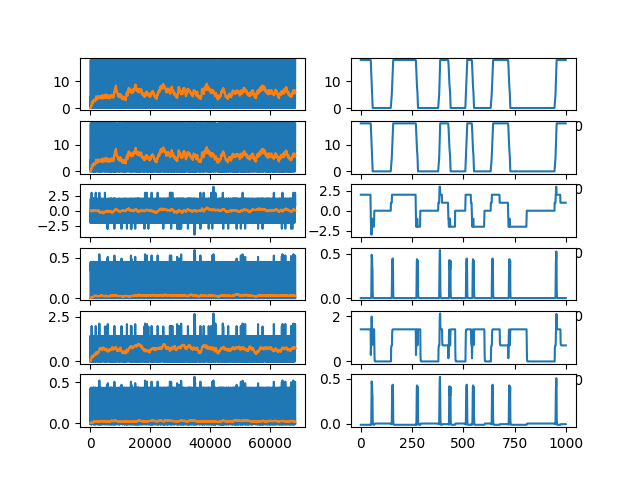

In [6]:
recorder.plotzero = True
recorder.plot()

In [6]:
import pickle
with open('zzz_records','wb') as f:
    pickle.dump([hp,recorder],f)

In [7]:
hp

In [8]:
hp.reward.reward_hp['rms_intensity'].alpha_decay

0.8

In [9]:
# with RL.dqn.sess.as_default():
    RL.dqn.save_nwk_param('zzz_try_to_save_nwk4.pkl')

In [5]:
    step = 0
    superbreak = False
    for episode in range(hp.max_episode):
        observation = local_observer(sensor,agent)
        for step in range(hp.steps_per_episode):
            action = RL.choose_action(observation)
            reward.update_rewards(sensor = sensor, agent = agent)
            agent.act(action)
            sensor.update(scene,agent)
            observation_  = local_observer(sensor,agent) #todo: generalize
            RL.store_transition(observation, action, reward.reward, observation_)
            recorder.record([agent.q_ana[0],agent.q[0],agent.qdot[0],reward.rewards[0],reward.rewards[1],reward.reward])
#             if (step > 100) and (step % hp.steps_between_learnings == 0):
#                 RL.learn()
            observation = observation_
            step += 1
            if step%1000 ==0:
                print(episode,step,'  ', end='')
                ave = [uu[-1] for uu in recorder.running_averages]
                print(ave[3])
                if ave[3]>0.8:
                    superbreak = True
                    break
        if superbreak:
            break

0 1000   0.015000487533682919
0 2000   0.027460714613876336
0 3000   0.022759348044521944
0 4000   0.031166671332188887
0 5000   0.0235823210633139
0 6000   0.025204338966669147
0 7000   0.03134254110935509
0 8000   0.03618881379418414
0 9000   0.029993946498002588
0 10000   0.024617106331704795
1 1000   0.018004728528582117
1 2000   0.02667379347534193
1 3000   0.020424136455085222
1 4000   0.02575569999963326
1 5000   0.02613623338976379
1 6000   0.035222352749002456
1 7000   0.03406019900352696
1 8000   0.02733787204815015
1 9000   0.02829669414143055
1 10000   0.03222763135869064
2 1000   0.03785147737754028
2 2000   0.028087665646158475
2 3000   0.037506466538311634
2 4000   0.034404916419809105
2 5000   0.04119895374064721
2 6000   0.04024760841862637
2 7000   0.03522996796341966
2 8000   0.03240757297569423
2 9000   0.03190374749704667
2 10000   0.034786789943712926
3 1000   0.03628368825758244
3 2000   0.029615778392291497
3 3000   0.03992106177319507
3 4000   0.036928253003979

KeyboardInterrupt: 

In [ ]:
with RL.dqn.sess.as_default():
    RL.dqn.load_nwk_param('zzz_try_to_save_nwk.pkl')

In [ ]:
step

In [ ]:
len(recorder.records[0])

In [ ]:
hp.agent.action_space

In [ ]:
recorder.running_average_alpha

In [ ]:
RL.epsilon = 0.99999999

In [ ]:
observation

In [ ]:
RL.compute_q_eval(observation.reshape([1,-1]))

In [16]:
policy_map = np.array([np.argmax(RL.compute_q_eval(np.eye(10)),axis=1), 
                       np.argmax(RL.compute_q_eval(-np.eye(10)),axis=1)])
print(policy_map)


[[0 0 4 4 4 0 4 0 0 3]
 [1 0 0 3 4 0 0 4 4 3]]


In [ ]:
                RL.learn()


In [12]:
np.round(RL.debu2-RL.debu1,2)

array([[ 0.  ,  0.  ,  0.06,  0.  ,  0.  ],
       [ 0.  ,  0.27,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.14],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.03],
       [ 0.  ,  0.  ,  0.  ,  0.28,  0.  ],
       [ 0.  ,  0.  ,  0.19,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.24,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.19,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.07],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.09],
       [ 0.  ,  0.35,  0.  ,  0.  ,  0.  ],
       [-0.02,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.03,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.05,  0.  ],
       [-0.04,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.29,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.02],
       [ 0.  ,  0.  , -0.07,  0.  ,  0.  ],
       [ 0.65,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.03,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.08,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.04],
       [ 0.  ,  0.  ,  0.  , -0.

In [19]:
np.diag(np.ones([10-1]),k=1)+np.eye(10)

array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [20]:
    debu2el = np.diag(np.ones([10-1]),k=1)+np.eye(10)
    debu2el = debu2el[:-1,:]
    print(debu2el)

[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]
